<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/classificationcapestone/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Vishal Singh Sangral
##### **Team Member 2 -** Samadhan Tangde

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/IAMDSVSSANGRAL/classificationcapestone

# **Problem Statement**


The objective of this project is to develop a machine learning model that can predict whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years. The dataset used for this project contains records of over 4,000 patients from an ongoing cardiovascular study in Framingham, Massachusetts. Each record consists of 15 attributes, including demographic, behavioral, and medical risk factors.

The primary task is binary classification, where the target variable is "TenYearCHD," indicating whether a patient is at risk of CHD (1) or not (0). The features include attributes such as age, sex, education level, smoking status, blood pressure measurements, cholesterol levels, and more. The dataset may also contain missing values that need to be handled appropriately.

By building an accurate predictive model, this project aims to assist healthcare professionals in identifying individuals at higher risk of CHD, allowing for early intervention and tailored healthcare recommendations to reduce the incidence of cardiovascular diseases.

Key objectives for the project include data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluating the model's performance using appropriate metrics. The success of this project will be measured by the model's ability to predict CHD risk with a high degree of accuracy and reliability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [310]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [311]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

#assinging the path
path = "/content/drive/MyDrive/Santa/classification - capestone/data_cardiovascular_risk.csv"

#read data from a CSV file into a DataFrame.
data_raw = pd.read_csv(path)

#create a copy of raw data
df = data_raw.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [312]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [313]:
# Dataset Rows & Columns count
rows, columns = df.shape

# Print the number of rows and columns
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Number of Rows: 3390
Number of Columns: 17


### Dataset Information

In [314]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [315]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Print the count of duplicate values
print("Duplicate Value Count:", duplicate_count)


Duplicate Value Count: 0


#### Missing Values/Null Values

In [316]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)


Missing Values Count:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [317]:
#installing missingno
!pip install missingno

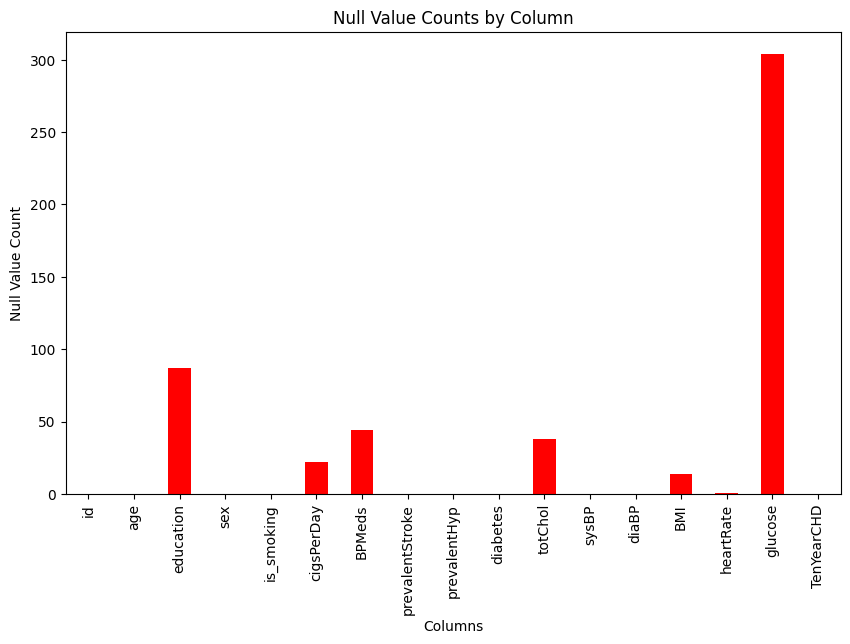

In [318]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
missing_values_count.plot(kind='bar', color='red')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

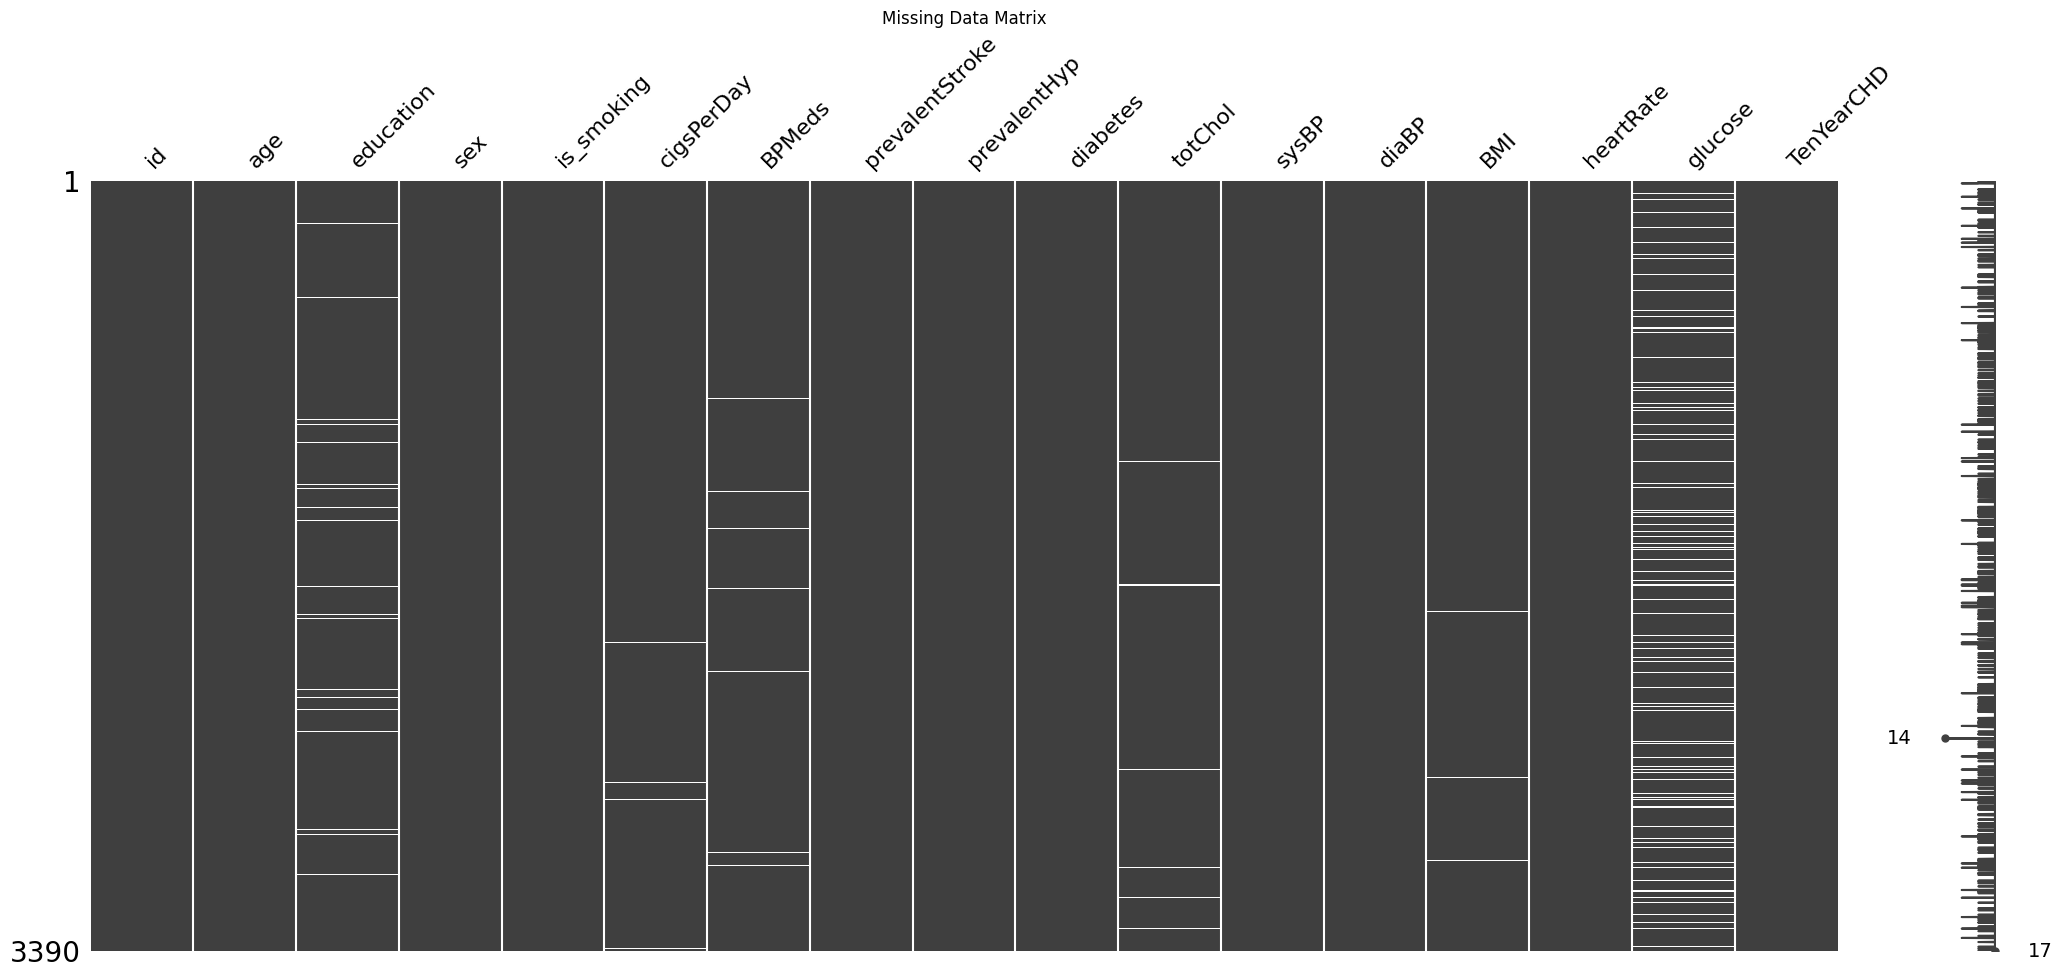

In [319]:
# Visualizing the missing values
# Create a missing data matrix visualization
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

### What did you know about your dataset?

There are several insights that can be gathered from the information provided about your dataset:

1. **Number of Entries:**
   - The dataset contains 3,390 entries.

2. **Columns and Data Types:**
   - There are 17 columns in the dataset.
   - The data types include integers (`int64`), floats (`float64`), and objects (`object`).

3. **Missing Values:**
   - Some columns have missing values (non-null counts are less than the total number of entries).
   - Columns with missing values include 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.

4. **Categorical Columns:**
   - 'sex' and 'is_smoking' are categorical columns represented as objects. You may want to check the unique values in these columns and potentially convert them to numerical values if needed.

5. **Numerical Columns:**
   - Columns such as 'age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' are numerical.

6. **Target Variable:**
   - 'TenYearCHD' is the target variable for binary classification, indicating whether a patient is at risk of CHD in the next 10 years.

7. **Summary Statistics:**
   - Descriptive statistics such as mean, standard deviation, minimum, and maximum are not provided, but calculating these would be useful for understanding the distribution of numerical features.

8. **Potential Preprocessing Steps:**
   - Imputation: Consider imputing missing values for columns like 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.
   - Categorical Encoding: Convert categorical columns ('sex' and 'is_smoking') into numerical format, possibly using one-hot encoding or label encoding.
   - Feature Scaling: Depending on the algorithms you plan to use, consider scaling numerical features.

These initial insights provide a foundation for further exploration and preprocessing of the dataset. You can visualize the distribution of numerical features, explore relationships between variables, and handle missing values before building and training your machine learning model.

## ***2. Understanding Your Variables***

In [320]:
# Assuming data_raw is your DataFrame
columns_list = df.columns

# Print the list of columns
print("Dataset Columns:")
print(columns_list)

Dataset Columns:
Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [321]:
# Dataset Describe
df.describe(include="all").T

count unique  top  freq        mean         std    min  \
id               3390.0    NaN  NaN   NaN      1694.5  978.753033    0.0   
age              3390.0    NaN  NaN   NaN   49.542183    8.592878   32.0   
education        3303.0    NaN  NaN   NaN    1.970936    1.019081    1.0   
sex                3390      2    F  1923         NaN         NaN    NaN   
is_smoking         3390      2   NO  1703         NaN         NaN    NaN   
cigsPerDay       3368.0    NaN  NaN   NaN    9.069477   11.879078    0.0   
BPMeds           3346.0    NaN  NaN   NaN    0.029886    0.170299    0.0   
prevalentStroke  3390.0    NaN  NaN   NaN     0.00649    0.080309    0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.315339    0.464719    0.0   
diabetes         3390.0    NaN  NaN   NaN    0.025664    0.158153    0.0   
totChol          3352.0    NaN  NaN   NaN  237.074284    45.24743  107.0   
sysBP            3390.0    NaN  NaN   NaN   132.60118    22.29203   83.5   
diaBP            3390.0    NaN  NaN   NaN   82.883038   12.023581   48.0   
BMI              3376.0    NaN  NaN   NaN   25.794964    4.115449  15.96   
heartRate        3389.0    NaN  NaN   NaN   75.977279   11.971868   45.0   
glucose          3086.0    NaN  NaN   NaN    82.08652   24.244753   40.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.150737    0.357846    0.0   

                    25%     50%      75%     max  
id               847.25  1694.5  2541.75  3389.0  
age                42.0    49.0     56.0    70.0  
education           1.0     2.0      3.0     4.0  
sex                 NaN     NaN      NaN     NaN  
is_smoking          NaN     NaN      NaN     NaN  
cigsPerDay          0.0     0.0     20.0    70.0  
BPMeds              0.0     0.0      0.0     1.0  
prevalentStroke     0.0     0.0      0.0     1.0  
prevalentHyp        0.0     0.0      1.0     1.0  
diabetes            0.0     0.0      0.0     1.0  
totChol           206.0   234.0    264.0   696.0  
sysBP             117.0   128.5    144.0   295.0  
diaBP              74.5    82.0     90.0   142.5  
BMI               23.02   25.38    28.04    56.8  
heartRate          68.0    75.0     83.0   143.0  
glucose            71.0    78.0     87.0   394.0  
TenYearCHD          0.0     0.0      0.0     1.0

### Variables Description

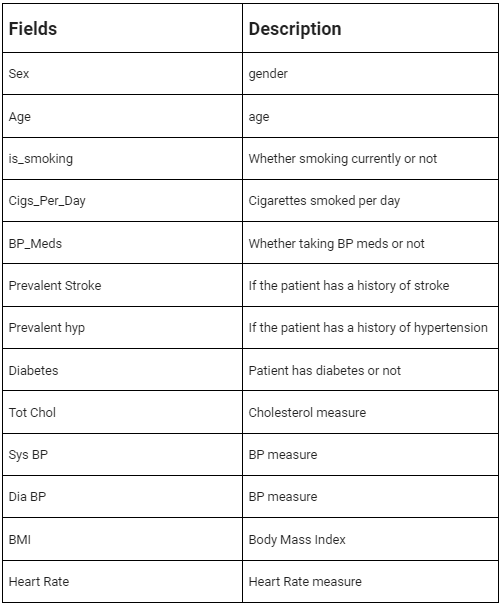

### Check Unique Values for each variable.

In [322]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}":')
    print(unique_values)
    print('\n')

Unique values in column "id":
[   0    1    2 ... 3387 3388 3389]


Unique values in column "age":
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Unique values in column "education":
[ 2.  4.  1.  3. nan]


Unique values in column "sex":
['F' 'M']


Unique values in column "is_smoking":
['YES' 'NO']


Unique values in column "cigsPerDay":
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Unique values in column "BPMeds":
[ 0. nan  1.]


Unique values in column "prevalentStroke":
[0 1]


Unique values in column "prevalentHyp":
[0 1]


Unique values in column "diabetes":
[0 1]


Unique values in column "totChol":
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [323]:
# Defining 3 lists containing the column names which will be helpful for further manipulation.
# This is defined based on the number of unique values for each attribute
dependent_var = ['TenYearCHD']

categorical_var = [i for i in df.columns if df[i].nunique()<=4]
print(f'categorical_var: {categorical_var}')
print('\n')

continuous_var = [i for i in df.columns if i not in categorical_var]
print(f'continuous_var: {continuous_var}')

categorical_var: ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


continuous_var: ['id', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [324]:
# Assuming data_raw is your DataFrame
columns_to_drop = ['id']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### What all manipulations have you done and insights you found?

Right now i just drop the ID column as it is not relevant in predicting the 'TenyearCHD'

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

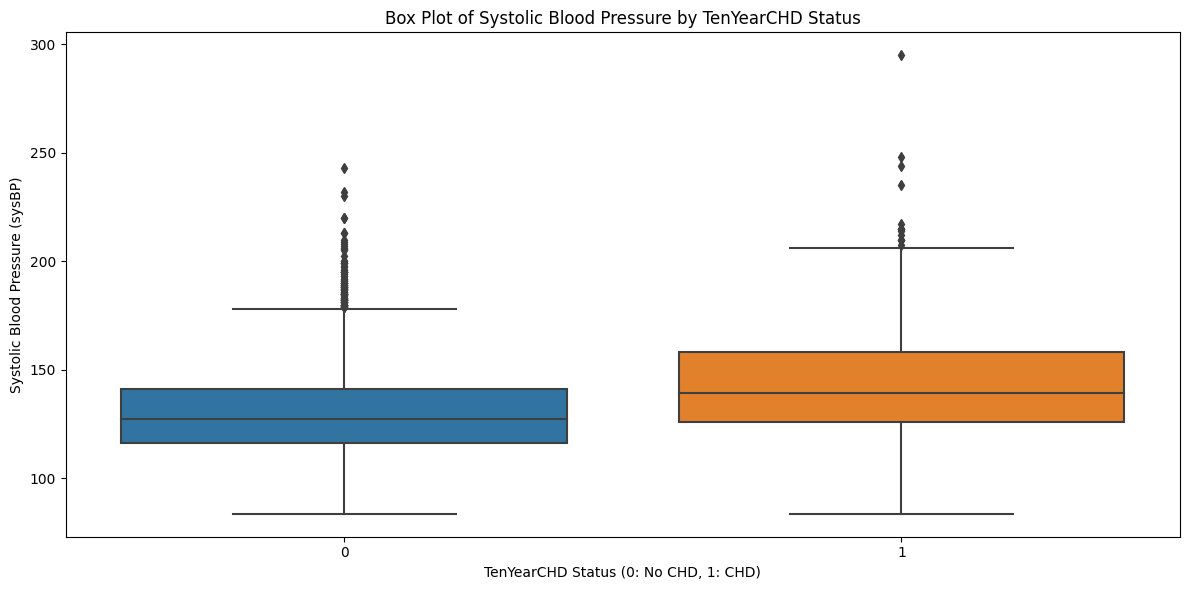

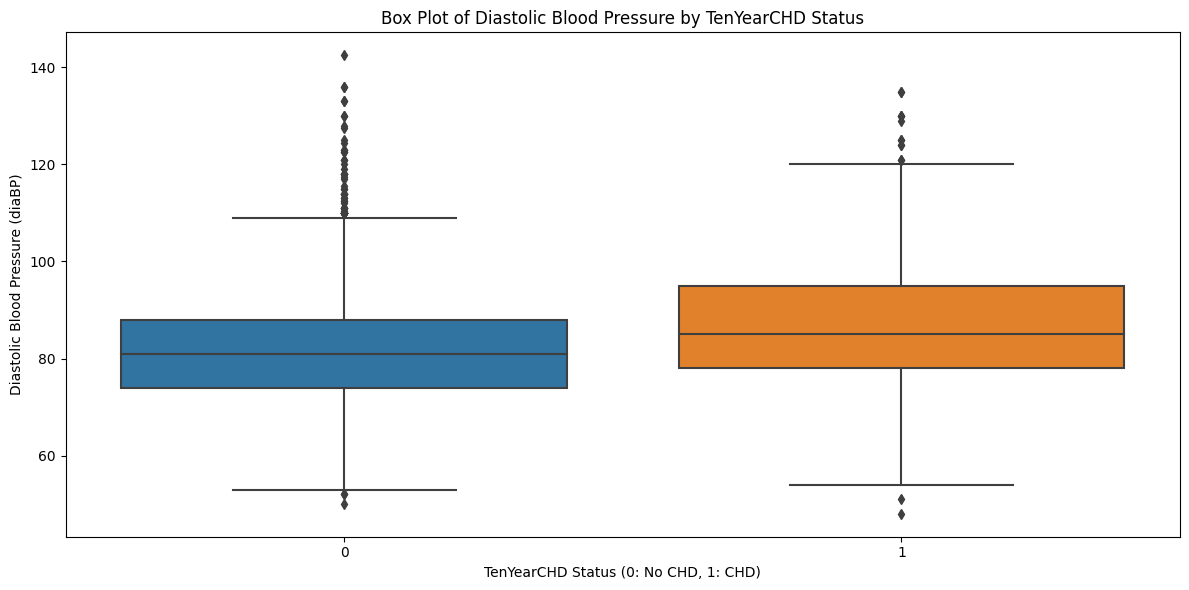

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Systolic Blood Pressure (sysBP)
plt.figure(figsize=(12, 6))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df)
plt.title('Box Plot of Systolic Blood Pressure by TenYearCHD Status')
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)')
plt.ylabel('Systolic Blood Pressure (sysBP)')
plt.tight_layout()
plt.show()

# Box plot for Diastolic Blood Pressure (diaBP)
plt.figure(figsize=(12, 6))
sns.boxplot(x='TenYearCHD', y='diaBP', data=df)
plt.title('Box Plot of Diastolic Blood Pressure by TenYearCHD Status')
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)')
plt.ylabel('Diastolic Blood Pressure (diaBP)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

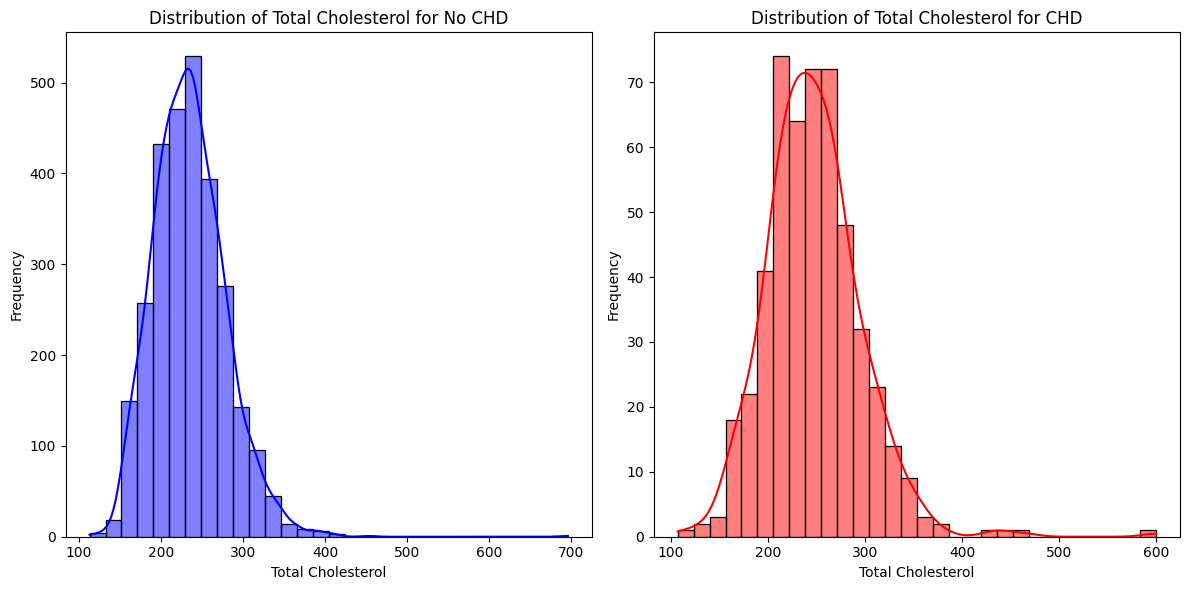

In [326]:
# Chart - 2 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['totChol'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Cholesterol for No CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['totChol'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Cholesterol for CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

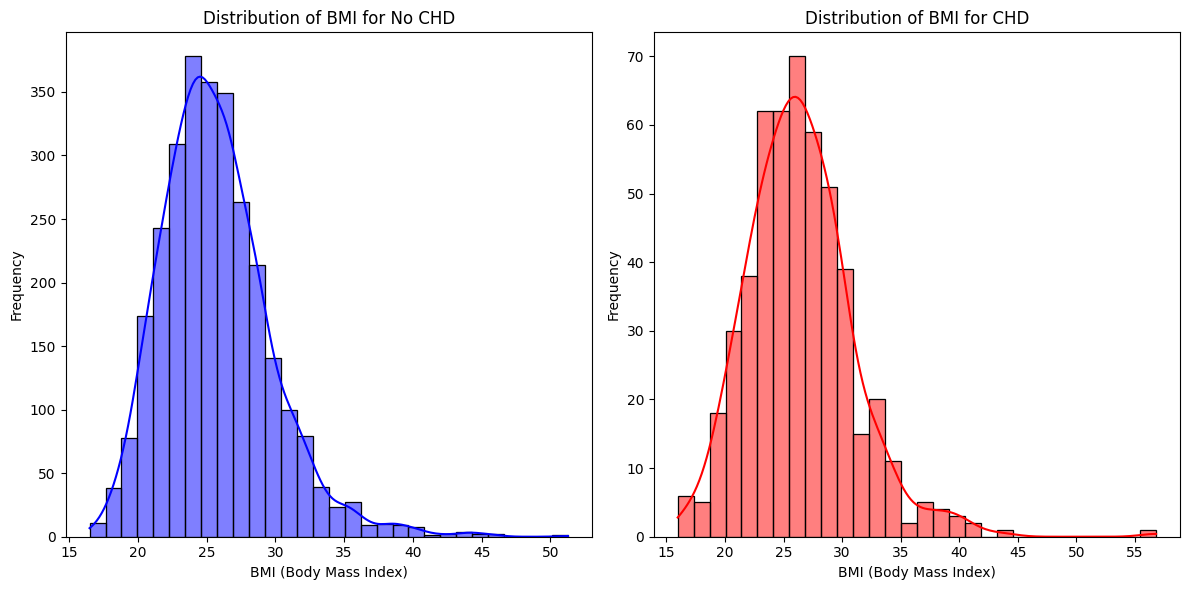

In [327]:
# Chart - 3 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['BMI'], bins=30, kde=True, color='blue')
plt.title('Distribution of BMI for No CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['BMI'], bins=30, kde=True, color='red')
plt.title('Distribution of BMI for CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

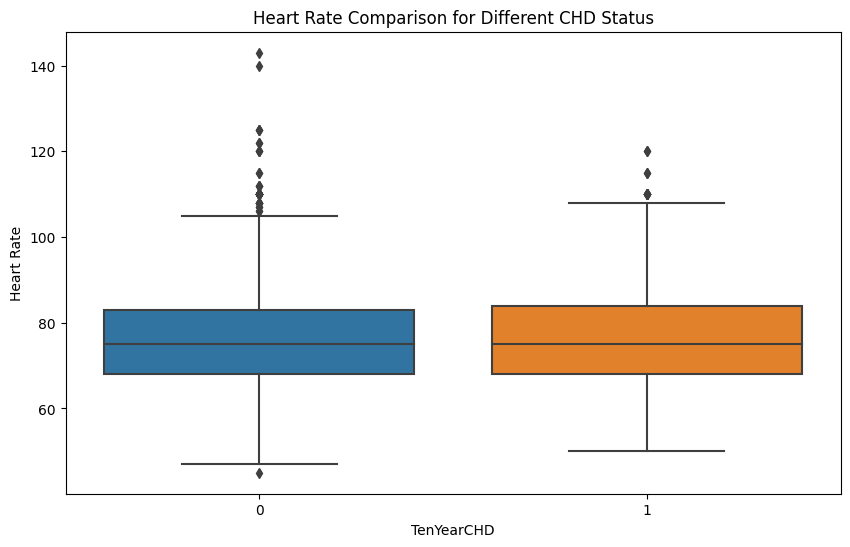

In [328]:
# Chart - 4 visualization code
# Set up the figure with subplots
plt.figure(figsize=(10, 6))

# Box plot for heart rates based on CHD status
sns.boxplot(x='TenYearCHD', y='heartRate', data=df)
plt.title('Heart Rate Comparison for Different CHD Status')
plt.xlabel('TenYearCHD')
plt.ylabel('Heart Rate')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

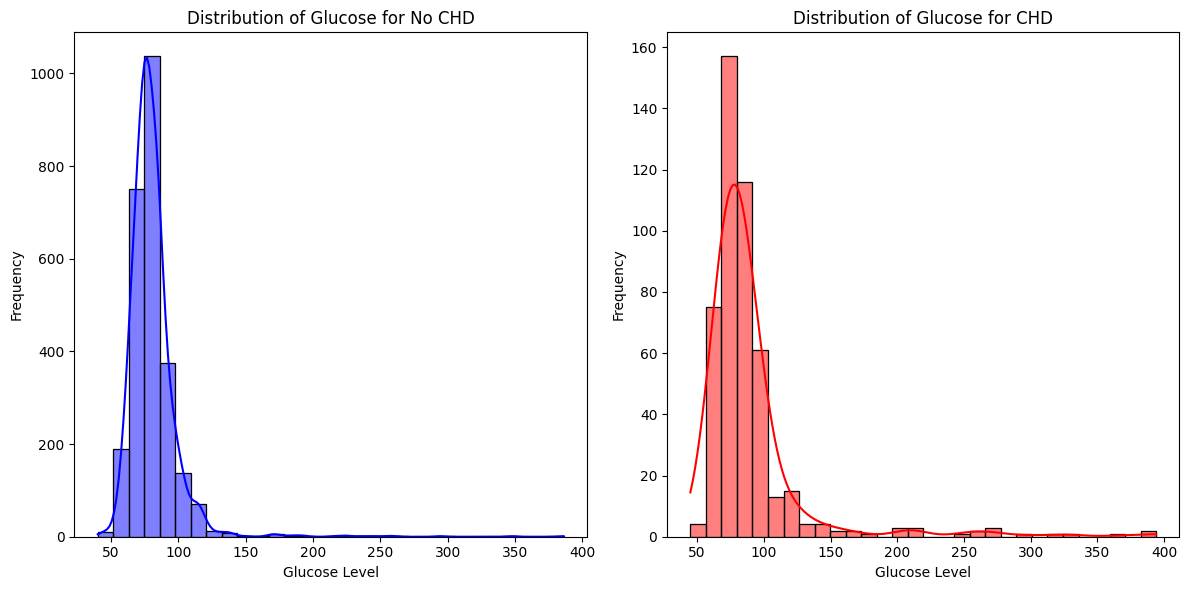

In [329]:
# Chart - 5 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['glucose'], bins=30, kde=True, color='blue')
plt.title('Distribution of Glucose for No CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['glucose'], bins=30, kde=True, color='red')
plt.title('Distribution of Glucose for CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

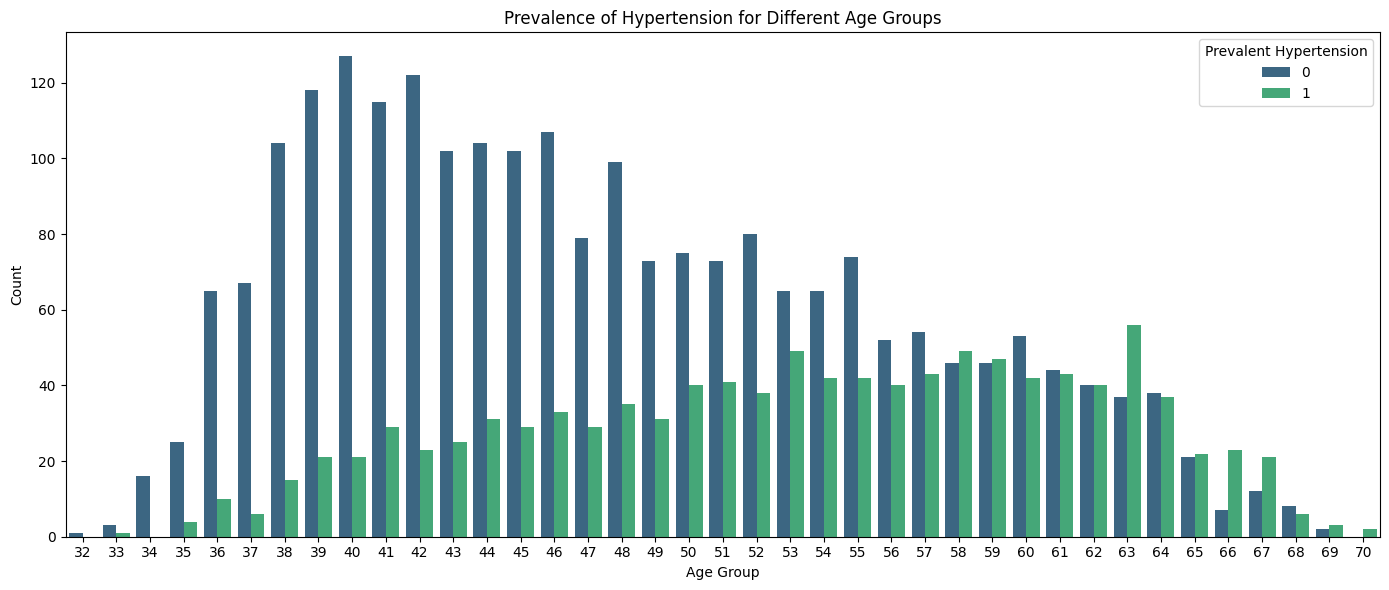

In [330]:
# Chart - 6 visualization code

# Set up the figure with subplots
plt.figure(figsize=(14, 6))

# Plot the prevalence of hypertension for different age groups
sns.countplot(x='age', hue='prevalentHyp', data=df, palette='viridis')
plt.title('Prevalence of Hypertension for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Prevalent Hypertension')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

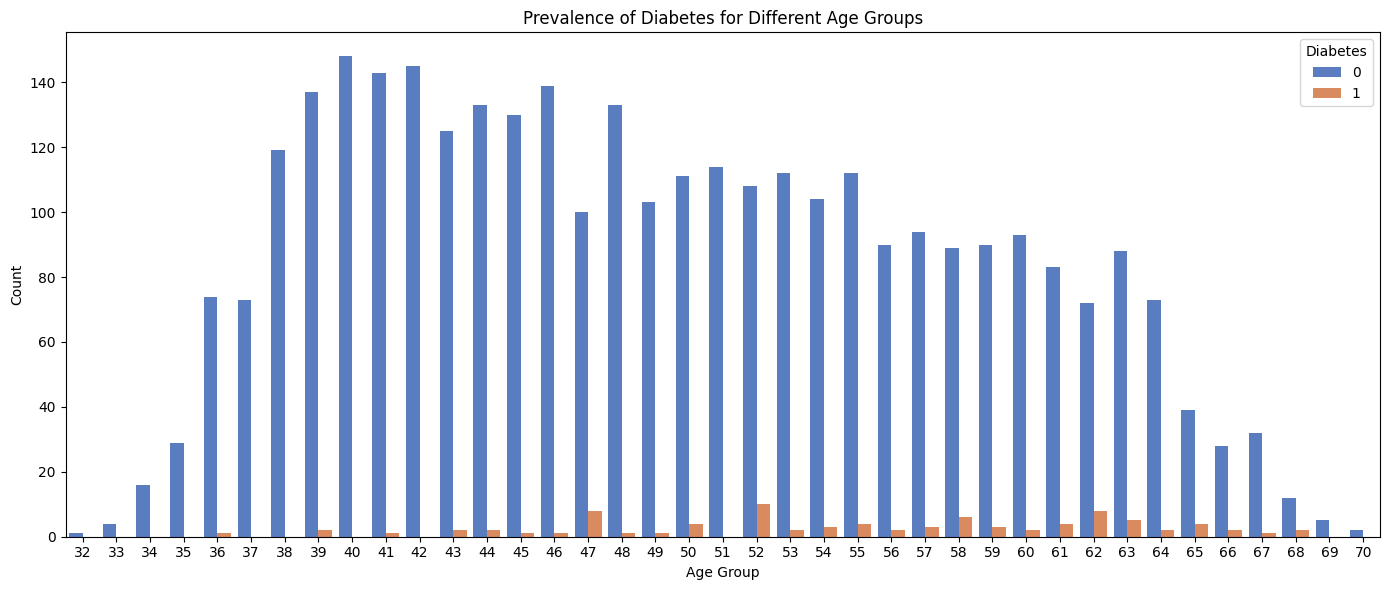

In [331]:
# Chart - 7 visualization code
# Set up the figure with subplots
plt.figure(figsize=(14, 6))
# Plot the prevalence of diabetes for different age groups
sns.countplot(x='age', hue='diabetes', data=df, palette='muted')
plt.title('Prevalence of Diabetes for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

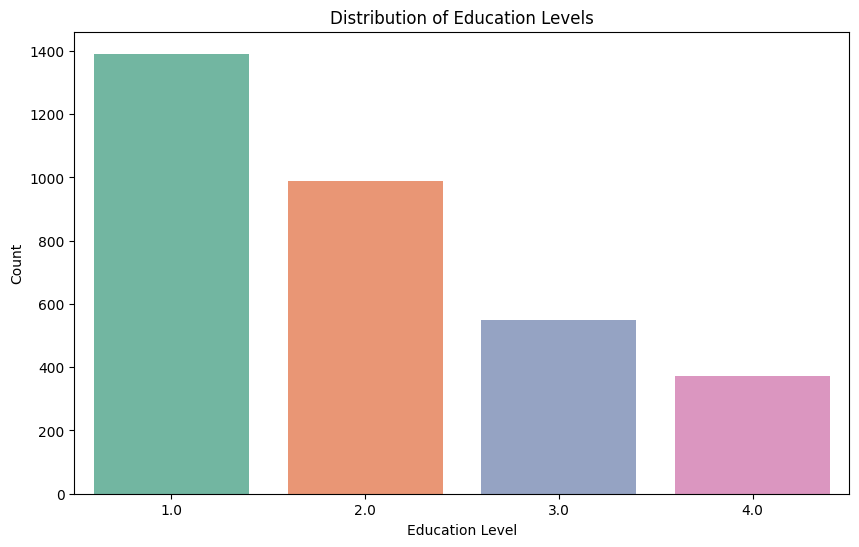

In [332]:
# Chart - 8 visualization code
# Plot the distribution of education levels
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, palette='Set2')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [335]:
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [337]:
# # Chart - 9 visualization code
# # Relationship between the dependent variable and continuous independent variables with the help of catplot named violinplot
# for i in continuous_var:
#     sns.violinplot(data=df, x="TenYearCHD", y=i, hue="sex", split=True, inner="quart")
#     plt.title(f'Relationship between TenYearCHD and {i}')
#     plt.tight_layout()
#     plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

NameError: ignored

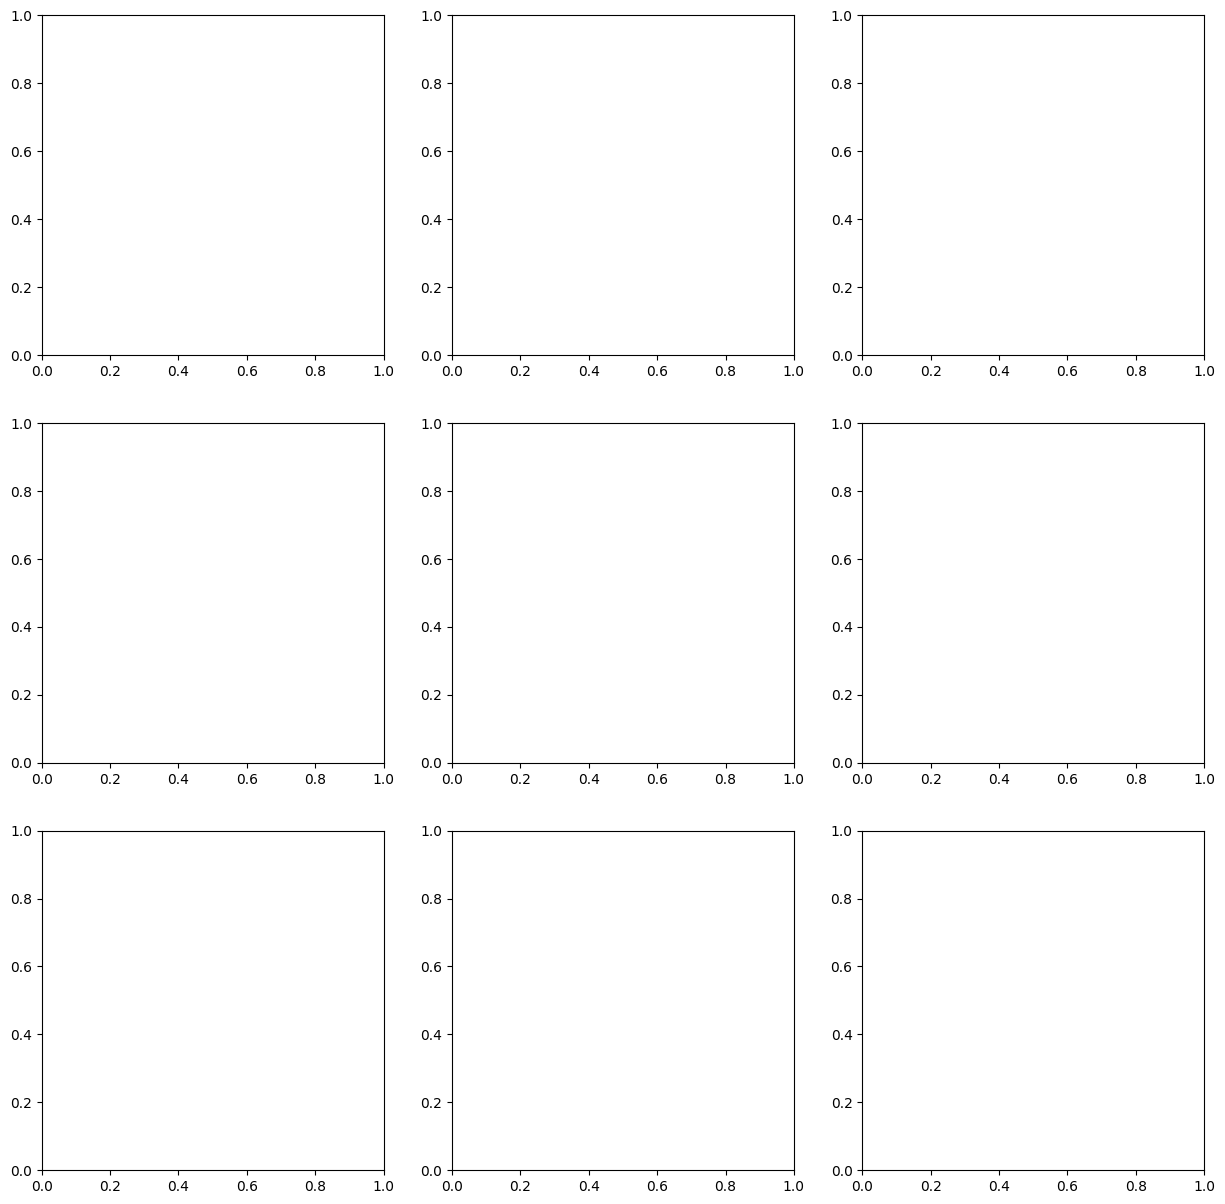

In [338]:
# # Chart - 10 visualization code
# # 100% stacked bar chart

# # Calculate the number of rows needed based on the number of categorical variables
# num_rows = (len(categorical_var) - 1) // 3 + 1

# # Create subplots with 3 columns
# fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Iterate over categorical variables
# for i, ax in zip(categorical_var[:-1], axes):
#     x_var, y_var = i, dependent_var[0]

#     # Calculate percentage and create 100% stacked bar chart
#     df_grouped = clas.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var) * 100
#     df_grouped.plot.barh(stacked=True, ax=ax)

#     ax.legend(
#         bbox_to_anchor=(1.05, 1),
#         loc="upper left",
#         title=y_var
#     )

#     ax.set_title("% of patients at the risk of CHD by: " + i)

#     for ix, row in df_grouped.reset_index(drop=True).iterrows():
#         cumulative = 0
#         for element in row:
#             if element > 0.1:
#                 ax.text(
#                     cumulative + element / 2,
#                     ix,
#                     f"{int(element)} %",
#                     va="center",
#                     ha="center",
#                 )
#             cumulative += element
# # Hide any empty subplots
# for j in range(len(categorical_var), len(axes)):
#     axes[j].axis('off')

# # Adjust layout to prevent overlap and show plot
# plt.tight_layout()
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# # Chart - 11 visualization code
# # Analysing the distribution of categorical variables in the dataset
# import math

# # Calculate the number of rows needed based on the number of categorical variables
# num_vars = len(categorical_var)
# num_cols = 3
# num_rows = math.ceil(num_vars / num_cols)

# # Create subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows))

# # Flatten the axes for easier iteration
# axes = axes.flatten()

# # Iterate through categorical variables
# for i, cat_var in enumerate(categorical_var):
#     plt.sca(axes[i])
#     p = sns.countplot(x=cat_var, data=clas)
#     plt.xlabel(cat_var)
#     plt.title(cat_var + ' distribution')

#     # Annotate each bar with the count
#     for bar in p.patches:
#         plt.annotate(f'{bar.get_height()}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
#                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# # Hide any empty subplots
# for j in range(len(categorical_var), len(axes)):
#     axes[j].axis('off')

# # Adjust layout for better visualization
# plt.tight_layout()
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

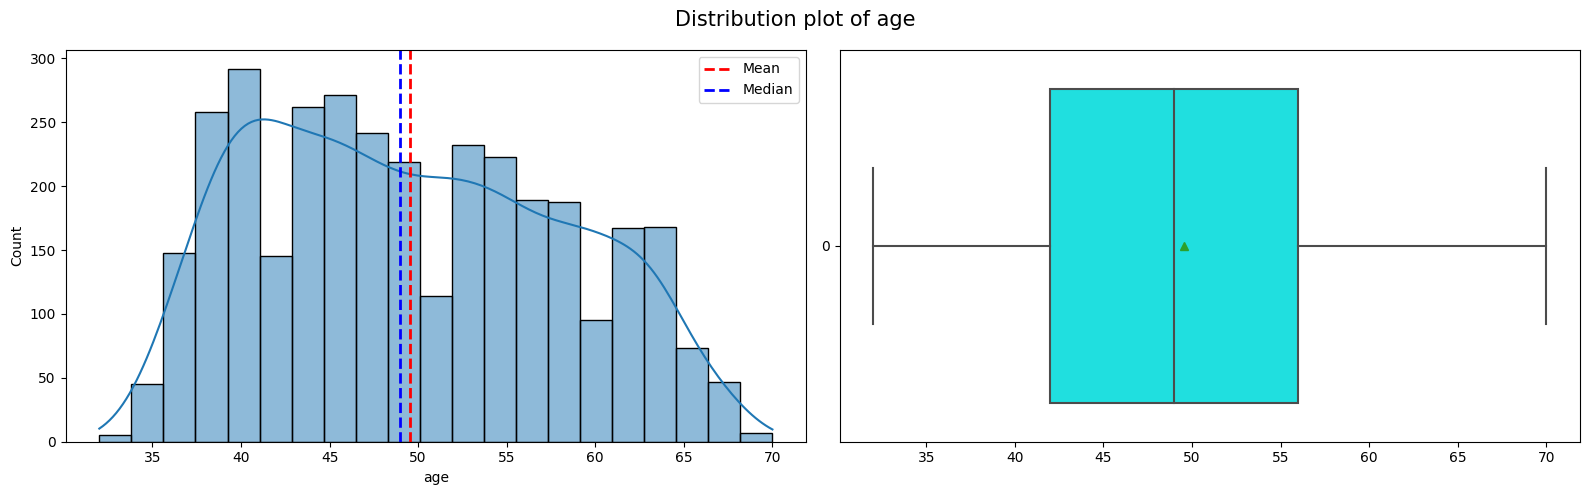

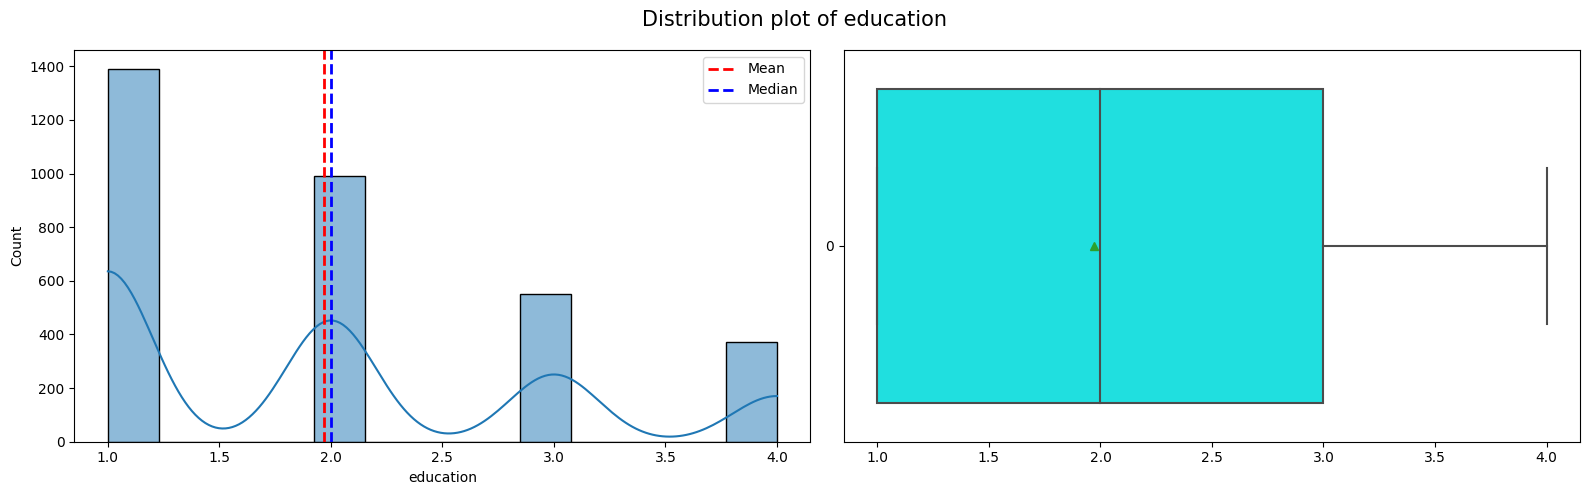

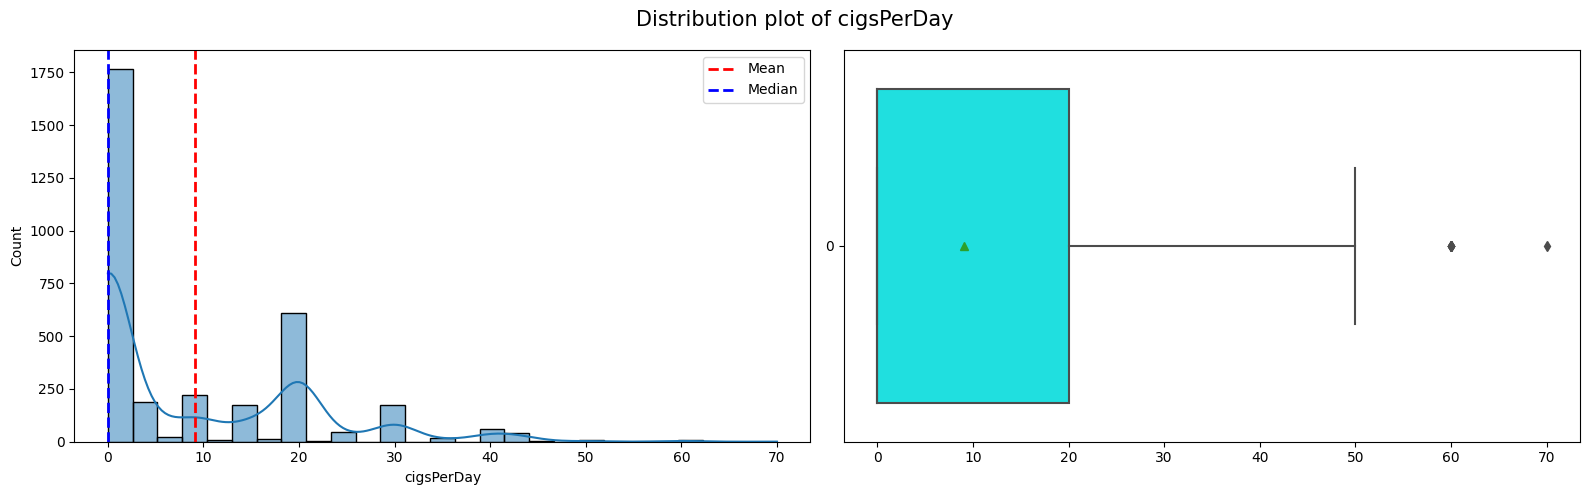

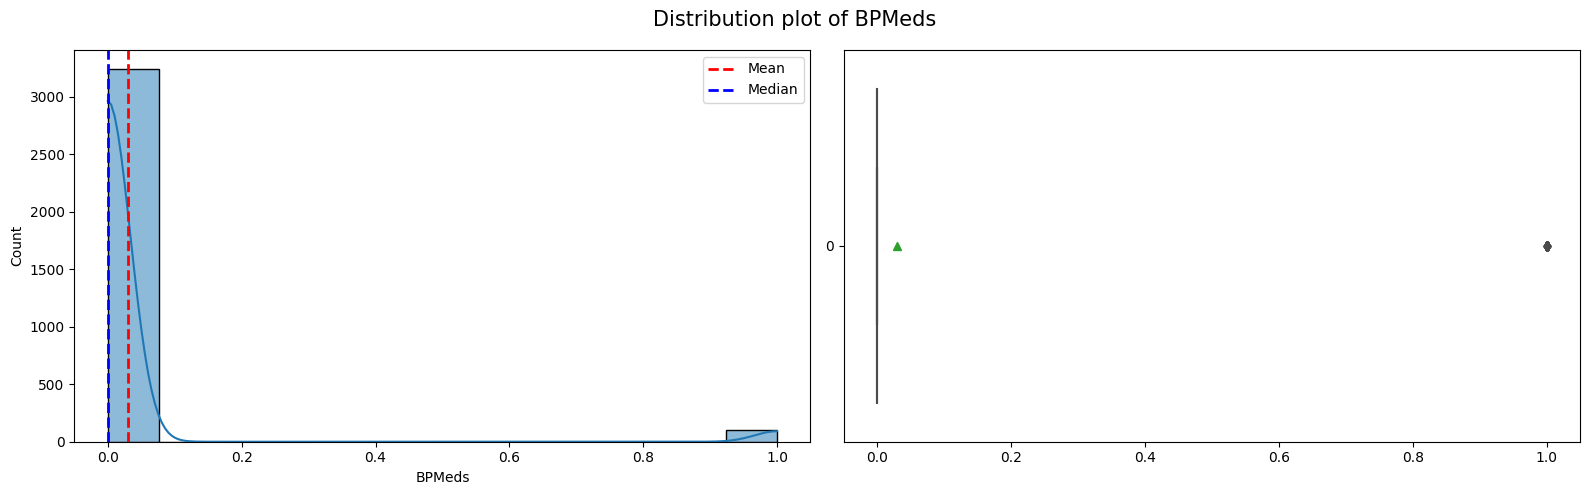

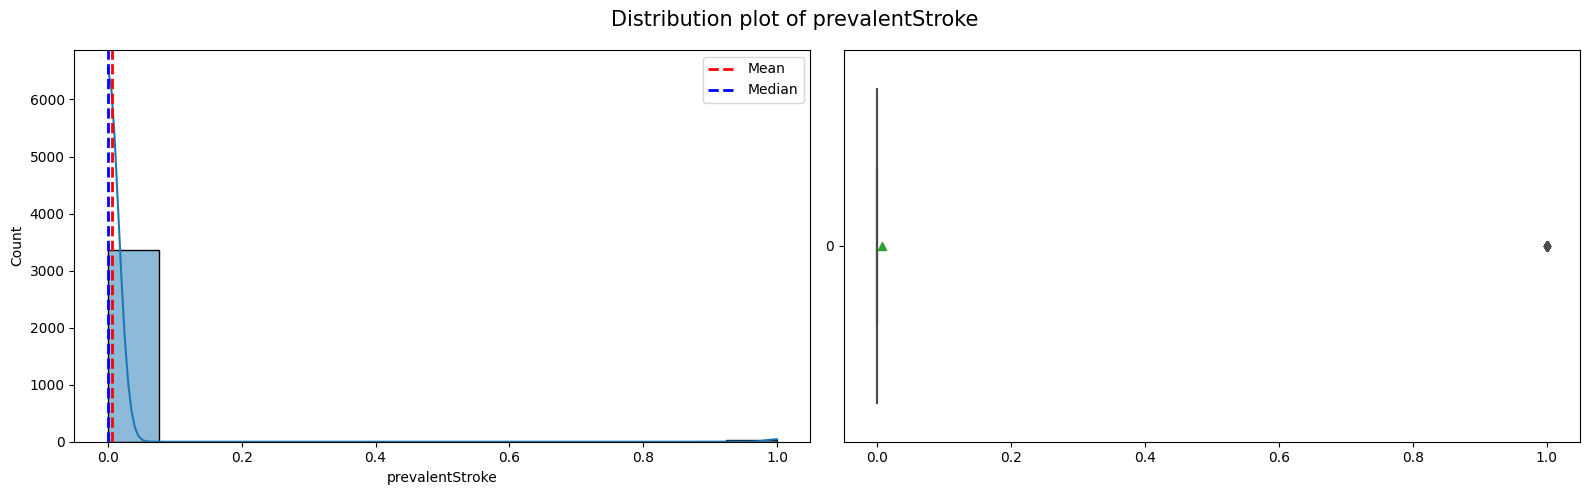

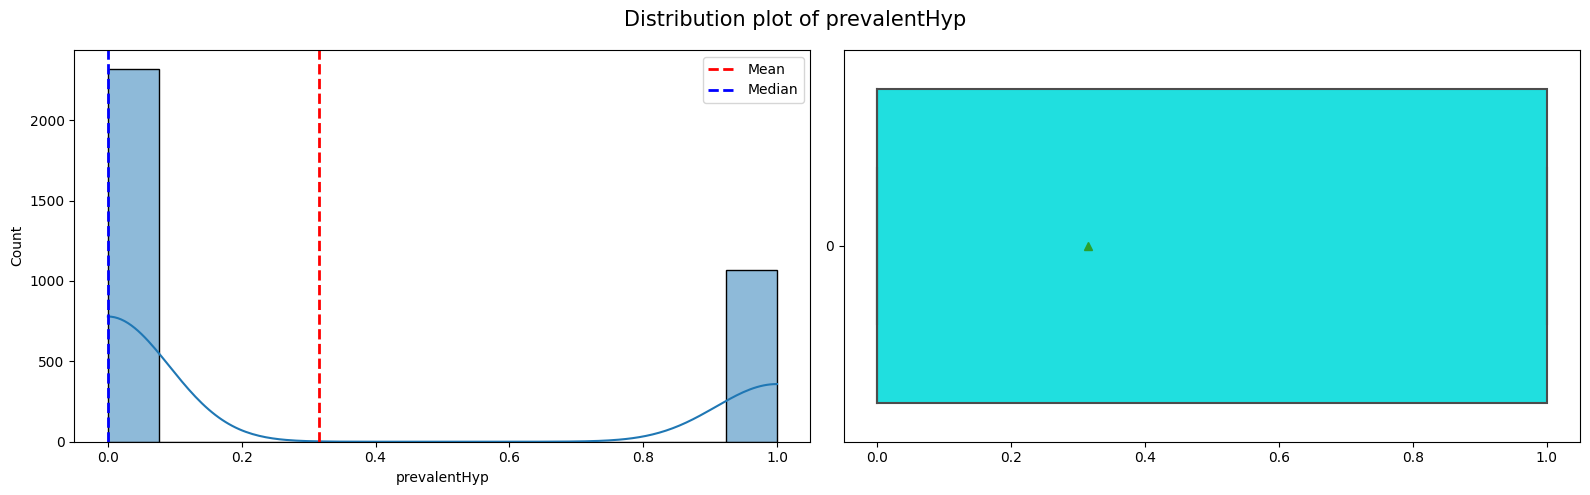

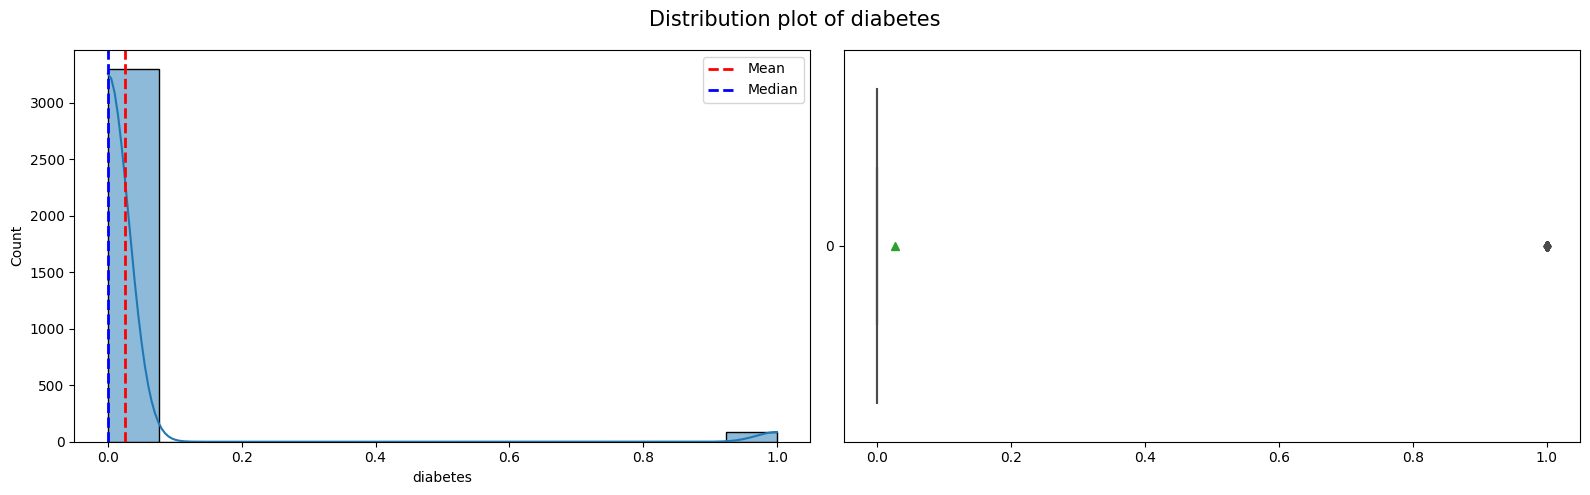

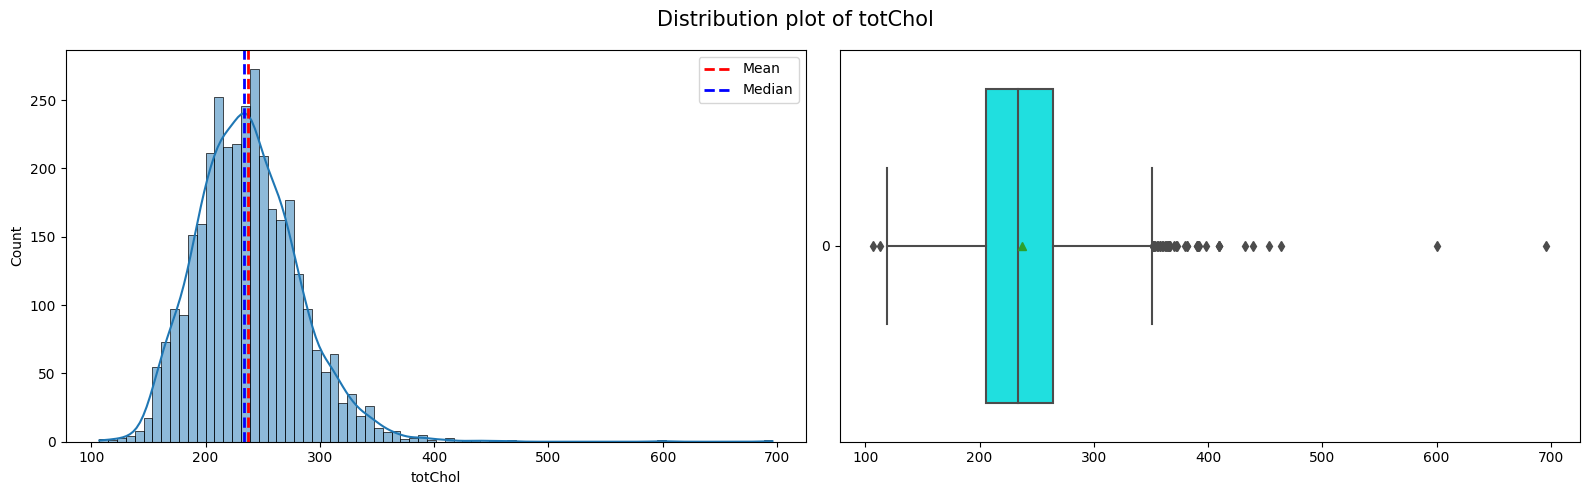

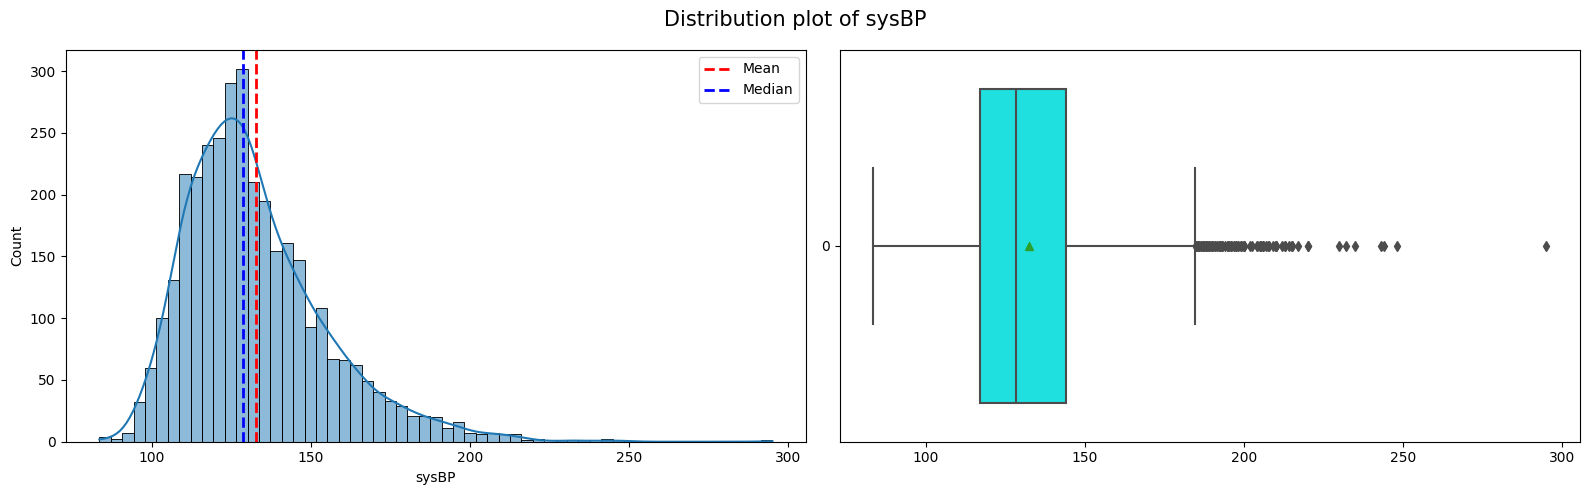

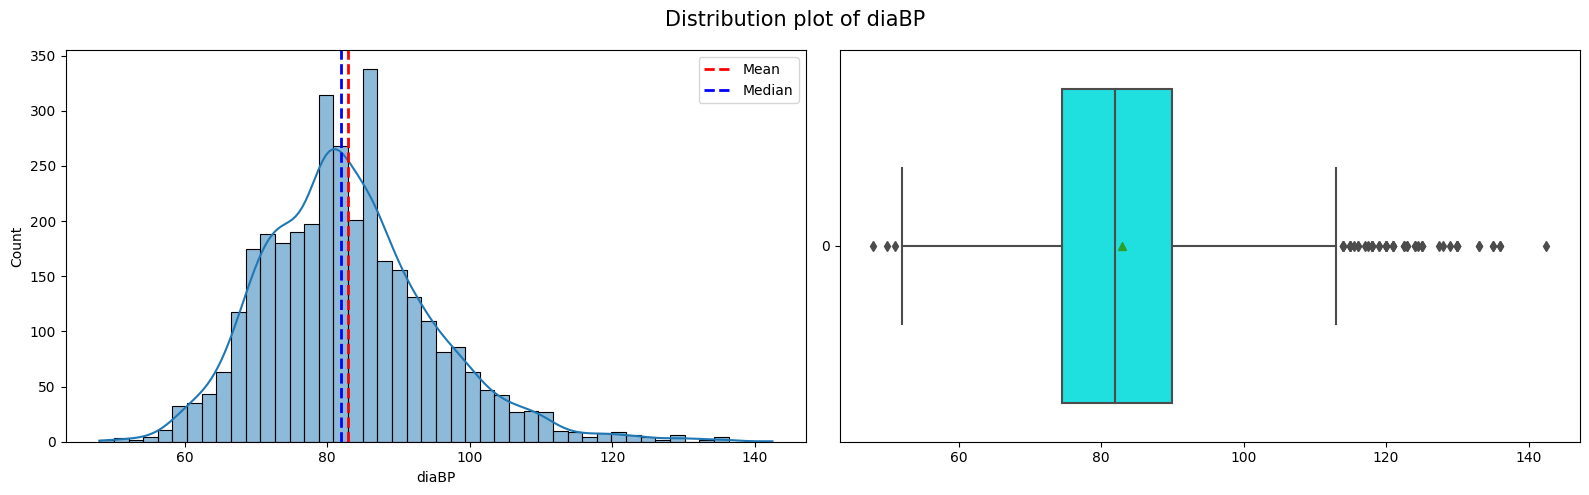

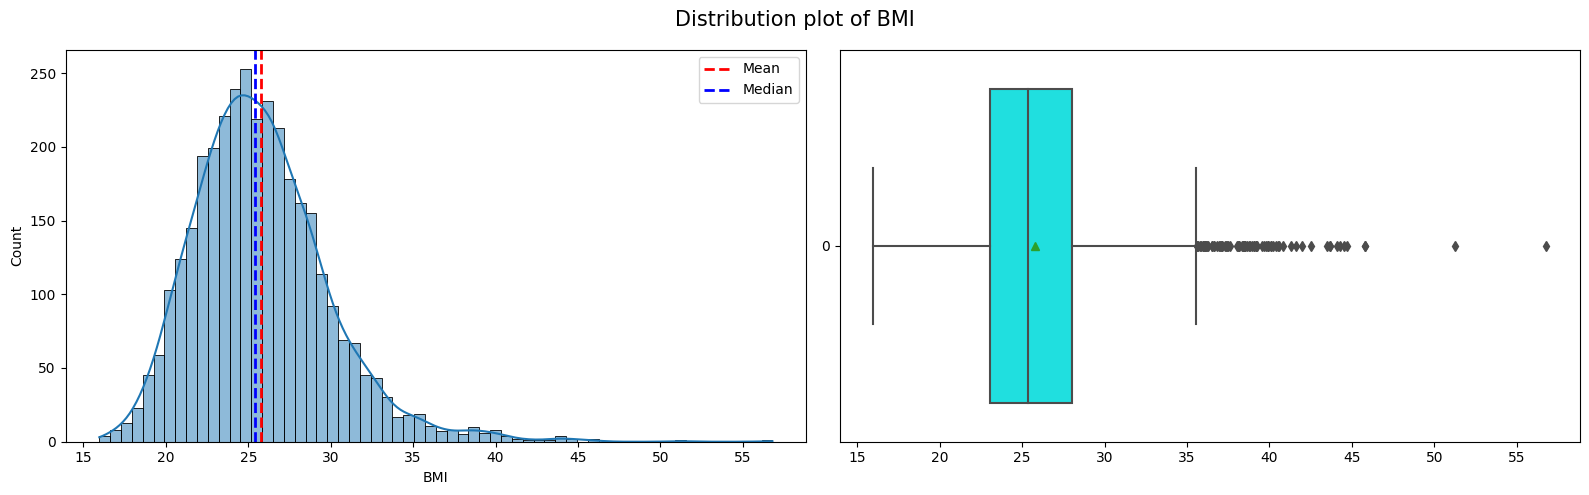

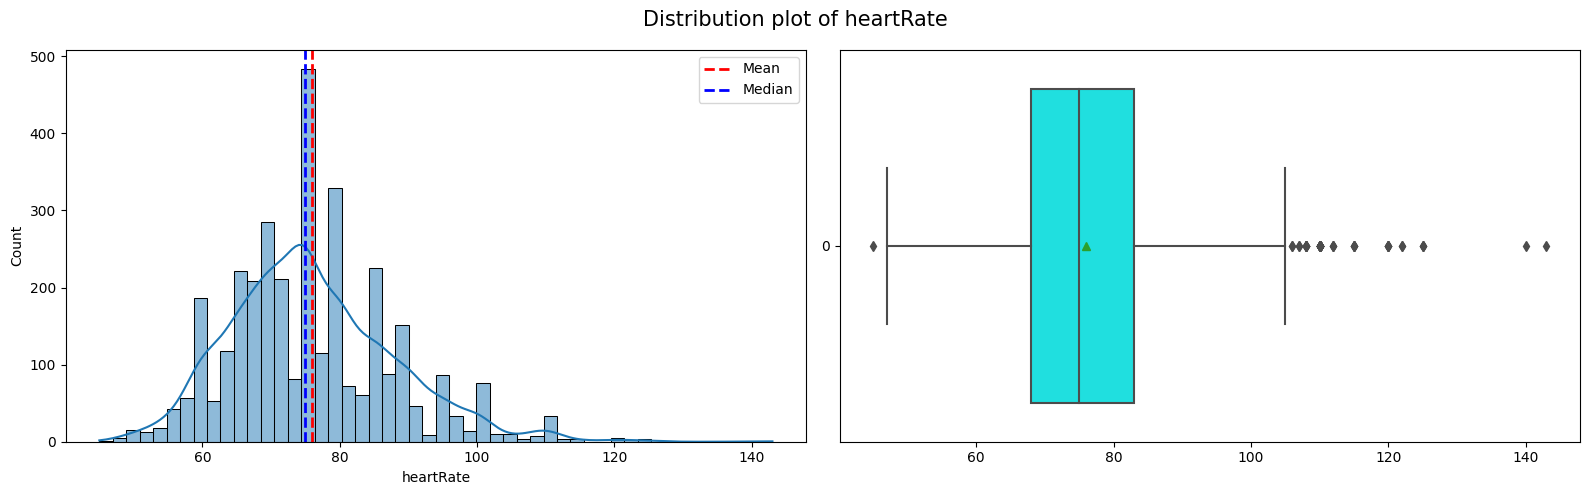

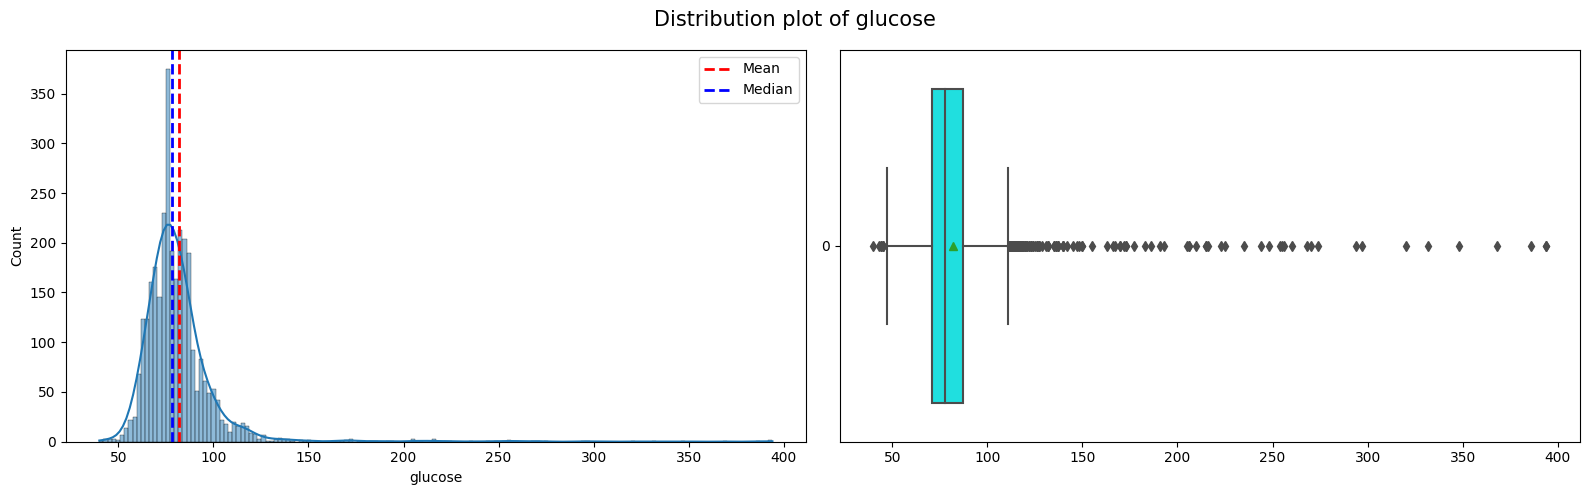

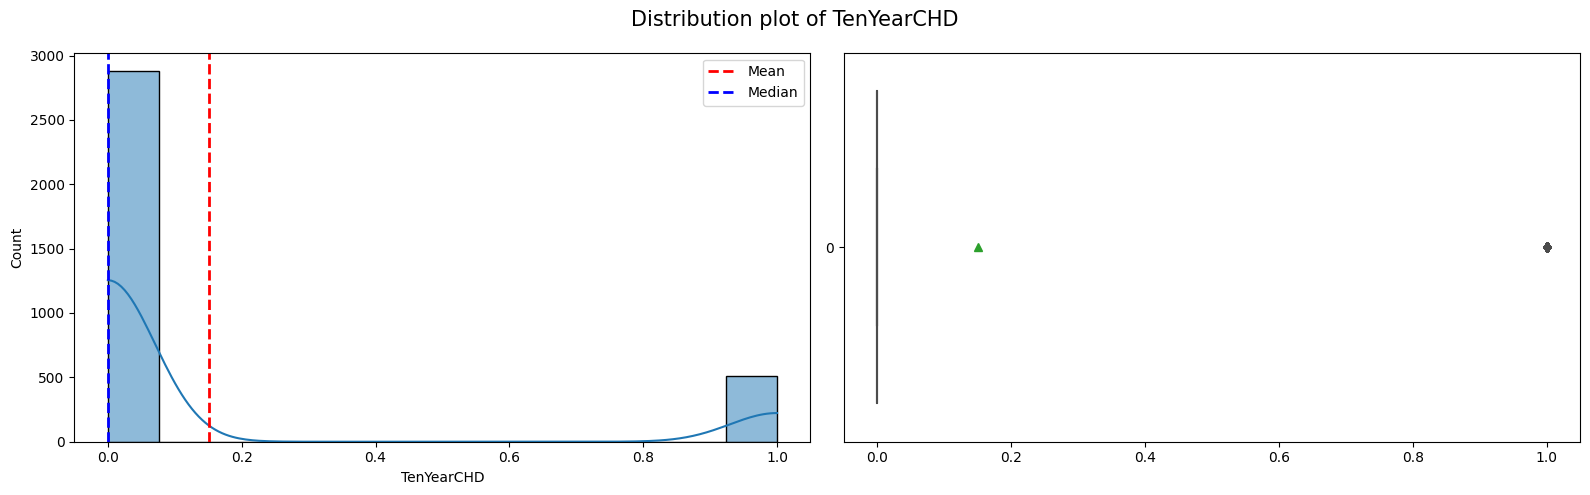

In [339]:
# Chart - 12 visualization code
# Visualizing code of histogram plot & boxplot for each column to know the data distribution
for col in df.describe().columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    # Histogram with mean and median lines
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[0].axvline(df[col].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    axes[0].legend()

    # Boxplot with mean line
    sns.boxplot(df[col], ax=axes[1], orient='h', showmeans=True, color='cyan')

    fig.suptitle("Distribution plot of " + col, fontsize=15)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Distribution Plot

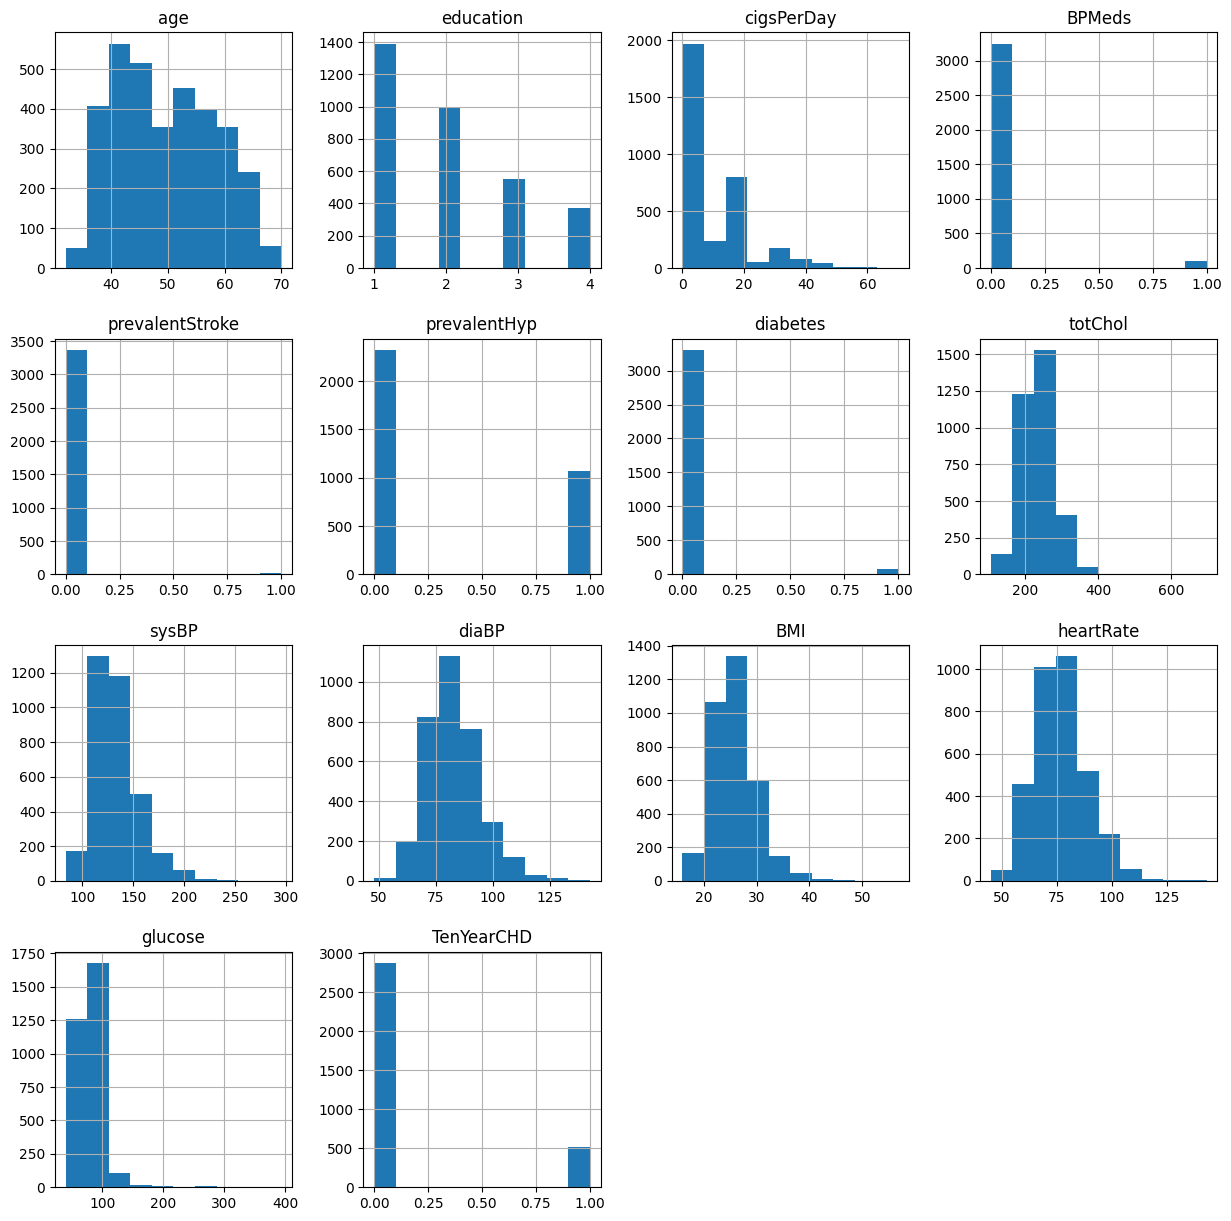

In [340]:
# Visualizing distributions using Histograms:
df.hist(figsize=(15, 15), grid=True);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

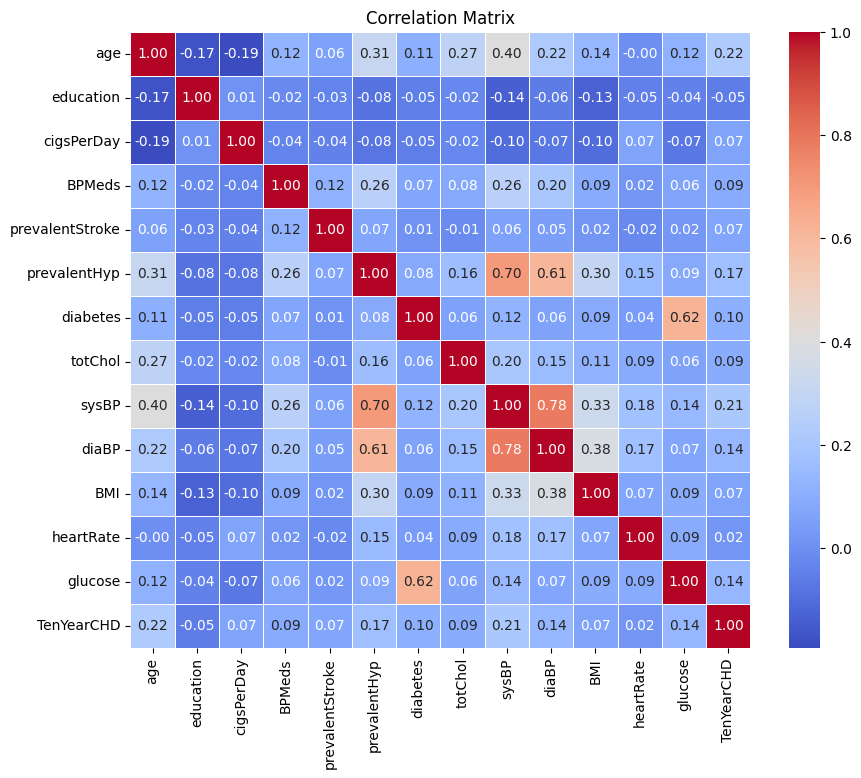

In [341]:
# Correlation Heatmap visualization code

# Calculate the correlation matrix
correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

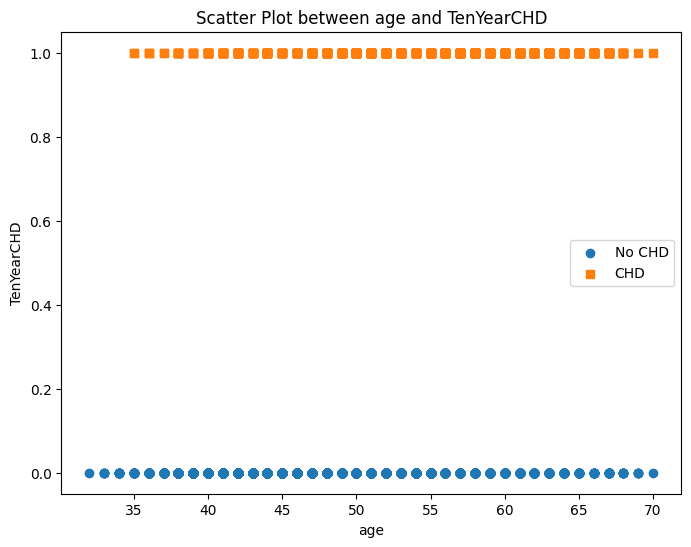

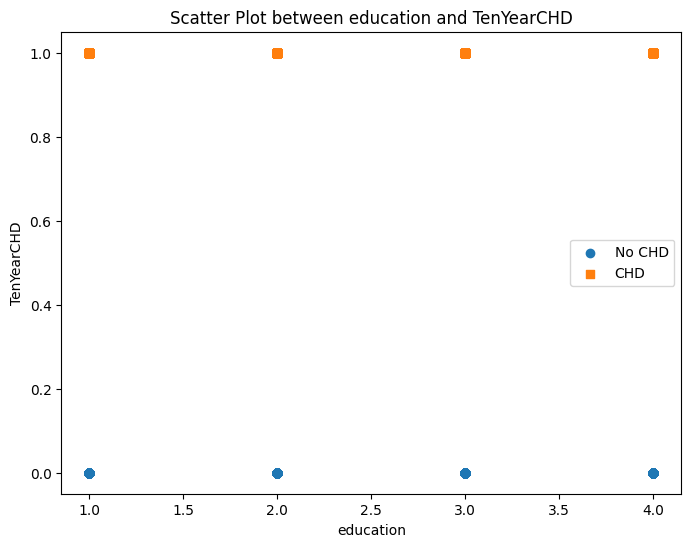

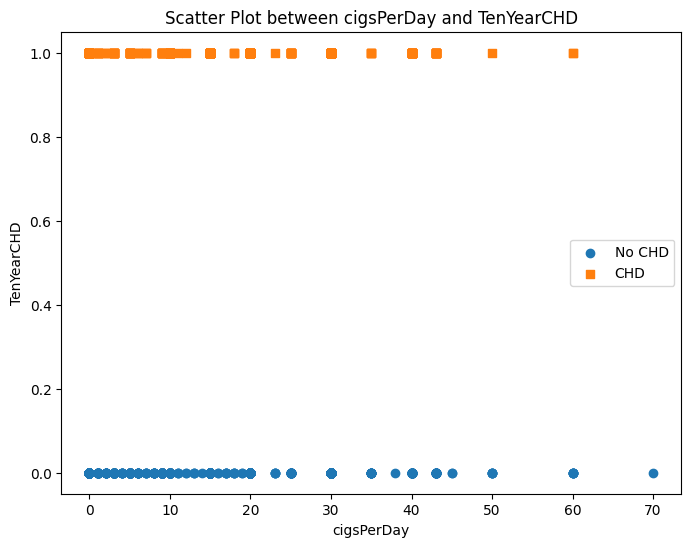

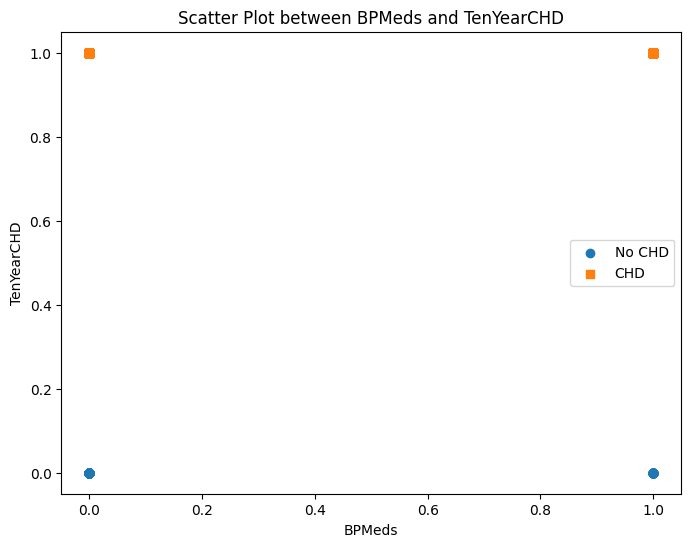

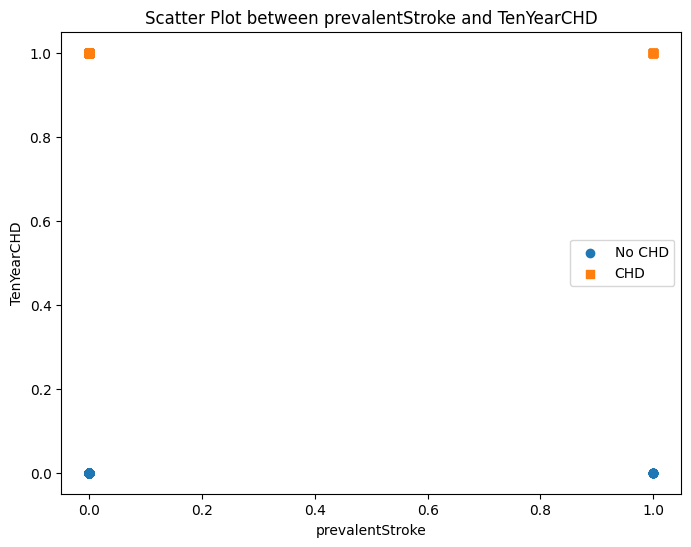

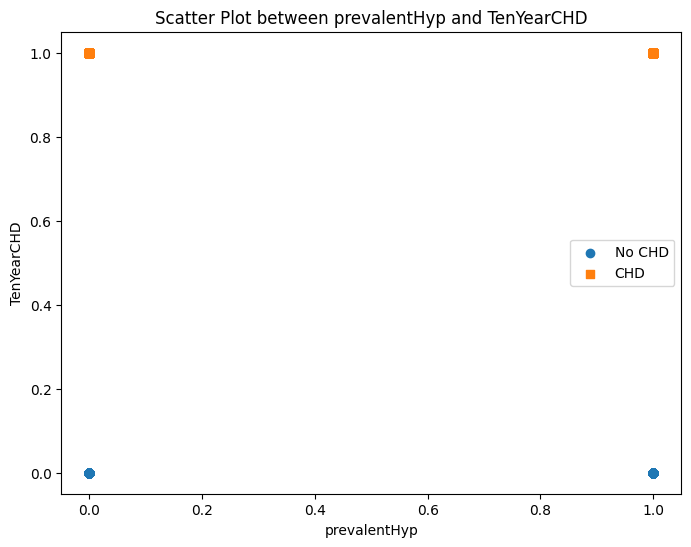

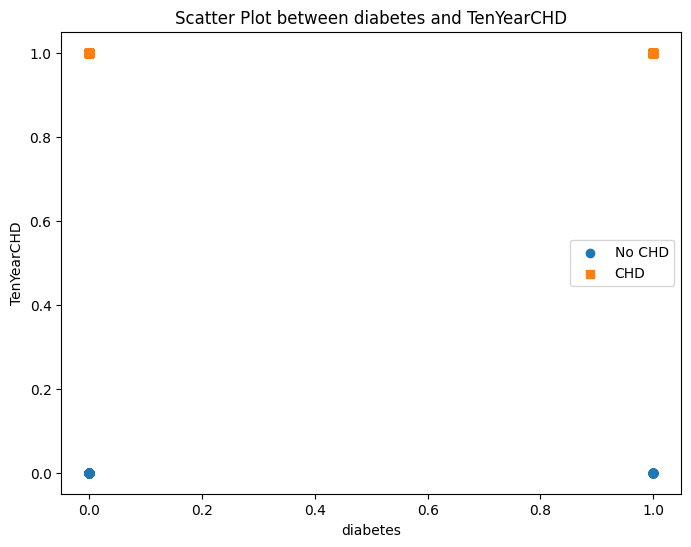

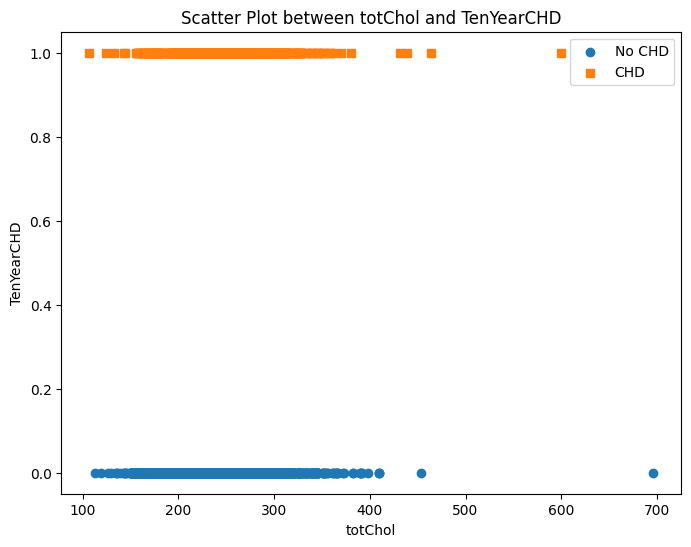

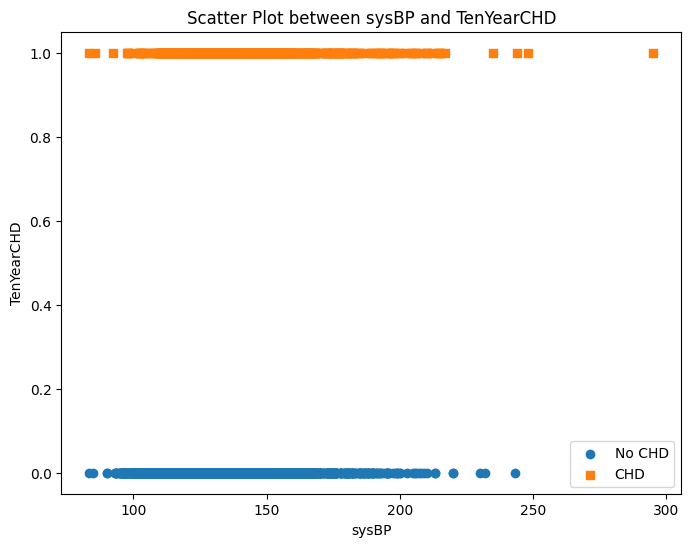

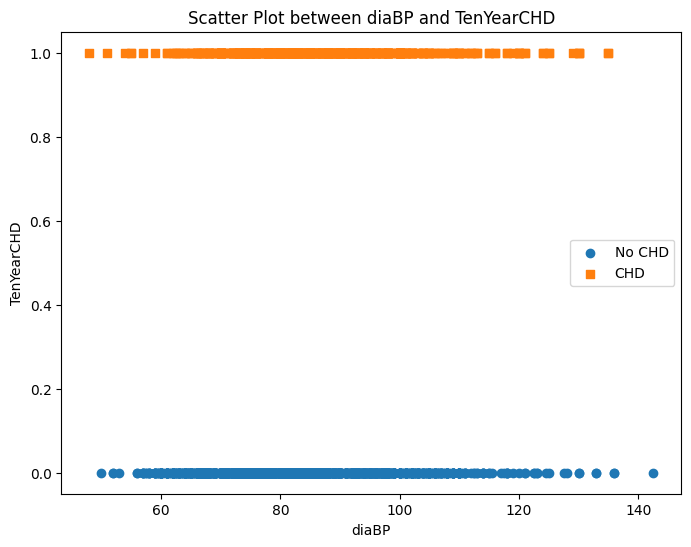

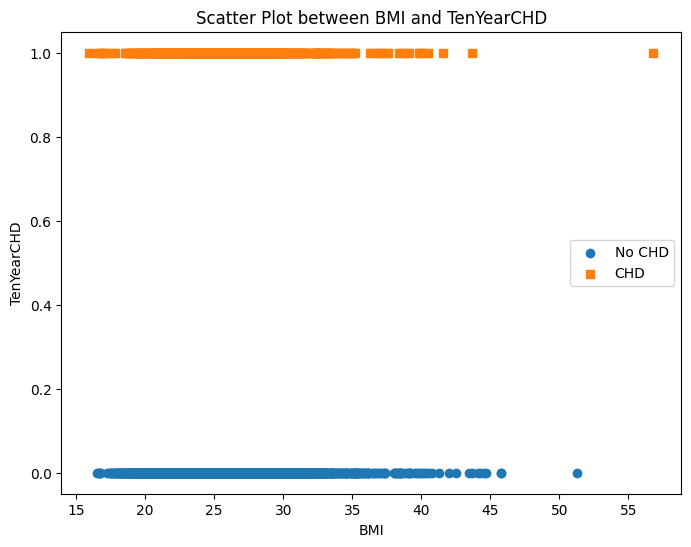

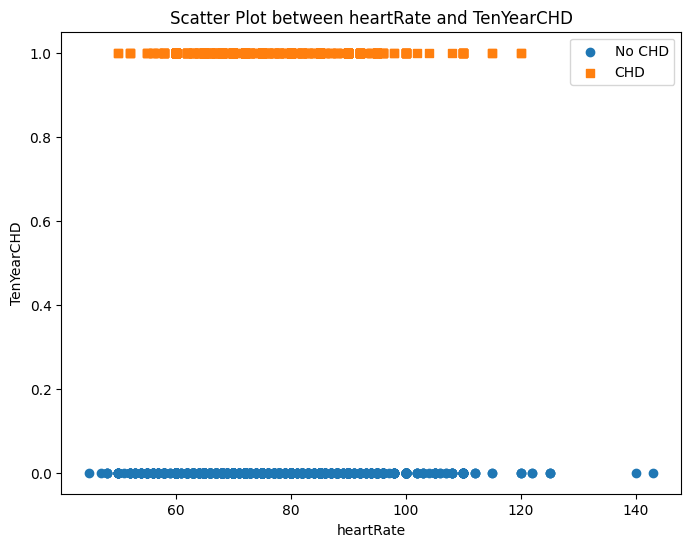

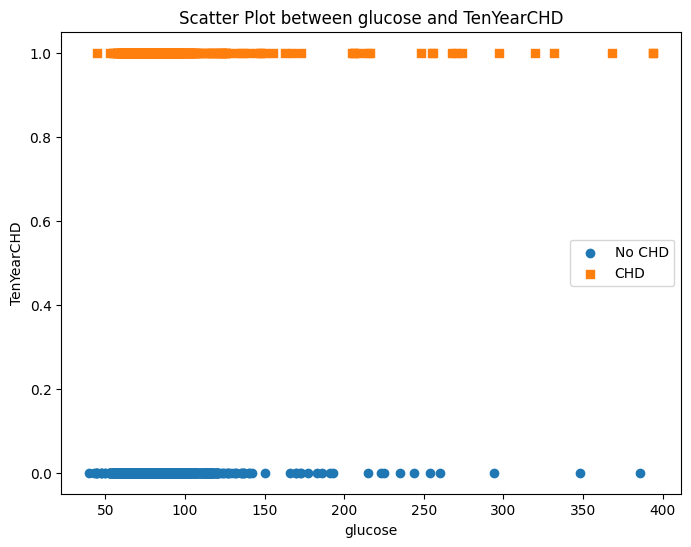

In [342]:
import matplotlib.pyplot as plt

# Assuming df is your dataset and 'TenYearCHD' is the dependent feature
# Replace 'feature1', 'feature2', 'feature3' with your actual independent feature names
independent_features = ['age', 'education', 'cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
dependent_feature = 'TenYearCHD'

# Create scatter plots using a for loop
for feature in independent_features:
    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature][df[dependent_feature] == 0], df[dependent_feature][df[dependent_feature] == 0], label='No CHD', marker='o')
    plt.scatter(df[feature][df[dependent_feature] == 1], df[dependent_feature][df[dependent_feature] == 1], label='CHD', marker='s')

    # Set labels and title
    plt.xlabel(feature)
    plt.ylabel(dependent_feature)
    plt.title(f'Scatter Plot between {feature} and {dependent_feature}')
    plt.legend()

    # Show the plot
    plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The mean cholesterol levels (totChol) are the same for smokers and non-smokers.

Alternative Hypothesis (H1): There is a significant difference in mean cholesterol levels between smokers and non-smokers.

#### 2. Perform an appropriate statistical test.

In [343]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate data for smokers and non-smokers
smokers = df[df['is_smoking'] == 'YES']['totChol']
non_smokers = df[df['is_smoking'] == 'NO']['totChol']

# Perform t-test
t_statistic, p_value = ttest_ind(smokers, non_smokers, equal_var=False)

# Set your significance level (e.g., 0.05)
alpha = 0.05

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean cholesterol levels.")
else:
    print("Fail to reject the null hypothesis. No significant difference in mean cholesterol levels.")


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis. No significant difference in mean cholesterol levels.


##### Which statistical test have you done to obtain P-Value?

I used an independent two-sample t-test (ttest_ind) from the scipy.stats module to obtain the p-value. The t-test was applied to compare the mean cholesterol levels between two groups: smokers and non-smokers.

##### Why did you choose the specific statistical test?

I chose the independent two-sample t-test because it is appropriate when comparing the means of two independent groups, which is the case in your hypothesis. Here's the rationale:

1. **Nature of the Comparison:**
   - Your hypothesis involves comparing the mean cholesterol levels between two independent groups: smokers and non-smokers.

2. **Parametric Test:**
   - The t-test is a parametric test suitable for comparing means of continuous variables when certain assumptions are met. It assumes that the data follow a normal distribution and that the variances of the two groups are either equal or not significantly different.

3. **Continuous Outcome Variable:**
   - Cholesterol levels are continuous numerical data, making the t-test appropriate for comparing means.

4. **Two Independent Groups:**
   - The independent two-sample t-test is specifically designed for comparing means when dealing with two independent groups.

5. **Equal Variance Assumption:**
   - By setting `equal_var=False` in the `ttest_ind` function, the test is performed under the assumption of unequal variances between the two groups, which is a more robust choice when the variances are not assumed to be equal.

It's important to note that the appropriateness of a statistical test depends on the characteristics of your data and the assumptions of the test. In some cases, alternative tests (such as non-parametric tests) might be considered if assumptions are not met. Always ensure that the chosen statistical test aligns with the nature of your data and the objectives of your analysis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): Age has no effect on the incidence of diabetes.

Alternative Hypothesis (H1): There is a significant association between age and the incidence of diabetes.
code snippet

#### 2. Perform an appropriate statistical test.

In [344]:
import statsmodels.api as sm
import pandas as pd


# Prepare the logistic regression model
X = df[['age']]
y = df['diabetes']
X = sm.add_constant(X)  # Add a constant term for the intercept

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary statistics
print(result.summary())

# Check if the p-value for 'age' is less than the significance level
if result.pvalues['age'] < 0.05:
    print("Reject the null hypothesis. There is a significant association between age and the incidence of diabetes.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between age and the incidence of diabetes.")

Optimization terminated successfully.
         Current function value: 0.113552
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3388
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                 0.04841
Time:                        15:51:38   Log-Likelihood:                -384.94
converged:                       True   LL-Null:                       -404.53
Covariance Type:            nonrobust   LLR p-value:                 3.886e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.8384      0.742    -10.565      0.000      -9.293      -6.384
age            0.0802      0.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the likelihood-ratio test associated with logistic regression. The logistic regression model is fitted using the Maximum Likelihood Estimation (MLE) method, and the likelihood-ratio test is used to assess the significance of the predictor variable 'age' in predicting the binary outcome 'diabetes.'

##### Why did you choose the specific statistical test?

I chose logistic regression for this analysis because the outcome variable, 'diabetes,' is binary (0 for no diabetes, 1 for diabetes), making it suitable for logistic regression, a type of regression analysis designed for binary outcomes. Here are the reasons for choosing logistic regression:

1. **Nature of the Outcome Variable:**
   - Logistic regression is appropriate for binary outcomes or outcomes that can be dichotomized. In this case, 'diabetes' is binary, making logistic regression a suitable choice.

2. **Log-Odds Transformation:**
   - Logistic regression models the log-odds of the probability of an event occurring. This is advantageous for binary outcomes as it allows the modeling of the relationship between predictors (in this case, 'age') and the likelihood of the event (diabetes) occurring.

3. **Handling Non-Linearity:**
   - Logistic regression can capture non-linear relationships between predictor variables and the log-odds of the outcome, providing flexibility in modeling complex relationships.

4. **Likelihood-Ratio Test:**
   - Logistic regression provides statistical tests, such as the likelihood-ratio test, for assessing the significance of predictor variables. This allows us to test hypotheses about the association between 'age' and 'diabetes.'

5. **Interpretability:**
   - Logistic regression coefficients can be interpreted as log-odds ratios, providing insights into the direction and strength of the relationship between the predictor and the outcome.

6. **Model Fit:**
   - Logistic regression is widely used in epidemiology and medical research for modeling binary outcomes, making it a common and well-established approach for analyzing this type of data.

It's crucial to choose a statistical test that aligns with the nature of your data and the research question at hand. Logistic regression, in this context, is a suitable choice for investigating the association between 'age' and the likelihood of 'diabetes' occurrence.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
The mean age is the same for individuals with and without a 10-year risk of CHD.


Alternative Hypothesis (H1):
There is a significant difference in the mean age between individuals with and without a 10-year risk of CHD.

#### 2. Perform an appropriate statistical test.

In [345]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming df is your DataFrame
# Drop any rows with missing values in 'TenYearCHD'
df_cleaned = df.dropna(subset=['TenYearCHD'])

# List to store results
test_results = []

# Numerical independent variables (excluding 'TenYearCHD')
numerical_variables = df_cleaned.select_dtypes(include='number').columns
numerical_variables = numerical_variables[numerical_variables != 'TenYearCHD']

# Significance level
alpha = 0.05

# Loop through each numerical independent variable
for variable in numerical_variables:
    # Split the data into two groups based on 'TenYearCHD'
    group_no_chd = df_cleaned[df_cleaned['TenYearCHD'] == 0][variable]
    group_chd = df_cleaned[df_cleaned['TenYearCHD'] == 1][variable]

    # Perform t-test
    t_statistic, p_value = ttest_ind(group_no_chd, group_chd)

    # Store results
    test_results.append({'Variable': variable, 'T-statistic': t_statistic, 'P-value': p_value})

    # Check for statistical significance
    if p_value < alpha:
        print(f"Reject the null hypothesis for {variable}. There is evidence that it is correlated with an increased risk of CHD.")
    else:
        print(f"Fail to reject the null hypothesis for {variable}. There is no significant evidence of a correlation between {variable} and CHD risk.")

# Convert results to DataFrame for easier inspection
results_df = pd.DataFrame(test_results)

# Display results
print(results_df)


Reject the null hypothesis for age. There is evidence that it is correlated with an increased risk of CHD.
Fail to reject the null hypothesis for education. There is no significant evidence of a correlation between education and CHD risk.
Fail to reject the null hypothesis for cigsPerDay. There is no significant evidence of a correlation between cigsPerDay and CHD risk.
Fail to reject the null hypothesis for BPMeds. There is no significant evidence of a correlation between BPMeds and CHD risk.
Reject the null hypothesis for prevalentStroke. There is evidence that it is correlated with an increased risk of CHD.
Reject the null hypothesis for prevalentHyp. There is evidence that it is correlated with an increased risk of CHD.
Reject the null hypothesis for diabetes. There is evidence that it is correlated with an increased risk of CHD.
Fail to reject the null hypothesis for totChol. There is no significant evidence of a correlation between totChol and CHD risk.
Reject the null hypothesis

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-values is the independent two-sample t-test. The t-test is applied to compare the means of two independent groups: individuals without a 10-year risk of Coronary Heart Disease (CHD) and individuals with a 10-year risk of CHD.

##### Why did you choose the specific statistical test?

The specific statistical test chosen in the provided code is the independent two-sample t-test. Here's why this test was chosen for comparing numerical independent variables between two groups:

1. **Nature of the Data:**
   - The data involves numerical independent variables, such as 'age,' and the comparison is between two groups: individuals with and without a 10-year risk of Coronary Heart Disease (CHD).

2. **Comparison of Means:**
   - The objective is to assess whether there is a significant difference in means between the two groups for each numerical variable.

3. **Two Independent Groups:**
   - The t-test is appropriate when comparing the means of two independent groups, which is the case here (individuals with and without a 10-year risk of CHD).

4. **Assumption of Normality:**
   - The t-test assumes that the data are approximately normally distributed. While robust to deviations from normality, the t-test is suitable when analyzing numerical data.

5. **Testing for Significance:**
   - The t-test provides a p-value that helps in testing the null hypothesis of equal means. If the p-value is below a chosen significance level (e.g., 0.05), it indicates that there is evidence to reject the null hypothesis.

6. **Ease of Interpretation:**
   - The results of the t-test are relatively easy to interpret, especially when assessing whether the means of two groups are statistically different.

While the t-test is a suitable choice for comparing means between two groups, it's important to consider the assumptions and limitations of the test. If the assumptions are not met or if dealing with non-numerical data, alternative tests might be considered. Always choose a statistical test that aligns with the nature of the data and the objectives of the analysis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [346]:
#close look of education NaN values
df[df['education'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
49    46        NaN   F        YES        20.0     0.0                0   
62    52        NaN   F         NO         0.0     0.0                0   
69    65        NaN   M         NO         0.0     0.0                0   
104   57        NaN   F         NO         0.0     1.0                0   
120   65        NaN   F         NO         0.0     0.0                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
49              0         0    212.0  122.5   75.5  23.51       67.0    103.0   
62              0         0    268.0  109.0   70.0  23.74       75.0     78.0   
69              0         0      NaN  152.5   97.5  28.35       65.0     73.0   
104             1         0    190.0  155.0   85.0  26.08       55.0     66.0   
120             0         0    221.0  155.0   92.0  31.34       58.0      NaN   

     TenYearCHD  
49            0  
62            0  
69            0  
104           0  
120           0

In [347]:
#close look of cigsPerDay NaN values
df[df['cigsPerDay'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
422   55        1.0   F        YES         NaN     0.0                0   
466   45        3.0   M        YES         NaN     0.0                0   
469   42        1.0   M        YES         NaN     0.0                0   
491   61        1.0   F        YES         NaN     0.0                0   
538   41        1.0   F        YES         NaN     0.0                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
422             1         0    213.0  163.0   91.0  28.66       69.0     66.0   
466             1         0    170.0  145.5   99.0  26.74       83.0     85.0   
469             0         0    196.0  123.0   73.0  22.06       66.0      NaN   
491             1         0    356.0  168.0   98.0  27.30      103.0    106.0   
538             0         0    171.0  135.0   82.5  24.35       79.0     82.0   

     TenYearCHD  
422           0  
466           0  
469           0  
491           0  
538           0

In [348]:
#close look of BPMeds NaN values
df[df['BPMeds'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
8     41        2.0   F        YES        20.0     NaN                0   
102   68        2.0   F         NO         0.0     NaN                0   
128   67        2.0   F         NO         0.0     NaN                0   
174   60        1.0   F         NO         0.0     NaN                0   
194   56        1.0   F         NO         0.0     NaN                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
8               0         0    220.0  126.0   78.0  20.70       86.0     79.0   
102             0         0    257.0  144.0   95.0  29.25       80.0     77.0   
128             0         0    261.0  117.0   63.0  22.55       75.0     83.0   
174             1         0    273.0  176.0   84.0  22.17       66.0     79.0   
194             1         0    391.0  126.0   84.0  24.83       80.0     78.0   

     TenYearCHD  
8             0  
102           0  
128           0  
174           0  
194           0

In [349]:
#close look of totChol NaN values
df[df['totChol'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
10    61        1.0   F         NO         0.0     0.0                0   
69    65        NaN   M         NO         0.0     0.0                0   
254   52        1.0   F         NO         0.0     0.0                0   
290   37        2.0   F        YES        30.0     0.0                0   
554   38        3.0   F        YES         3.0     1.0                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
10              1         0      NaN  185.0  121.0  35.22       80.0      NaN   
69              0         0      NaN  152.5   97.5  28.35       65.0     73.0   
254             0         0      NaN  129.0   83.0  32.57       65.0      NaN   
290             0         0      NaN  115.0   79.0  28.41       85.0      NaN   
554             1         0      NaN  125.0   80.0  22.79       98.0      NaN   

     TenYearCHD  
10            0  
69            0  
254           0  
290           0  
554           0

In [350]:
#close look of BMI NaN values
df[df['BMI'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0      64        2.0   F        YES         3.0     0.0                0   
54     63        1.0   M        YES        20.0     0.0                1   
271    47        2.0   F         NO         0.0     0.0                0   
720    61        1.0   F         NO         0.0     0.0                0   
1057   64        2.0   M        YES        20.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  \
0                0         0    221.0  148.0   85.0  NaN       90.0     80.0   
54               1         0    213.0  163.0   94.0  NaN       76.0     69.0   
271              0         0    195.0  126.0   75.0  NaN       60.0      NaN   
720              1         0    300.0  150.5   89.0  NaN       68.0     72.0   
1057             0         0    225.0  120.0   75.0  NaN       70.0     94.0   

      TenYearCHD  
0              1  
54             1  
271            1  
720            1  
1057           0

In [351]:
#close look of glucose NaN values
df[df['glucose'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
9    55        2.0   F         NO         0.0     0.0                0   
10   61        1.0   F         NO         0.0     0.0                0   
36   46        3.0   F         NO         0.0     0.0                0   
38   41        2.0   F        YES         9.0     1.0                1   
55   51        2.0   F         NO         0.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
9              1         0    326.0  144.0   81.0  25.71       85.0      NaN   
10             1         0      NaN  185.0  121.0  35.22       80.0      NaN   
36             0         0    193.0  106.5   70.5  26.18       75.0      NaN   
38             1         0    180.0  114.0   70.0  22.41       92.0      NaN   
55             1         0    351.0  134.0   97.5  21.66      100.0      NaN   

    TenYearCHD  
9            0  
10           0  
36           0  
38           0  
55           0

In [352]:
#close look of heart rate NaN values
df[df['heartRate'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1388   64        1.0   M        YES        18.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
1388             1         0    219.0  172.5   75.0  29.29        NaN   

      glucose  TenYearCHD  
1388     91.0           1

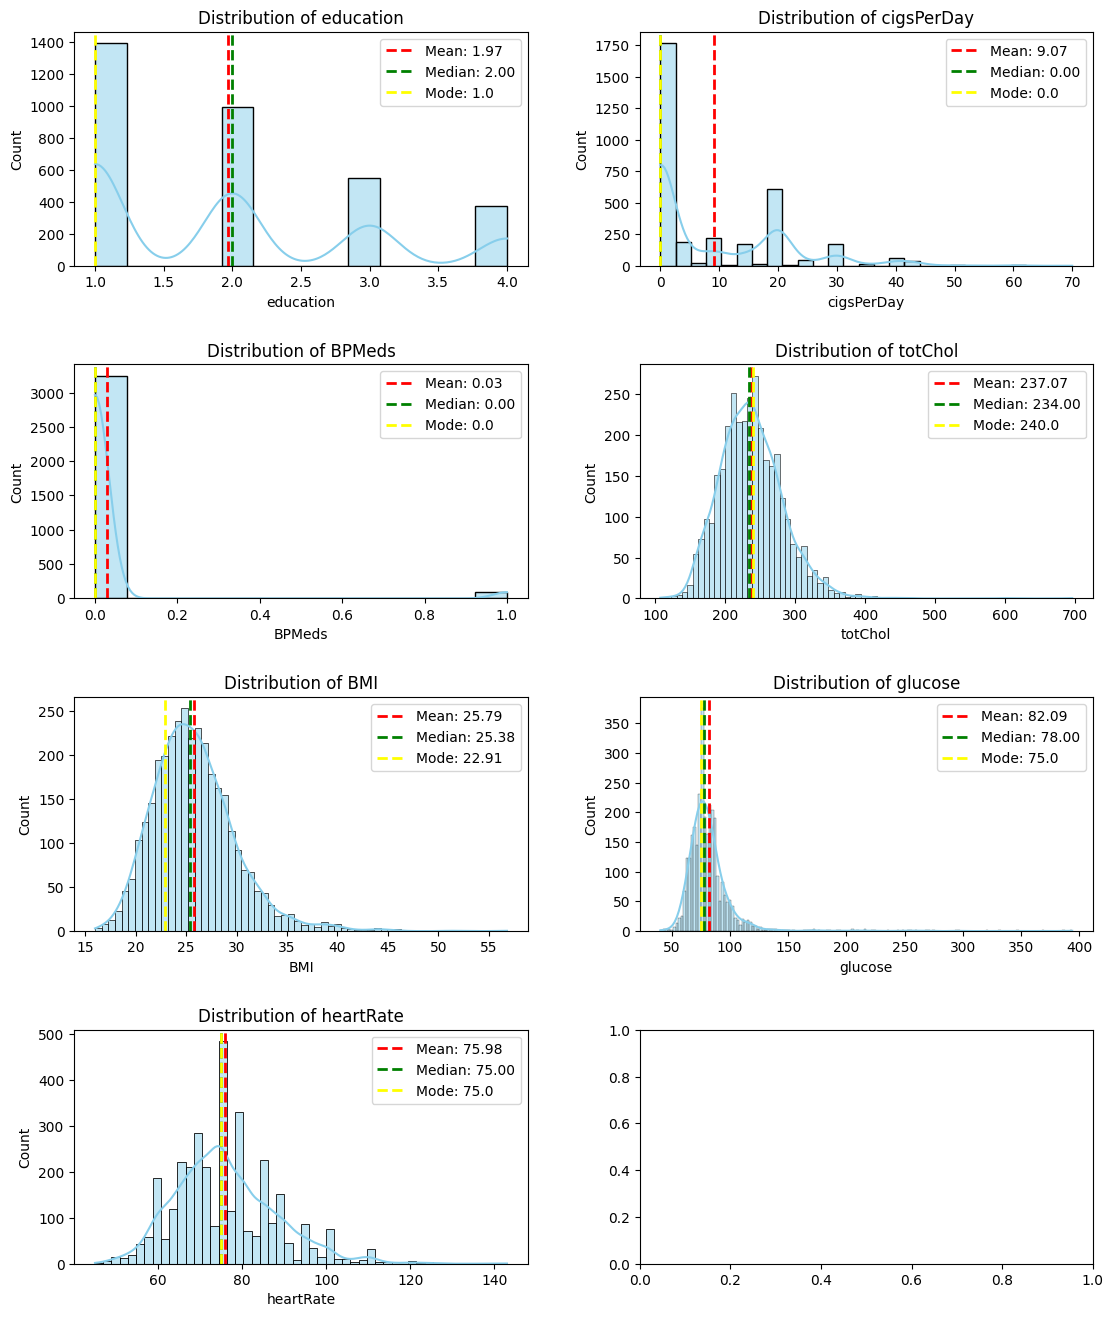

In [353]:
# List of columns to plot
columns_to_plot = ['education','cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate']

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
fig.tight_layout(pad=5.0)

# Check if there are enough subplots for the columns to plot
if len(columns_to_plot) > len(axes.flatten()):
    raise ValueError("Not enough subplots for the number of columns to plot.")

for i, column in enumerate(columns_to_plot):
    # Plot distribution
    sns.histplot(data_raw[column], kde=True, ax=axes[i // 2, i % 2], color='skyblue')

    # Annotate with mean, median, mode
    mean_value = data_raw[column].mean()
    median_value = data_raw[column].median()
    mode_value = data_raw[column].mode().values[0]

    axes[i // 2, i % 2].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[i // 2, i % 2].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[i // 2, i % 2].axvline(mode_value, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')

    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

plt.show()

In [354]:
# Calculate the mean of a specific column
column_mean = df['cigsPerDay'].mean()

print(f"Mean of 'cigsPerDay': {column_mean}")

# Replace the Nan values with Mean.
df['cigsPerDay'].fillna(int(column_mean), inplace=True)

Mean of 'cigsPerDay': 9.069477434679335


In [355]:

# Calculate the mean of a heartRate column
column_mean = df['heartRate'].mean()

print(f"Mean of 'heartRate': {column_mean}")

# Replace the Nan values with mean.
df['heartRate'].fillna(int(column_mean), inplace=True)

Mean of 'heartRate': 75.97727943346119


In [356]:
# Calculate the mean of a totChol column
column_median = df['totChol'].median()

print(f"Median of 'totChol': {column_median}")

# Replace the Nan values with Median.
df['totChol'].fillna(column_median, inplace=True)

Median of 'totChol': 234.0


In [357]:
# Calculate the mean of a BMI column
column_median = df['BMI'].median()

print(f"Median of 'BMI': {column_median}")

# Replace the Nan values with Median.
df['BMI'].fillna(column_median, inplace=True)

Median of 'BMI': 25.38


In [358]:
# Calculate the mean of a glucose column
column_median = df['glucose'].median()

print(f"Median of 'glucose': {column_median}")

# Replace the Nan values with Median.
df['glucose'].fillna(column_median, inplace=True)

Median of 'glucose': 78.0


In [359]:
# Calculate the mode of a BPMeds column
column_mode = df['BPMeds'].mode().values[0]

print(f"Mode of BPMeds: {column_mode}")

# Replace the Nan values with Mode.
df['BPMeds'].fillna(column_mode, inplace=True)

Mode of BPMeds: 0.0


In [360]:
# Calculate the mode of a BPMeds column
column_mode = df['education'].mode().values[0]

print(f"Mode of education: {column_mode}")

# Replace the Nan values with Mode.
df['education'].fillna(column_mode, inplace=True)

Mode of education: 1.0


In [361]:
#examining if we have any NULL values
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [363]:
# Select the non desired columns from 'df'
non_desired_column = ['education','age','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

# Create a new DataFrame with the selected columns
data = df[non_desired_column]

data.head()

education  age sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  \
0        2.0   64   F        YES     0.0                0             0   
1        4.0   36   M         NO     0.0                0             1   
2        1.0   46   F        YES     0.0                0             0   
3        1.0   50   M        YES     0.0                0             1   
4        1.0   64   F        YES     0.0                0             0   

   diabetes  TenYearCHD  
0         0           1  
1         0           0  
2         0           0  
3         0           1  
4         0           0

In [364]:
# Select the desired columns from 'df'
desired_columns = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Create a new DataFrame with the selected columns
data_a = df[desired_columns]

data_a.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0

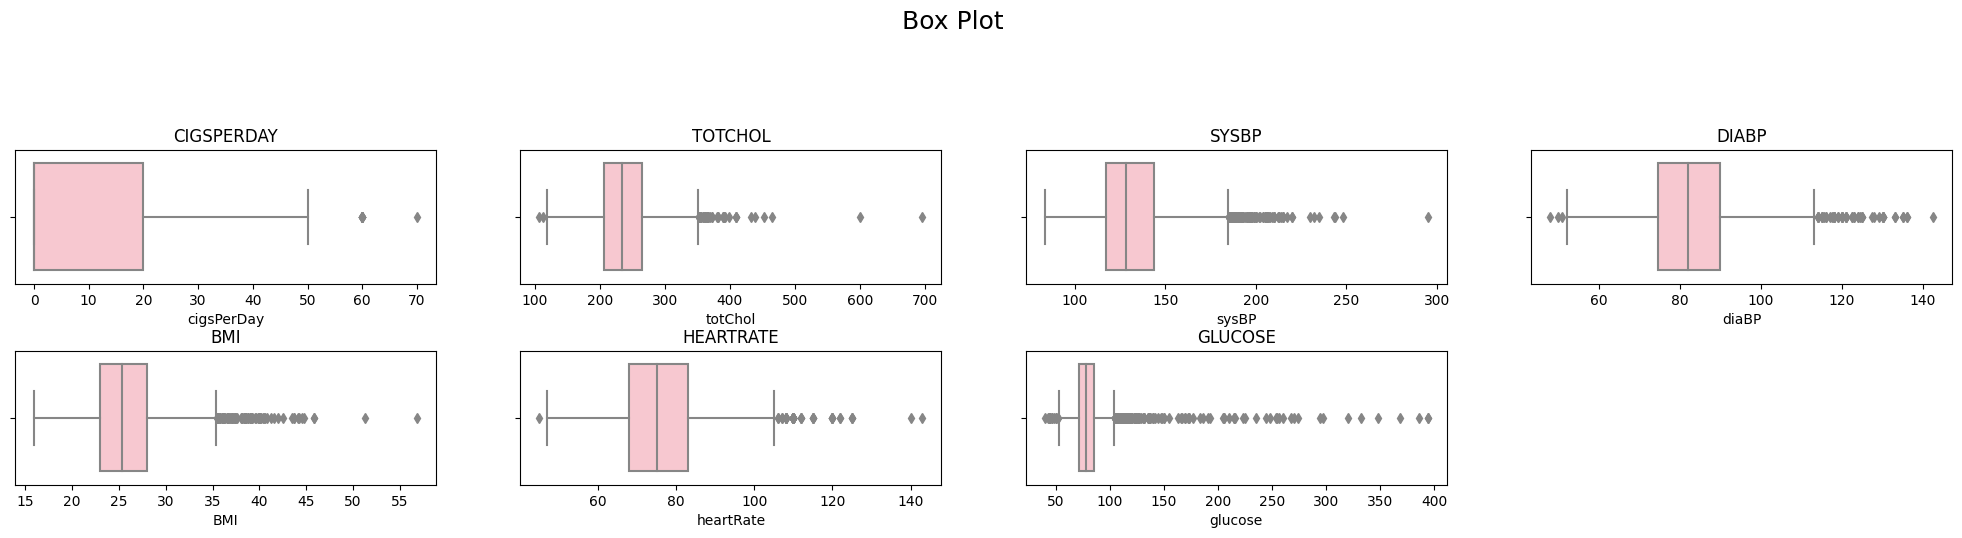

In [365]:
# Handling Outliers & Outlier treatments
df_2 = data_a.copy()

col_list = list(df_2.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [366]:
# Handling Outliers & Outlier treatments

def find_outliers_iqr(df_2):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = df_2.quantile(0.25)
    q3 = df_2.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (df_2 < lower_bound) | (df_2 > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers

outliers_per_column = find_outliers_iqr(df_2)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))

Number of outliers per column:
glucose       214
sysBP         105
BMI            79
heartRate      64
diaBP          58
totChol        43
cigsPerDay      9
dtype: int64


In [367]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df_2[ftr], 25)
  q_75 = np.percentile(df_2[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))

  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")

  # identify outliers
  outliers = [x for x in df_2[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))

  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]


    data_a[ftr] =  df_2.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

cigsPerDay 

Percentiles: 25th=0.000, 75th=20.000, IQR=20.000

lower = -30.0 and upper = 50.0 
 
Identified outliers: 9
cigsPerDay Outliers Removed

-------

totChol 

Percentiles: 25th=206.000, 75th=264.000, IQR=58.000

lower = 119.0 and upper = 351.0 
 
Identified outliers: 43
totChol Outliers Removed

-------

sysBP 

Percentiles: 25th=117.000, 75th=144.000, IQR=27.000

lower = 76.5 and upper = 184.5 
 
Identified outliers: 105
sysBP Outliers Removed

-------

diaBP 

Percentiles: 25th=74.500, 75th=90.000, IQR=15.500

lower = 51.25 and upper = 113.25 
 
Identified outliers: 58
diaBP Outliers Removed

-------

BMI 

Percentiles: 25th=23.030, 75th=27.997, IQR=4.967

lower = 15.578750000000005 and upper = 35.44875 
 
Identified outliers: 79
BMI Outliers Removed

-------

heartRate 

Percentiles: 25th=68.000, 75th=83.000, IQR=15.000

lower = 45.5 and upper = 105.5 
 
Identified outliers: 64
heartRate Outliers Removed

-------

glucose 

Percentiles: 25th=72.000, 75th=85.000, IQR=13.000


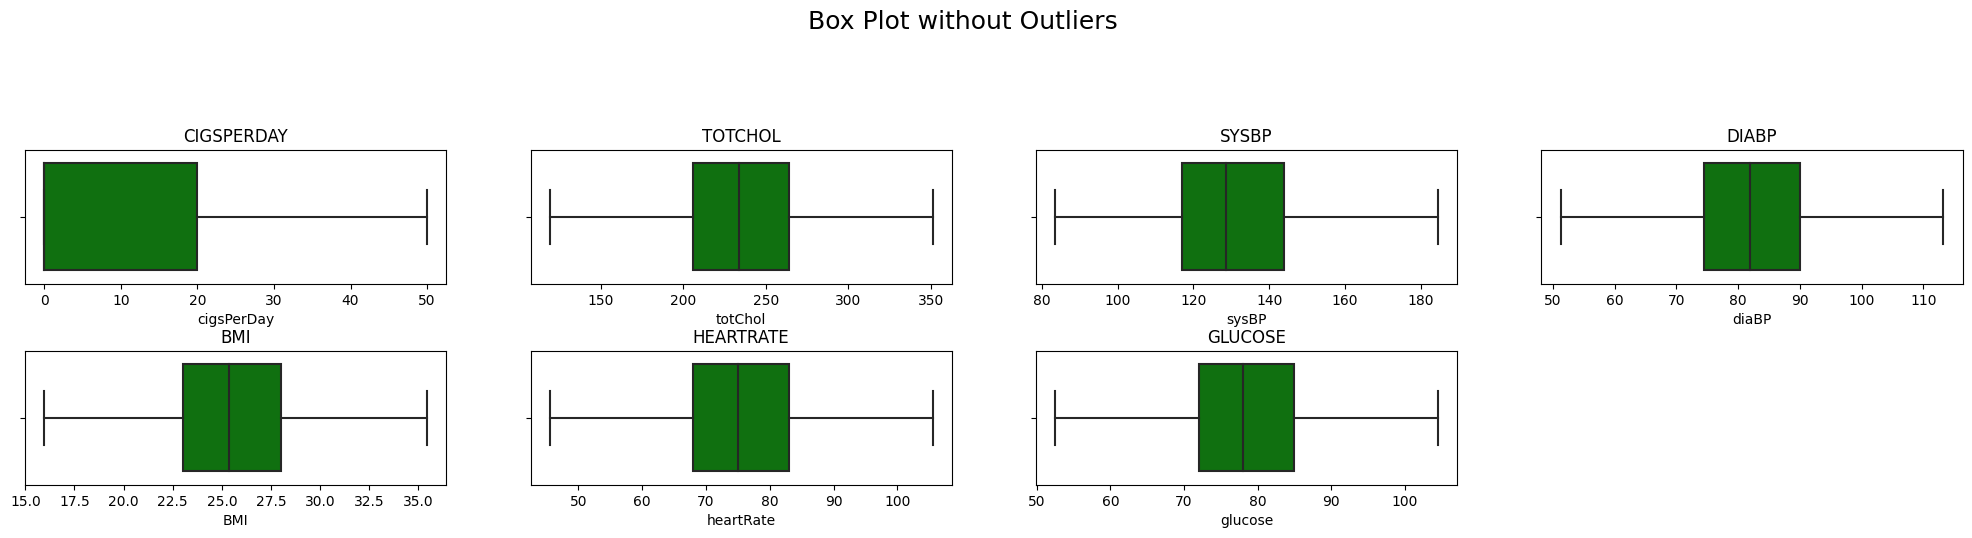

In [368]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=data_a[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [369]:
# Concatenate the two DataFrames vertically
df_new = pd.concat([data_a,data],axis=1)

In [370]:
data_a.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0

In [371]:
data.head()

education  age sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  \
0        2.0   64   F        YES     0.0                0             0   
1        4.0   36   M         NO     0.0                0             1   
2        1.0   46   F        YES     0.0                0             0   
3        1.0   50   M        YES     0.0                0             1   
4        1.0   64   F        YES     0.0                0             0   

   diabetes  TenYearCHD  
0         0           1  
1         0           0  
2         0           0  
3         0           1  
4         0           0

In [372]:
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  education  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0        2.0   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0        4.0   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0        1.0   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0        1.0   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0        1.0   

   age sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64   F        YES     0.0                0             0         0   
1   36   M         NO     0.0                0             1         0   
2   46   F        YES     0.0                0             0         0   
3   50   M        YES     0.0                0             1         0   
4   64   F        YES     0.0                0             0         0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

##### What all outlier treatment techniques have you used and why did you use those techniques?

In the provided code, you are using the Interquartile Range (IQR) method for identifying and treating outliers. Here's a breakdown of the techniques used and the rationale behind them:

1. **Identifying Outliers:**
   - Percentiles (25th and 75th) and IQR are calculated for each numerical feature in `col_list`.
   - The IQR is used to define the range within which most of the data points lie.

2. **Outlier Cutoffs:**
   - A common outlier cutoff is defined as \( \text{Lower Bound} = Q1 - 1.5 \times \text{IQR} \) and \( \text{Upper Bound} = Q3 + 1.5 \times \text{IQR} \).
   - Data points beyond these bounds are considered potential outliers.

3. **Identifying Outliers:**
   - Outliers are identified based on whether they fall below the lower bound or above the upper bound.

4. **Outlier Treatment:**
   - Identified outliers are then replaced with the upper or lower bound of the defined range.
   - This is achieved using a function (`bin`) applied to each row of the DataFrame.

Here are the outlier treatment techniques used in this code:

- **Capping Outliers:**
  - Outliers below the lower bound are replaced with the lower bound.
  - Outliers above the upper bound are replaced with the upper bound.

**Rationale:**
- The IQR method is a robust approach for identifying outliers, as it is less sensitive to extreme values than other methods.
- Capping outliers using 1.5 times the IQR is a common and conservative approach to address extreme values without completely removing them.

**Potential Improvements:**
- Consideration of other outlier detection methods, such as Z-score or modified Z-score, which may provide different perspectives on outliers.
- Evaluation of the impact of outlier treatment on the distribution and statistical properties of the data.

Remember that the choice of outlier treatment depends on the characteristics of the data and the objectives of the analysis.

### 3. Categorical Encoding

In [373]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'rating' column to perform label encoding
df_new['sex_encoded'] = label_encoder.fit_transform(df_new['sex'])


df_new.drop('sex', axis=1, inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

 I have used Label Encoding to encode the 'sex' column in the DataFrame. Let's discuss this technique and explore other common categorical encoding techniques

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [374]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [375]:
#Creating new feature Hypertension
df_new['Hypertension'] = df_new.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  education  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0        2.0   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0        4.0   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0        1.0   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0        1.0   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0        1.0   

   age is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64        YES     0.0                0             0         0   
1   36         NO     0.0                0             1         0   
2   46        YES     0.0                0             0         0   
3   50        YES     0.0                0             1         0   
4   64        YES     0.0                0             0         0   

   TenYearCHD  sex_encoded  Hypertension  
0           1            0             2  
1           0            1             5  
2           0            0             1  
3           1            1             3  
4           0            0             2

In [376]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

In [377]:
#Creating new feature Diabetes
df_new['Diabetes'] = df_new['glucose'].apply(lambda x: diabetes_grade(x))
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  education  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0        2.0   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0        4.0   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0        1.0   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0        1.0   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0        1.0   

   age is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64        YES     0.0                0             0         0   
1   36         NO     0.0                0             1         0   
2   46        YES     0.0                0             0         0   
3   50        YES     0.0                0             1         0   
4   64        YES     0.0                0             0         0   

   TenYearCHD  sex_encoded  Hypertension  Diabetes  
0           1            0             2         1  
1           0            1             5         1  
2           0            0             1         1  
3           1            1             3         1  
4           0            0             2         1

In [378]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df_new["mean_art_pressure"] = (df_new["sysBP"] + 2 * df_new["diaBP"])/3

In [379]:
# remove not useful columns
df_new.drop(columns=['sysBP', 'diaBP', 'is_smoking'], inplace=True)

#### 2. Feature Selection

In [380]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# "TenYearCHD" is the dependent variable


# Split the data into features (X) and target variable (y)
X = df_new.drop("TenYearCHD", axis=1)
y = df_new["TenYearCHD"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=X_train.columns, columns=['importance'])

# Select features based on importance threshold
sfm = SelectFromModel(rf_classifier, threshold=0.04)  # Adjust the threshold as needed
sfm.fit(X_train, y_train)

# Transform the data to keep only important features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a new Random Forest model on the selected features
rf_classifier_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = rf_classifier_selected.predict(X_test_selected)

# Evaluate the model performance
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy on Selected Features:", accuracy_selected)

# Print selected features
selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)

Accuracy on Selected Features: 0.855457227138643
Selected Features: Index(['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'education',
       'age', 'Hypertension', 'mean_art_pressure'],
      dtype='object')


In [381]:
# Create a DataFrame with selected features and their importances
selected_features_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances.loc[selected_features, 'importance']
})

# Sort the DataFrame by importance in descending order
selected_features_df = selected_features_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Selected Features and Their Importances:")
print(selected_features_df)


Selected Features and Their Importances:
                             Feature  Importance
mean_art_pressure  mean_art_pressure    0.142648
BMI                              BMI    0.139143
age                              age    0.135989
totChol                      totChol    0.135398
glucose                      glucose    0.112749
heartRate                  heartRate    0.106580
cigsPerDay                cigsPerDay    0.066207
education                  education    0.043017
Hypertension            Hypertension    0.042860


In [382]:
# Create a DataFrame using selected features and fill the values with actual rows
df_selected_features = df_new[selected_features].copy()

# Add the target variable column ("TenYearCHD") to the new DataFrame
df_selected_features["TenYearCHD"] = df_new["TenYearCHD"]

# Display the new DataFrame with selected features and target variable
print("DataFrame with Selected Features:")
df_selected_features.head()

DataFrame with Selected Features:


cigsPerDay  totChol    BMI  heartRate  glucose  education  age  \
0         3.0    221.0  25.38       90.0     80.0        2.0   64   
1         0.0    212.0  29.77       72.0     75.0        4.0   36   
2        10.0    250.0  20.35       88.0     94.0        1.0   46   
3        20.0    233.0  28.26       68.0     94.0        1.0   50   
4        30.0    241.0  26.42       70.0     77.0        1.0   64   

   Hypertension  mean_art_pressure  TenYearCHD  
0             2         106.000000           1  
1             5         121.333333           0  
2             1          86.000000           0  
3             3         111.333333           1  
4             2         102.166667           0

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [383]:
# Manipulate Features to minimize feature correlation and create new features
#examining the skewness in the dataset to check the distribution
skewness = df_selected_features.skew()

#ginding the absolute value
abs(skewness)

# setting up the threshold
skewness_threshold = 0.5

# Separate features into symmetrical and skewed based on skewness threshold
symmetrical_features = skewness[abs(skewness) < skewness_threshold].index
skewed_features = skewness[abs(skewness) >= skewness_threshold].index

# Create new DataFrames for symmetrical and skewed features
print('FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :')
symmetrical_data = df_new[symmetrical_features]
print(symmetrical_features)

print('FEATURES FOLLOWED SKEWED DISTRIBUTION :')
skewed_data = df_new[skewed_features]
print(skewed_features)

FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :
Index(['totChol', 'BMI', 'heartRate', 'glucose', 'age'], dtype='object')
FEATURES FOLLOWED SKEWED DISTRIBUTION :
Index(['cigsPerDay', 'education', 'Hypertension', 'mean_art_pressure',
       'TenYearCHD'],
      dtype='object')


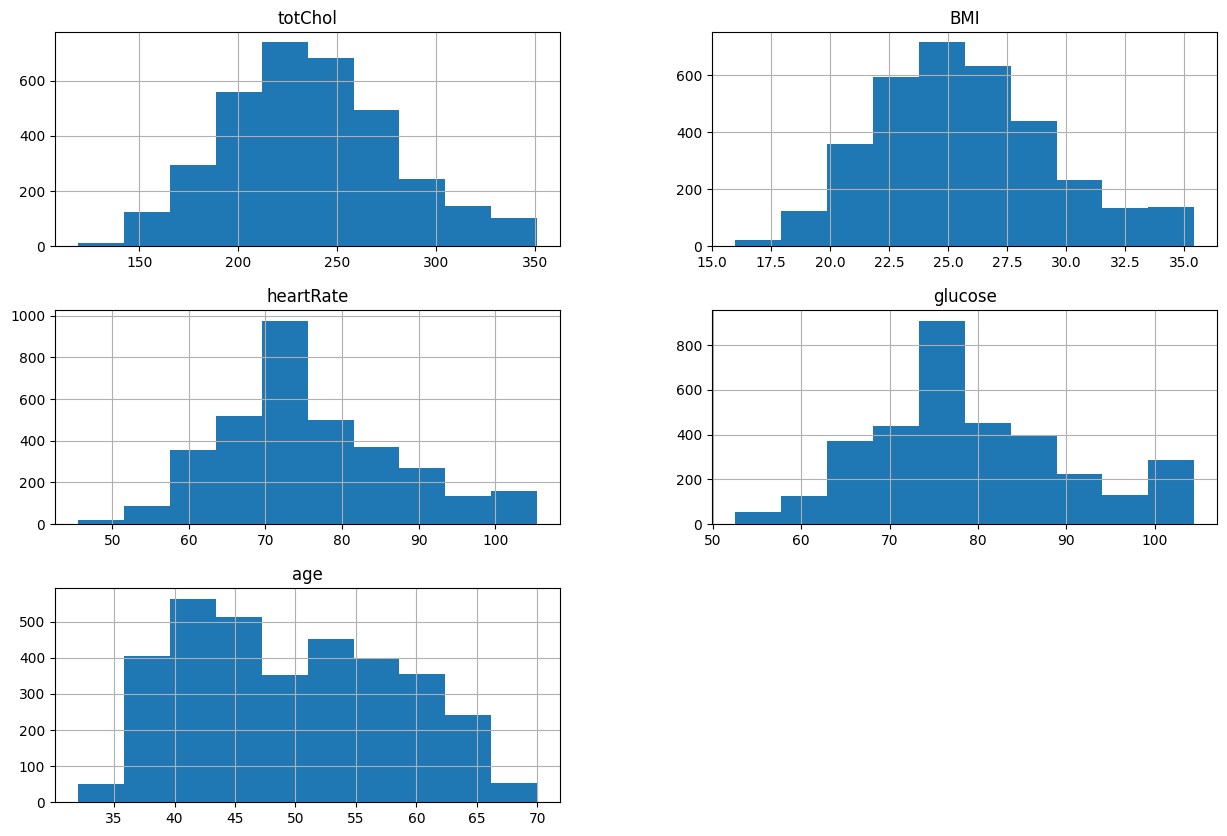

In [384]:
# Visualizing distributions using Histograms:
symmetrical_data.hist(figsize=(15, 10), grid=True);

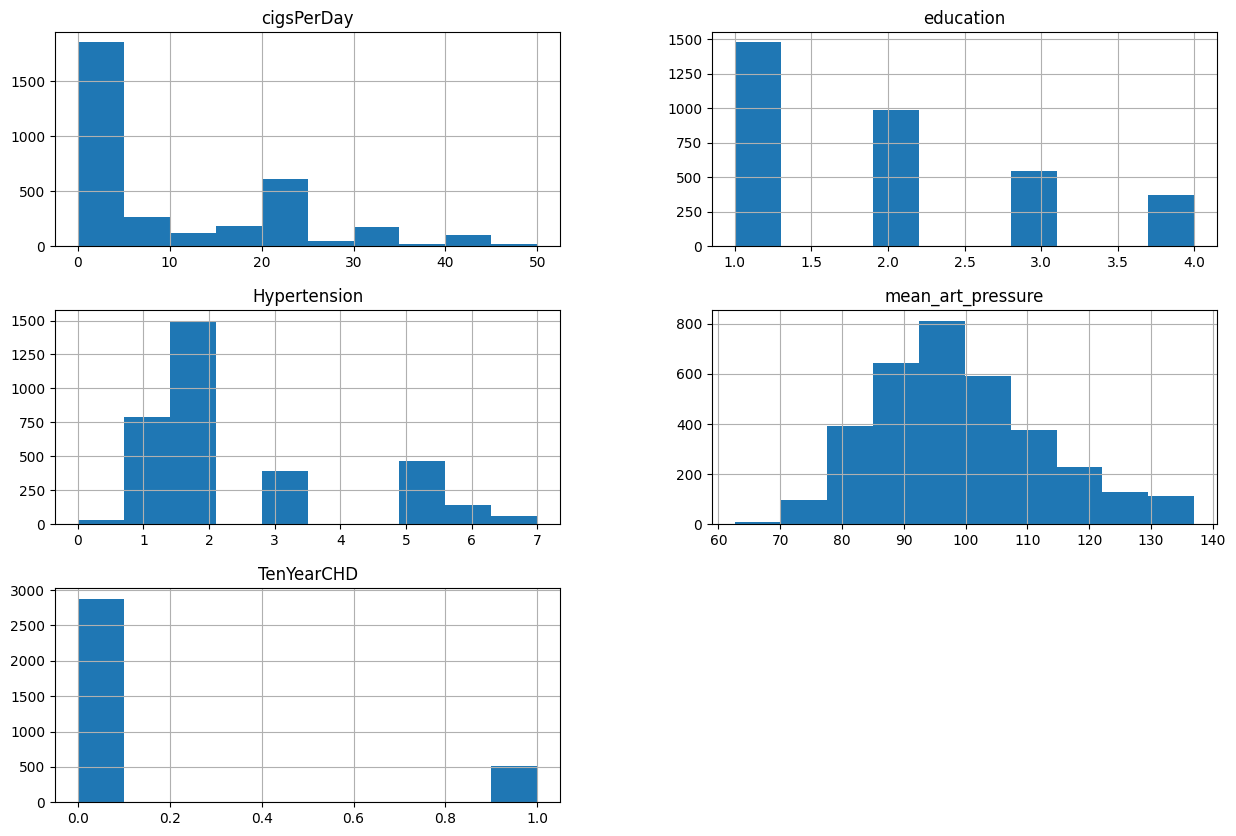

In [385]:
# Visualizing distributions using Histograms:
skewed_data.hist(figsize=(15, 10), grid=True);

In [386]:
skewed_data.columns

Index(['cigsPerDay', 'education', 'Hypertension', 'mean_art_pressure',
       'TenYearCHD'],
      dtype='object')

In [387]:
import pandas as pd

# Assuming 'skewed_data' is your DataFrame
unique_value_counts = skewed_data.nunique()

# Print or view the unique value counts for each column
print(unique_value_counts)

cigsPerDay            30
education              4
Hypertension           7
mean_art_pressure    376
TenYearCHD             2
dtype: int64


In [388]:
import numpy as np

# Define a function to calculate the WoE values
def calculate_woe(df, feature, target):
    event_total = df[target].sum()
    non_event_total = df.shape[0] - event_total
    event_count = df.groupby(feature)[target].sum()
    non_event_count = df.groupby(feature)[target].count() - event_count
    woe_values = np.log((non_event_count / non_event_total) / (event_count / event_total))
    return woe_values

# Calculate WoE values for the skewed categorical features
# woe_bpm = calculate_woe(skewed_data, 'BPMeds', 'TenYearCHD')
woe_education = calculate_woe(skewed_data, 'education', 'TenYearCHD')
woe_hypertension = calculate_woe(skewed_data, 'Hypertension', 'TenYearCHD')

# Replace the original categorical values with the WoE values
# skewed_data['BPMeds'] = skewed_data['BPMeds'].map(woe_bpm)
skewed_data['education'] = skewed_data['education'].map(woe_education)
skewed_data['Hypertension'] = skewed_data['Hypertension'].map(woe_hypertension)

In [389]:
# Select the columns you want to transform
columns_to_transform = ['cigsPerDay','mean_art_pressure' ]

# Apply log transformation to the selected columns
skewed_data[columns_to_transform] = skewed_data[columns_to_transform].apply(lambda x: np.log1p(x))

# Display the transformed DataFrame
skewed_data.head()

cigsPerDay  education  Hypertension  mean_art_pressure  TenYearCHD
0    1.386294   0.271276      0.086461           4.672829           1
1    0.000000   0.047378     -0.488386           4.806750           0
2    2.397895  -0.225991      0.702589           4.465908           0
3    3.044522  -0.225991     -0.009043           4.721471           1
4    3.433987  -0.225991      0.086461           4.636346           0

In [390]:
symmetrical_data.head()

totChol    BMI  heartRate  glucose  age
0    221.0  25.38       90.0     80.0   64
1    212.0  29.77       72.0     75.0   36
2    250.0  20.35       88.0     94.0   46
3    233.0  28.26       68.0     94.0   50
4    241.0  26.42       70.0     77.0   64

In [391]:
# Concatenate horizontally (along columns)
tranformed_data = pd.concat([symmetrical_data, skewed_data], axis=1)

In [392]:
# Assuming 'heartRate' is the column you want to drop
tranformed_data = tranformed_data.drop('heartRate', axis=1)

In [393]:
# Display the shape after dropping the column
print(tranformed_data.shape)

(3390, 9)


### 6. Data Scaling

In [394]:
from sklearn.preprocessing import StandardScaler

# Separate the features (X) from the target variable
X = tranformed_data.drop("TenYearCHD", axis=1)
y = tranformed_data["TenYearCHD"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features using the scaler
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable column ("TenYearCHD") to the scaled DataFrame
df_scaled["TenYearCHD"] = y

# Display the new DataFrame with scaled features and target variable
print("DataFrame with Scaled Features (Standard Scaler):")
df_scaled.head()


DataFrame with Scaled Features (Standard Scaler):


totChol       BMI   glucose       age  cigsPerDay  education  \
0 -0.362779 -0.085301  0.044207  1.682783    0.010317   1.137472   
1 -0.572897  1.066765 -0.389669 -1.576210   -0.936020   0.134377   
2  0.314268 -1.405321  1.259059 -0.412284    0.700873  -1.090358   
3 -0.082622  0.670496  1.259059  0.053287    1.142286  -1.090358   
4  0.104150  0.187626 -0.216119  1.682783    1.408149  -1.090358   

   Hypertension  mean_art_pressure  TenYearCHD  
0      0.031177           0.555352           1  
1     -1.224786           1.547952           0  
2      1.377332          -0.978313           0  
3     -0.177486           0.915878           1  
4      0.031177           0.284945           0

In [219]:
# from sklearn.preprocessing import MinMaxScaler

# # Separate the features (X) from the target variable
# X = tranformed_data.drop("TenYearCHD", axis=1)
# y = tranformed_data["TenYearCHD"]

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the features using the scaler
# X_scaled = scaler.fit_transform(X)

# # Create a DataFrame with the scaled features
# df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# # Add the target variable column ("TenYearCHD") to the scaled DataFrame
# df_scaled["TenYearCHD"] = y

# # Display the new DataFrame with scaled features and target variable
# print("DataFrame with Scaled Features:")
# df_scaled.head()

DataFrame with Scaled Features:


totChol       BMI   glucose       age  cigsPerDay  education  \
0  0.439655  0.483356  0.528846  0.842105    0.352583   1.000000   
1  0.400862  0.708614  0.432692  0.105263    0.000000   0.549744   
2  0.564655  0.225258  0.798077  0.368421    0.609868   0.000000   
3  0.491379  0.631133  0.798077  0.473684    0.774328   0.000000   
4  0.525862  0.536720  0.471154  0.842105    0.873382   0.000000   

   Hypertension  mean_art_pressure  TenYearCHD  
0      0.713933           0.671113           1  
1      0.447032           0.844228           0  
2      1.000000           0.403632           0  
3      0.669590           0.733990           1  
4      0.713933           0.623952           0

In [395]:
# Drop all rows with NaN values in place
df_scaled.dropna(inplace=True)

In [396]:
#example if there is nan value introduced while scalling or transofrmation
df_scaled.isna().sum()

totChol              0
BMI                  0
glucose              0
age                  0
cigsPerDay           0
education            0
Hypertension         0
mean_art_pressure    0
TenYearCHD           0
dtype: int64

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [397]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df_scaled.drop("TenYearCHD", axis=1)
y = df_scaled['TenYearCHD']

In [398]:
#splitting the data into 80/20 ration
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [399]:
# Install the imbalanced-learn library
!pip install -U imbalanced-learn

In [400]:
# Assuming y_train and y_test are pandas Series or NumPy arrays
import pandas as pd

# Check value counts for y_train
print("y_train value counts:")
print(pd.Series(y_train).value_counts())

# Check value counts for y_test
print("\ny_test value counts:")
print(pd.Series(y_test).value_counts())

y_train value counts:
0    2174
1     368
Name: TenYearCHD, dtype: int64

y_test value counts:
0    705
1    143
Name: TenYearCHD, dtype: int64


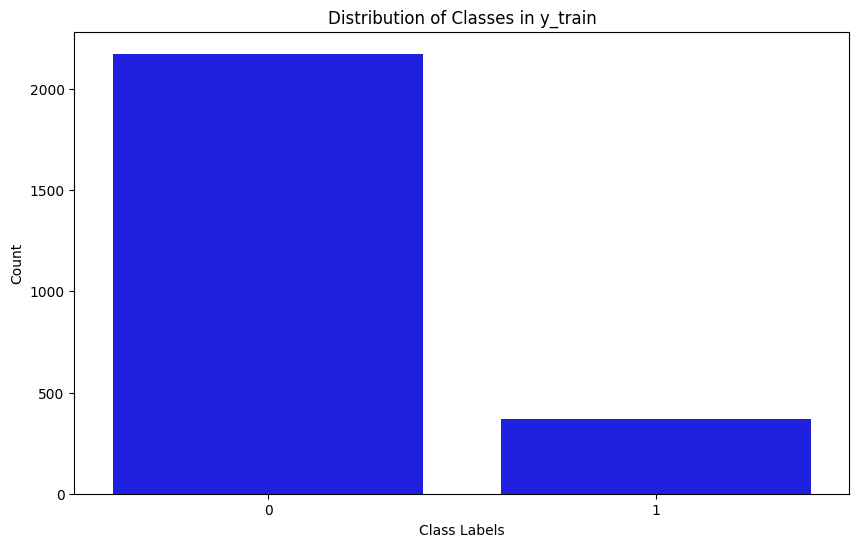

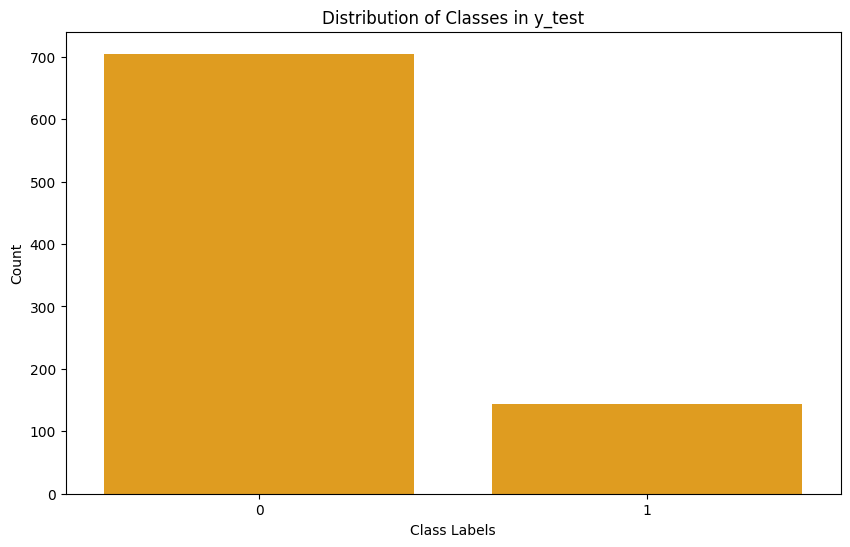

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train and y_test are pandas Series or NumPy arrays
import pandas as pd

# Check value counts for y_train
y_train_counts = pd.Series(y_train).value_counts()

# Check value counts for y_test
y_test_counts = pd.Series(y_test).value_counts()

# Plotting the distribution for y_train
plt.figure(figsize=(10, 6))
sns.barplot(x=y_train_counts.index, y=y_train_counts.values, color='blue')
plt.title('Distribution of Classes in y_train')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

# Plotting the distribution for y_test
plt.figure(figsize=(10, 6))
sns.barplot(x=y_test_counts.index, y=y_test_counts.values, color='orange')
plt.title('Distribution of Classes in y_test')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

In [402]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert the resampled data back to DataFrames
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.Series(y_train_resampled, name=y_train.name)

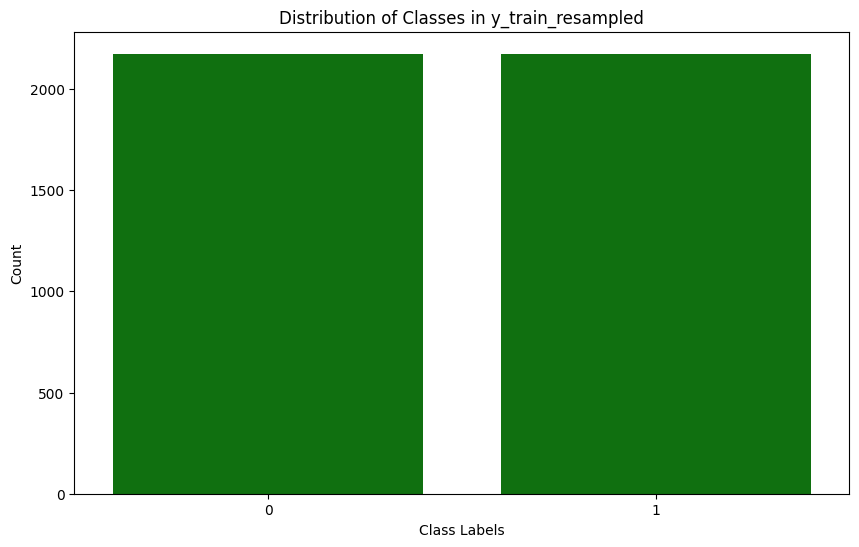

In [403]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check value counts for y_train_resampled
y_train_resampled_counts = y_train_resampled_df.value_counts()

# Plotting the distribution for y_train_resampled
plt.figure(figsize=(10, 6))
sns.barplot(x=y_train_resampled_counts.index, y=y_train_resampled_counts.values, color='green')
plt.title('Distribution of Classes in y_train_resampled')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

# ***7. ML Model Implementation***

## BASIC MODELS

### Model 1 - Logistic Regression


Threshold: 0.2


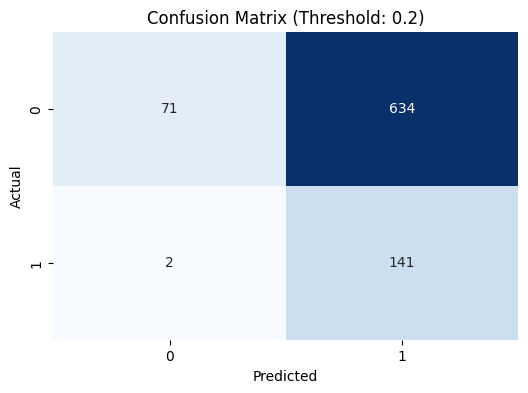

Accuracy: 0.25
AUC-ROC Score: 0.7526657739423697
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.10      0.18       705
           1       0.18      0.99      0.31       143

    accuracy                           0.25       848
   macro avg       0.58      0.54      0.24       848
weighted avg       0.84      0.25      0.20       848

---------------------------------------------------------

Threshold: 0.3


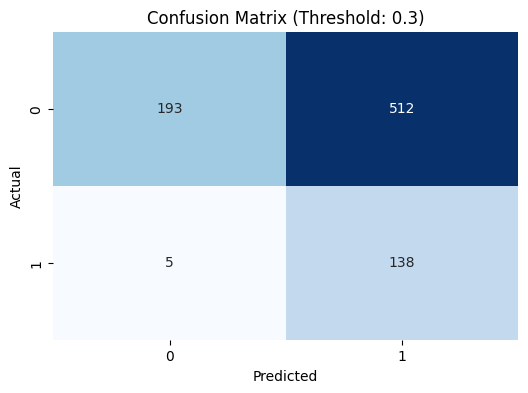

Accuracy: 0.3903301886792453
AUC-ROC Score: 0.7526657739423697
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.27      0.43       705
           1       0.21      0.97      0.35       143

    accuracy                           0.39       848
   macro avg       0.59      0.62      0.39       848
weighted avg       0.85      0.39      0.41       848

---------------------------------------------------------

Threshold: 0.4


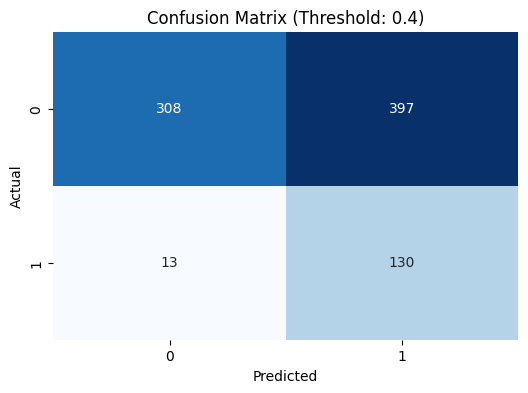

Accuracy: 0.5165094339622641
AUC-ROC Score: 0.7526657739423697
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.44      0.60       705
           1       0.25      0.91      0.39       143

    accuracy                           0.52       848
   macro avg       0.60      0.67      0.49       848
weighted avg       0.84      0.52      0.56       848

---------------------------------------------------------

Threshold: 0.5


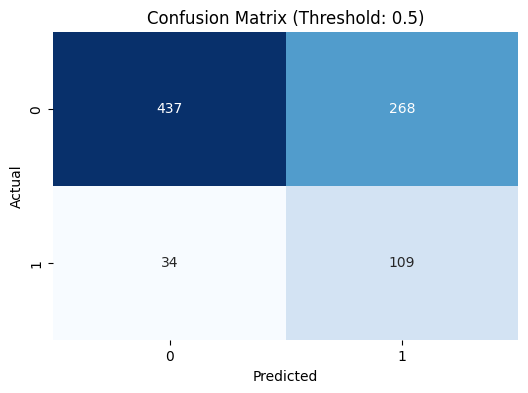

Accuracy: 0.6438679245283019
AUC-ROC Score: 0.7526657739423697
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.62      0.74       705
           1       0.29      0.76      0.42       143

    accuracy                           0.64       848
   macro avg       0.61      0.69      0.58       848
weighted avg       0.82      0.64      0.69       848

---------------------------------------------------------

Threshold: 0.6


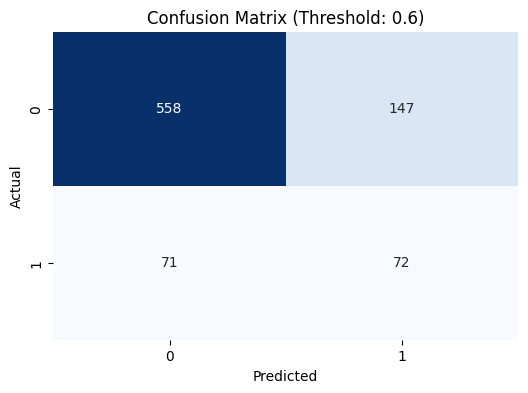

Accuracy: 0.7429245283018868
AUC-ROC Score: 0.7526657739423697
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       705
           1       0.33      0.50      0.40       143

    accuracy                           0.74       848
   macro avg       0.61      0.65      0.62       848
weighted avg       0.79      0.74      0.76       848

---------------------------------------------------------

Threshold: 0.7


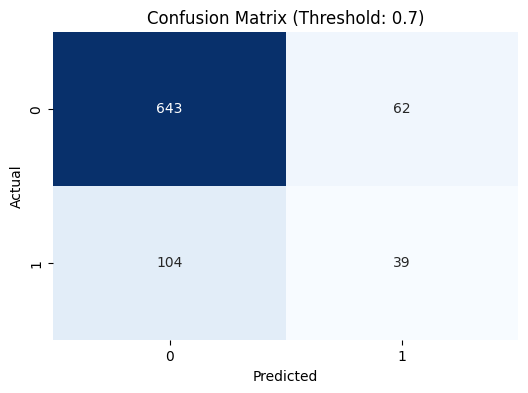

Accuracy: 0.8042452830188679
AUC-ROC Score: 0.7526657739423697
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89       705
           1       0.39      0.27      0.32       143

    accuracy                           0.80       848
   macro avg       0.62      0.59      0.60       848
weighted avg       0.78      0.80      0.79       848

---------------------------------------------------------

Threshold: 0.8


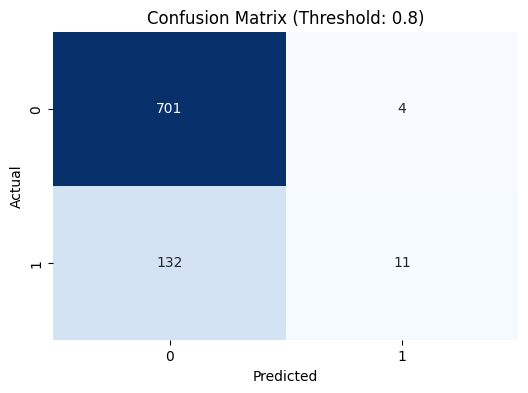

Accuracy: 0.839622641509434
AUC-ROC Score: 0.7526657739423697
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       705
           1       0.73      0.08      0.14       143

    accuracy                           0.84       848
   macro avg       0.79      0.54      0.53       848
weighted avg       0.82      0.84      0.78       848

---------------------------------------------------------


In [404]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs = logreg_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)

    # Get the confusion matrix
    cm = confusion_matrix(y_test, y_pred_threshold)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = accuracy_score(y_test, y_pred_threshold)
    roc_auc = roc_auc_score(y_test, y_probs)

    print("Accuracy:", accuracy)
    print("AUC-ROC Score:", roc_auc)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold))
    print('---------------------------------------------------------')

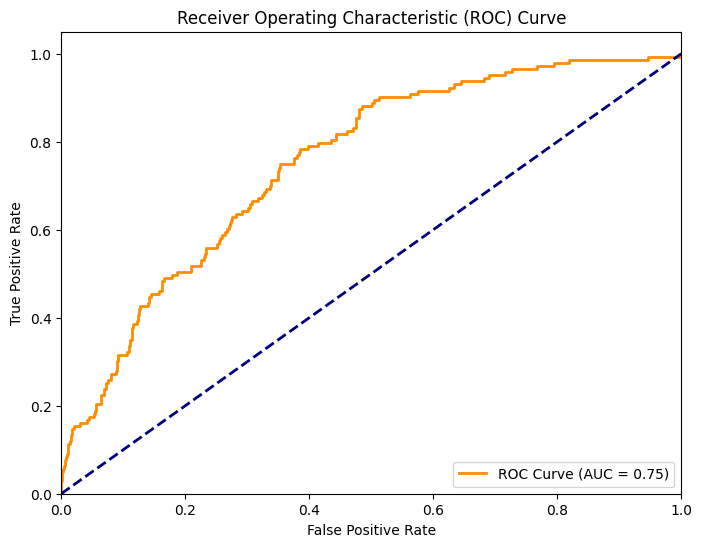

In [405]:
from sklearn.metrics import roc_curve, auc
# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.01, 'penalty': 'l2'}

Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.93      0.62      0.75       705
           1       0.30      0.78      0.43       143

    accuracy                           0.65       848
   macro avg       0.62      0.70      0.59       848
weighted avg       0.83      0.65      0.69       848

Accuracy for Best Model: 0.6509433962264151


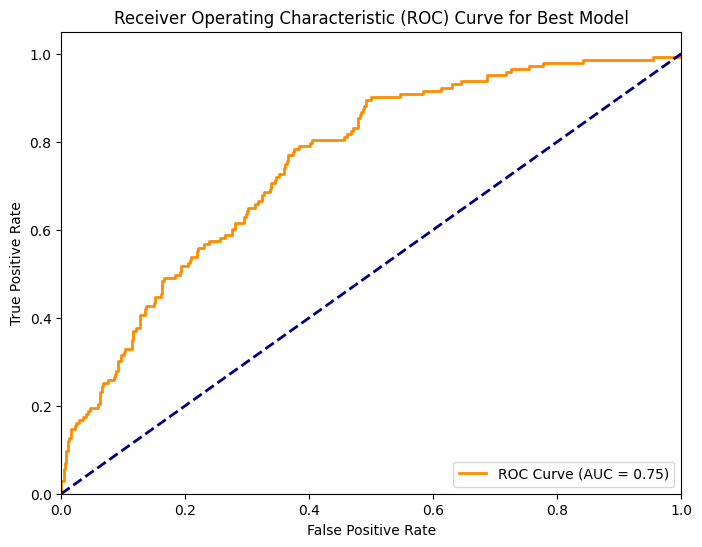

In [406]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create GridSearchCV with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(logreg_model, param_grid, cv=cv, scoring='roc_auc', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_logreg_model.predict(X_test)
print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred_best))

# Print accuracy for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy for Best Model:", accuracy_best)

# Plot ROC Curve for the best model
y_probs_best = best_logreg_model.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, _ = roc_curve(y_test, y_probs_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Model')
plt.legend(loc="lower right")
plt.show()

Top 10 Features:
             Feature  Coefficient  AbsoluteCoefficient
3                age     0.524268             0.524268
4         cigsPerDay     0.302933             0.302933
6       Hypertension    -0.133882             0.133882
2            glucose     0.130500             0.130500
7  mean_art_pressure     0.129791             0.129791
0            totChol     0.115251             0.115251
5          education    -0.077077             0.077077
1                BMI     0.014086             0.014086


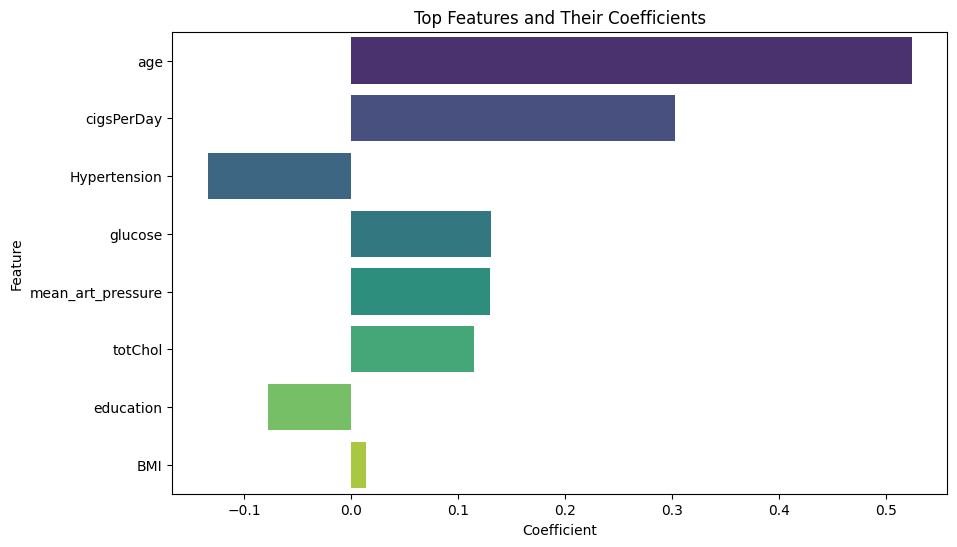

In [407]:
# Get the coefficients of the best model
coefficients = best_logreg_model.coef_[0]

# Create a DataFrame to display the coefficients along with the corresponding feature names
coef_df = pd.DataFrame({'Feature': X_train_resampled_df.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values
coef_df['AbsoluteCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsoluteCoefficient', ascending=False)

# Display the top N features with their coefficients
top_n = 10  # Adjust as needed
print(f"Top {top_n} Features:")
print(coef_df.head(top_n))

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(top_n), palette='viridis')
plt.title('Top Features and Their Coefficients')
plt.show()

In [408]:
#installing scikit-plot
!pip install scikit-plot

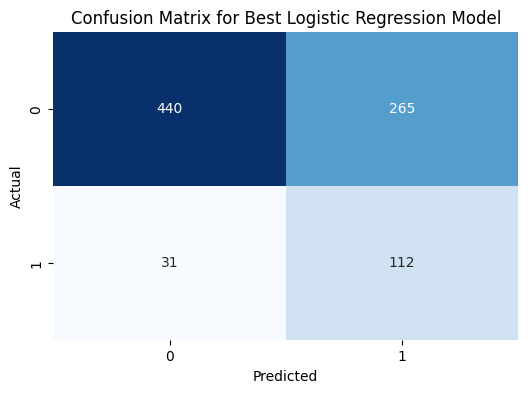

In [409]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix for the best SVM model
cm_logistic = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Best Logistic Regression Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 2 - Decision Tree


Threshold: 0.2


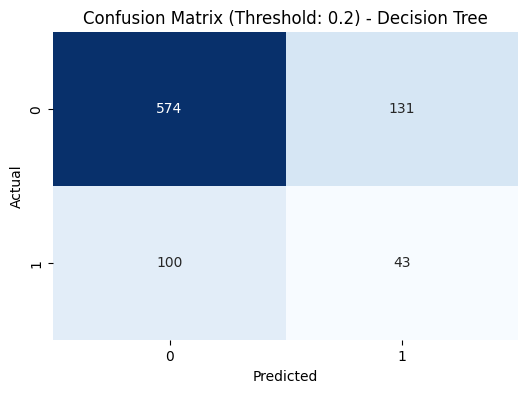

Accuracy: 0.7275943396226415
AUC-ROC Score: 0.5574418489312106
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       705
           1       0.25      0.30      0.27       143

    accuracy                           0.73       848
   macro avg       0.55      0.56      0.55       848
weighted avg       0.75      0.73      0.74       848

---------------------------------------------------------

Threshold: 0.3


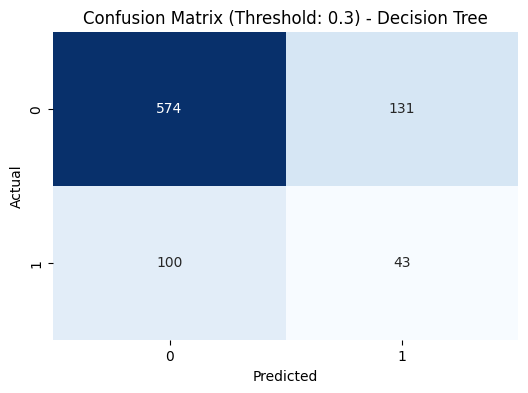

Accuracy: 0.7275943396226415
AUC-ROC Score: 0.5574418489312106
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       705
           1       0.25      0.30      0.27       143

    accuracy                           0.73       848
   macro avg       0.55      0.56      0.55       848
weighted avg       0.75      0.73      0.74       848

---------------------------------------------------------

Threshold: 0.4


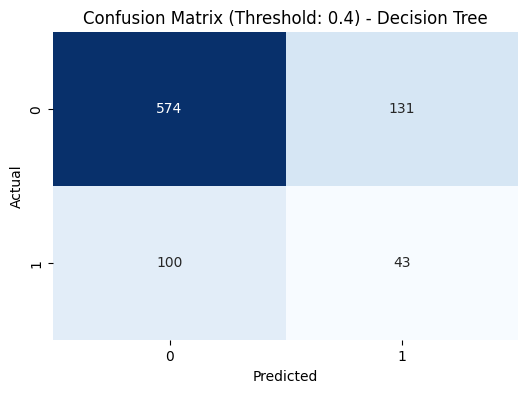

Accuracy: 0.7275943396226415
AUC-ROC Score: 0.5574418489312106
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       705
           1       0.25      0.30      0.27       143

    accuracy                           0.73       848
   macro avg       0.55      0.56      0.55       848
weighted avg       0.75      0.73      0.74       848

---------------------------------------------------------

Threshold: 0.5


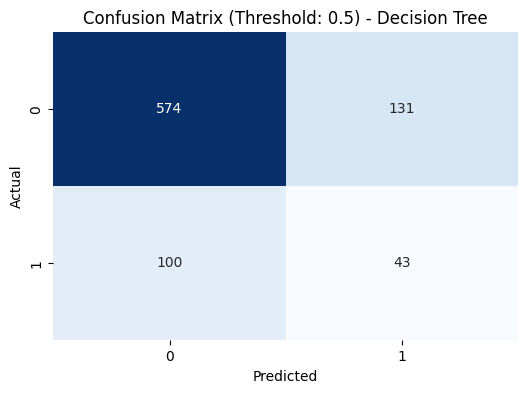

Accuracy: 0.7275943396226415
AUC-ROC Score: 0.5574418489312106
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       705
           1       0.25      0.30      0.27       143

    accuracy                           0.73       848
   macro avg       0.55      0.56      0.55       848
weighted avg       0.75      0.73      0.74       848

---------------------------------------------------------

Threshold: 0.6


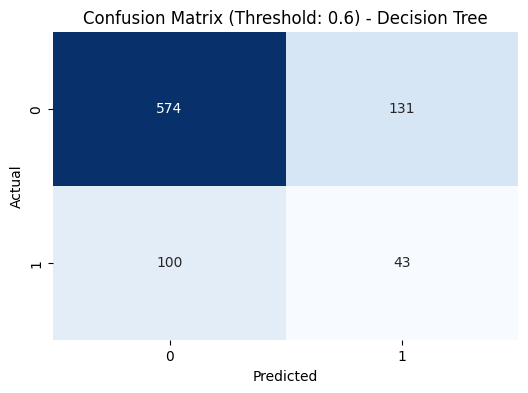

Accuracy: 0.7275943396226415
AUC-ROC Score: 0.5574418489312106
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       705
           1       0.25      0.30      0.27       143

    accuracy                           0.73       848
   macro avg       0.55      0.56      0.55       848
weighted avg       0.75      0.73      0.74       848

---------------------------------------------------------

Threshold: 0.7


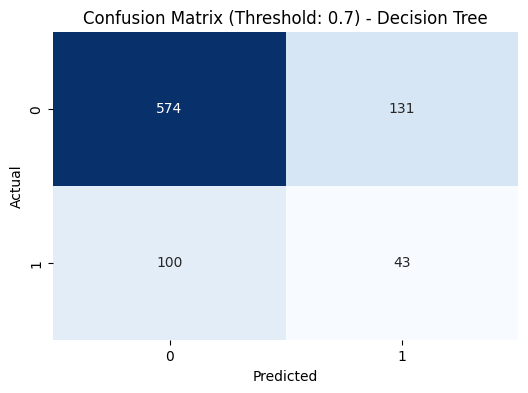

Accuracy: 0.7275943396226415
AUC-ROC Score: 0.5574418489312106
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       705
           1       0.25      0.30      0.27       143

    accuracy                           0.73       848
   macro avg       0.55      0.56      0.55       848
weighted avg       0.75      0.73      0.74       848

---------------------------------------------------------

Threshold: 0.8


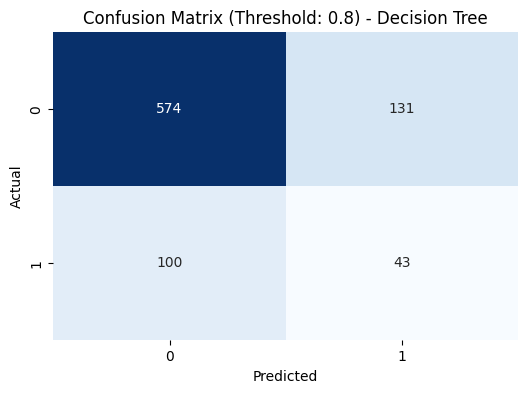

Accuracy: 0.7275943396226415
AUC-ROC Score: 0.5574418489312106
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       705
           1       0.25      0.30      0.27       143

    accuracy                           0.73       848
   macro avg       0.55      0.56      0.55       848
weighted avg       0.75      0.73      0.74       848

---------------------------------------------------------


In [410]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for threshold in thresholds:
    y_pred_threshold_dt = (y_probs_dt >= threshold).astype(int)

    # Get the confusion matrix
    cm_dt = confusion_matrix(y_test, y_pred_threshold_dt)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold}) - Decision Tree")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_dt = accuracy_score(y_test, y_pred_threshold_dt)
    roc_auc_dt = roc_auc_score(y_test, y_probs_dt)

    print("Accuracy:", accuracy_dt)
    print("AUC-ROC Score:", roc_auc_dt)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_dt))
    print('---------------------------------------------------------')

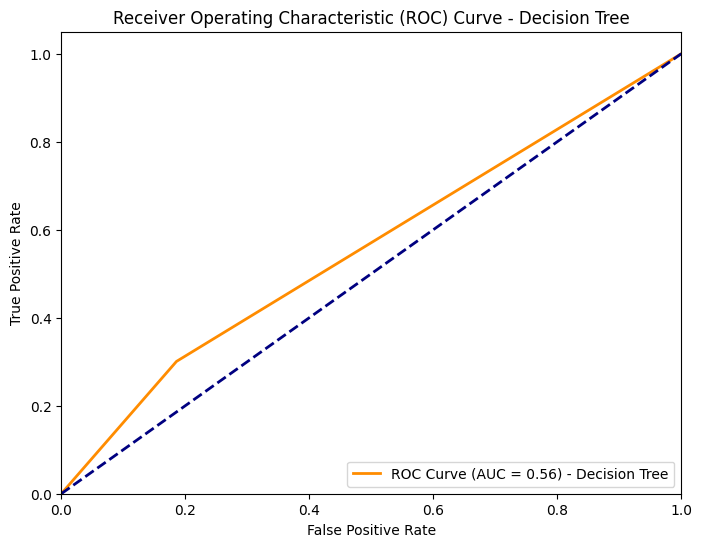

In [411]:
# Plot ROC Curve for the Decision Tree model
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_dt:.2f}) - Decision Tree')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

Best Parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 5}

Classification Report for Best Decision Tree Model:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       705
           1       0.27      0.29      0.28       143

    accuracy                           0.75       848
   macro avg       0.56      0.57      0.56       848
weighted avg       0.76      0.75      0.75       848

Accuracy for Best Decision Tree Model: 0.75


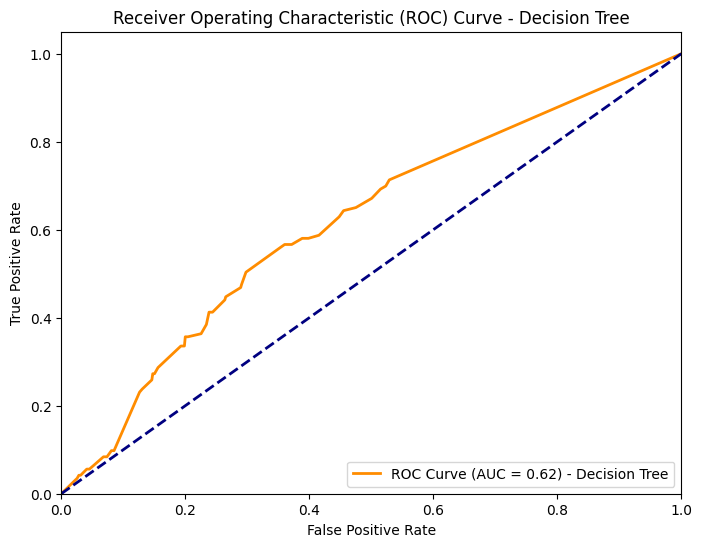

In [412]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the parameter grid to search for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # Adjust these values as needed
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8]
}

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV for Decision Tree with ROC AUC and accuracy scoring
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring={'roc_auc': 'roc_auc', 'accuracy': 'accuracy'}, refit='roc_auc')

# Fit the model to the training data
grid_search_dt.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

# Get the best Decision Tree model
best_dt_model = grid_search_dt.best_estimator_

# Evaluate the best Decision Tree model on the test set
y_pred_best_dt = best_dt_model.predict(X_test)
print("\nClassification Report for Best Decision Tree Model:\n", classification_report(y_test, y_pred_best_dt))

# Print accuracy for the best Decision Tree model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print("Accuracy for Best Decision Tree Model:", accuracy_best_dt)

# Plot ROC Curve for the best Decision Tree model
y_probs_best_dt = best_dt_model.predict_proba(X_test)[:, 1]
fpr_best_dt, tpr_best_dt, _ = roc_curve(y_test, y_probs_best_dt)
roc_auc_best_dt = auc(fpr_best_dt, tpr_best_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_dt, tpr_best_dt, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best_dt:.2f}) - Decision Tree')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

Feature Importances:
             Feature  Importance
3                age    0.343326
1                BMI    0.126219
5          education    0.117363
7  mean_art_pressure    0.105308
0            totChol    0.090618
4         cigsPerDay    0.087731
2            glucose    0.078131
6       Hypertension    0.051302


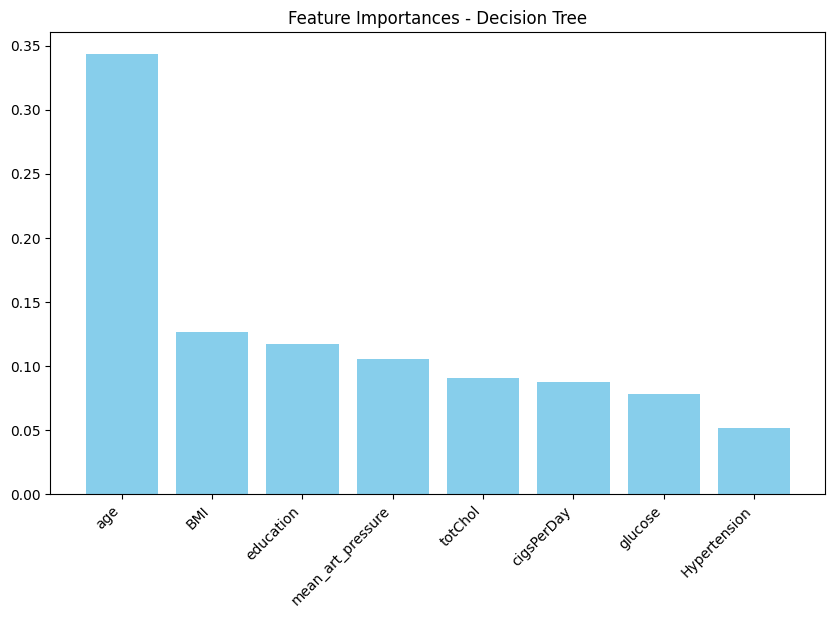

In [413]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation predictions
y_pred_cv_dt = cross_val_predict(dt_model, X_train_resampled_df, y_train_resampled_df, cv=5, method='predict_proba')[:, 1]

# Fit the model to the entire training data
dt_model.fit(X_train_resampled_df, y_train_resampled_df)

# Get the feature importances
feature_importances = dt_model.feature_importances_

# Create a DataFrame to display the feature importances along with the corresponding feature names
importance_df = pd.DataFrame({'Feature': X_train_resampled_df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importances - Decision Tree')
plt.show()

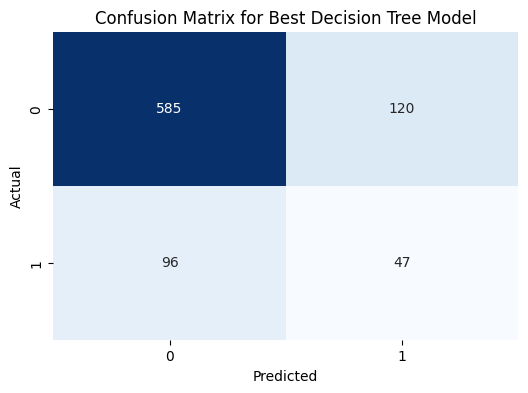

In [243]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix for the best SVM model
cm_dt = confusion_matrix(y_test, y_pred_best_dt)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Best Decision Tree Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

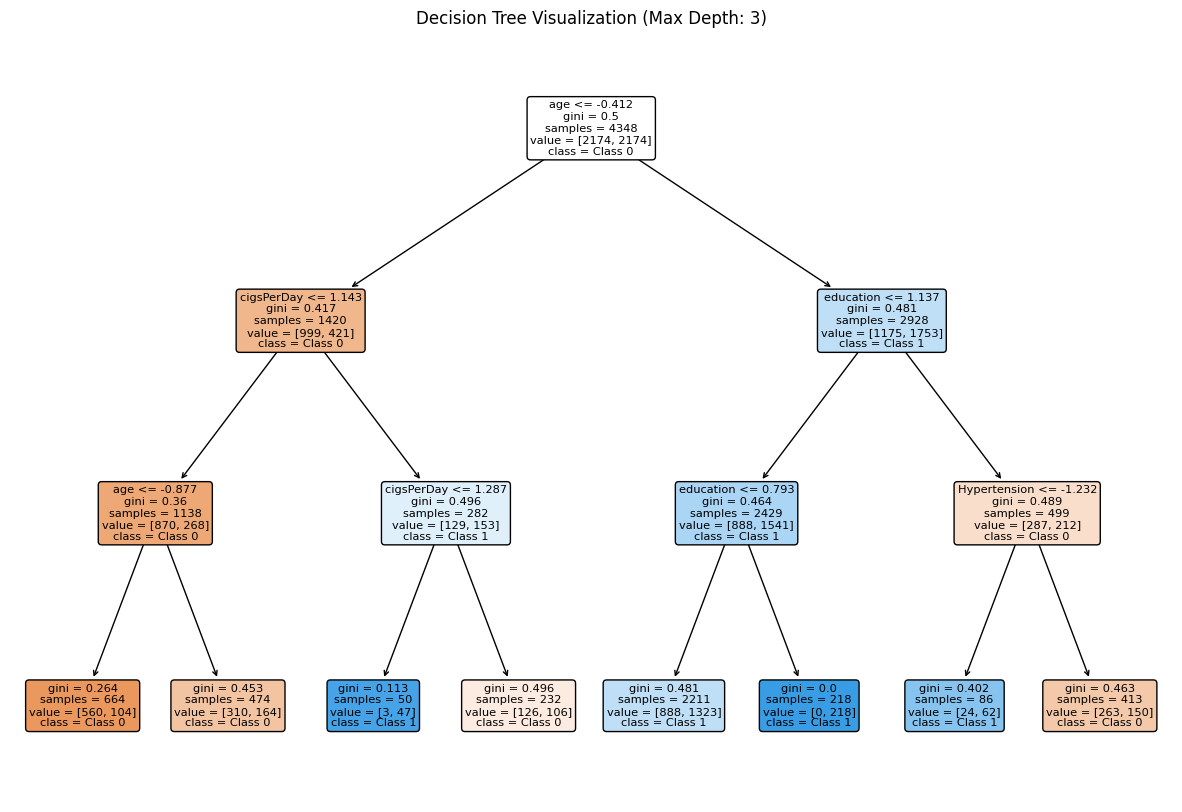

In [414]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Specify the maximum depth for the Decision Tree
max_depth = 3

# Create a Decision Tree model with the specified maximum depth
dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

# Fit the model to the training data
dt_model.fit(X_train_resampled_df, y_train_resampled_df)

# Visualize the Decision Tree with the specified maximum depth
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X_train_resampled_df.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
plt.title(f'Decision Tree Visualization (Max Depth: {max_depth})')
plt.show()

### Model 3 - Random forest Classifier


Threshold: 0.2


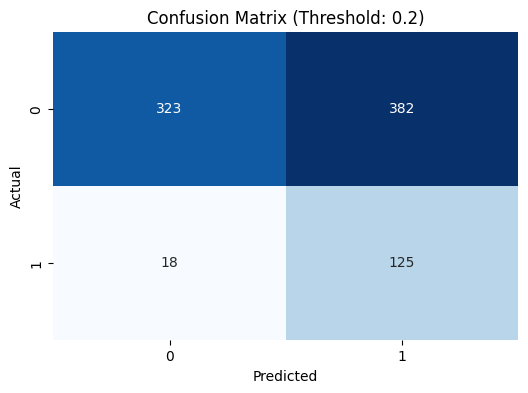

Accuracy: 0.5283018867924528
AUC-ROC Score: 0.7200267817289093
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.46      0.62       705
           1       0.25      0.87      0.38       143

    accuracy                           0.53       848
   macro avg       0.60      0.67      0.50       848
weighted avg       0.83      0.53      0.58       848

---------------------------------------------------------

Threshold: 0.3


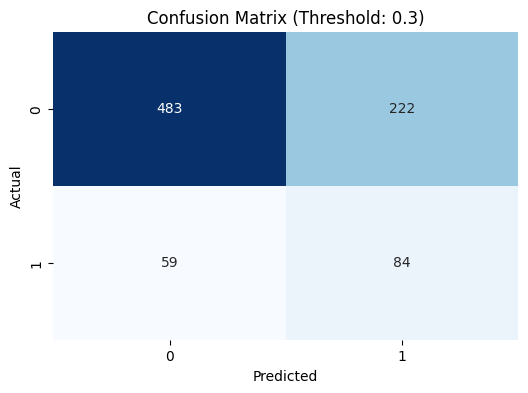

Accuracy: 0.6686320754716981
AUC-ROC Score: 0.7200267817289093
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.69      0.77       705
           1       0.27      0.59      0.37       143

    accuracy                           0.67       848
   macro avg       0.58      0.64      0.57       848
weighted avg       0.79      0.67      0.71       848

---------------------------------------------------------

Threshold: 0.4


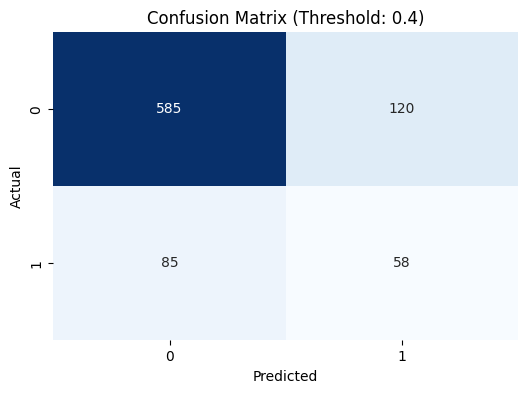

Accuracy: 0.7582547169811321
AUC-ROC Score: 0.7200267817289093
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       705
           1       0.33      0.41      0.36       143

    accuracy                           0.76       848
   macro avg       0.60      0.62      0.61       848
weighted avg       0.78      0.76      0.77       848

---------------------------------------------------------

Threshold: 0.5


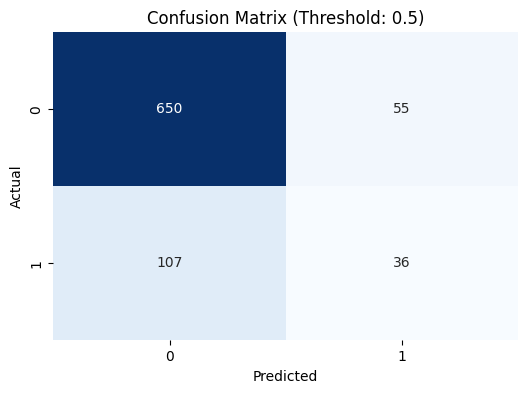

Accuracy: 0.8089622641509434
AUC-ROC Score: 0.7200267817289093
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       705
           1       0.40      0.25      0.31       143

    accuracy                           0.81       848
   macro avg       0.63      0.59      0.60       848
weighted avg       0.78      0.81      0.79       848

---------------------------------------------------------

Threshold: 0.6


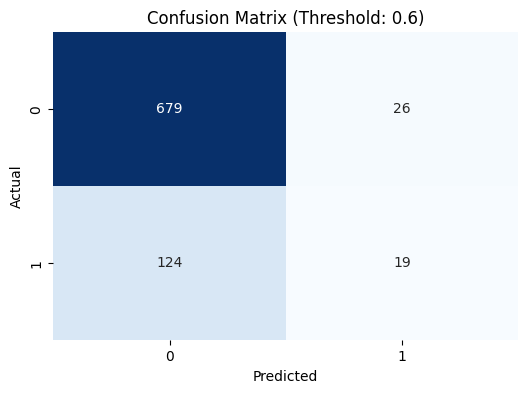

Accuracy: 0.8231132075471698
AUC-ROC Score: 0.7200267817289093
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       705
           1       0.42      0.13      0.20       143

    accuracy                           0.82       848
   macro avg       0.63      0.55      0.55       848
weighted avg       0.77      0.82      0.78       848

---------------------------------------------------------

Threshold: 0.7


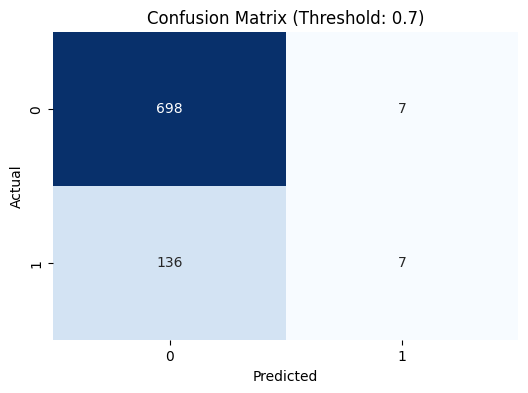

Accuracy: 0.8313679245283019
AUC-ROC Score: 0.7200267817289093
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       705
           1       0.50      0.05      0.09       143

    accuracy                           0.83       848
   macro avg       0.67      0.52      0.50       848
weighted avg       0.78      0.83      0.77       848

---------------------------------------------------------

Threshold: 0.8


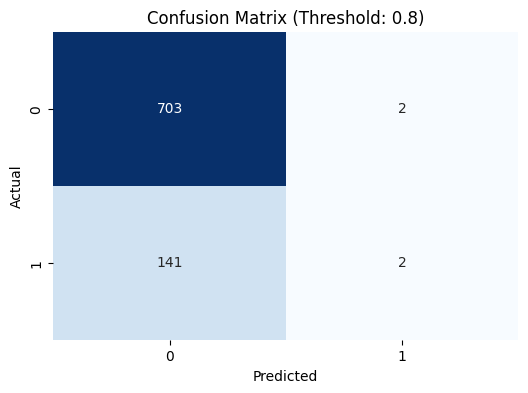

Accuracy: 0.8313679245283019
AUC-ROC Score: 0.7200267817289093
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       705
           1       0.50      0.01      0.03       143

    accuracy                           0.83       848
   macro avg       0.67      0.51      0.47       848
weighted avg       0.78      0.83      0.76       848

---------------------------------------------------------


In [415]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for threshold in thresholds:
    y_pred_threshold_rf = (y_probs_rf >= threshold).astype(int)

    # Get the confusion matrix
    cm_rf = confusion_matrix(y_test, y_pred_threshold_rf)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_rf = accuracy_score(y_test, y_pred_threshold_rf)
    roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

    print("Accuracy:", accuracy_rf)
    print("AUC-ROC Score:", roc_auc_rf)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_rf))
    print('---------------------------------------------------------')

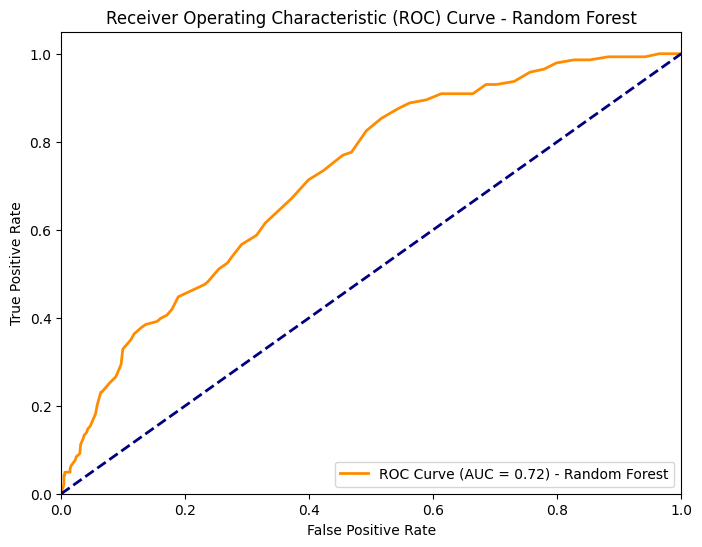

In [416]:
# Plot ROC Curve for the Random Forest model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f}) - Random Forest')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [417]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the parameter grid to search for Random Forest
param_grid_rf = {
    'n_estimators': [125, 150, 175],  # Adjust these values as needed
    'max_depth': [20, 30, 40],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [2, 3, 4]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV for Random Forest with ROC AUC and accuracy scoring
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring={'roc_auc': 'roc_auc', 'accuracy': 'accuracy'}, refit='roc_auc')

# Fit the model to the training data
grid_search_rf.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
print("\nClassification Report for Best Random Forest Model:\n", classification_report(y_test, y_pred_best_rf))

# Print accuracy for the best Random Forest model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Accuracy for Best Random Forest Model:", accuracy_best_rf)

# Plot ROC Curve for the best Random Forest model
y_probs_best_rf = best_rf_model.predict_proba(X_test)[:, 1]
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, y_probs_best_rf)
roc_auc_best_rf = auc(fpr_best_rf, tpr_best_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_rf, tpr_best_rf, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best_rf:.2f}) - Random Forest')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

KeyboardInterrupt: ignored

Feature Importances:
             Feature  Importance
3                age    0.200648
2            glucose    0.132714
7  mean_art_pressure    0.129603
0            totChol    0.123108
1                BMI    0.116781
6       Hypertension    0.108286
4         cigsPerDay    0.100093
5          education    0.088768


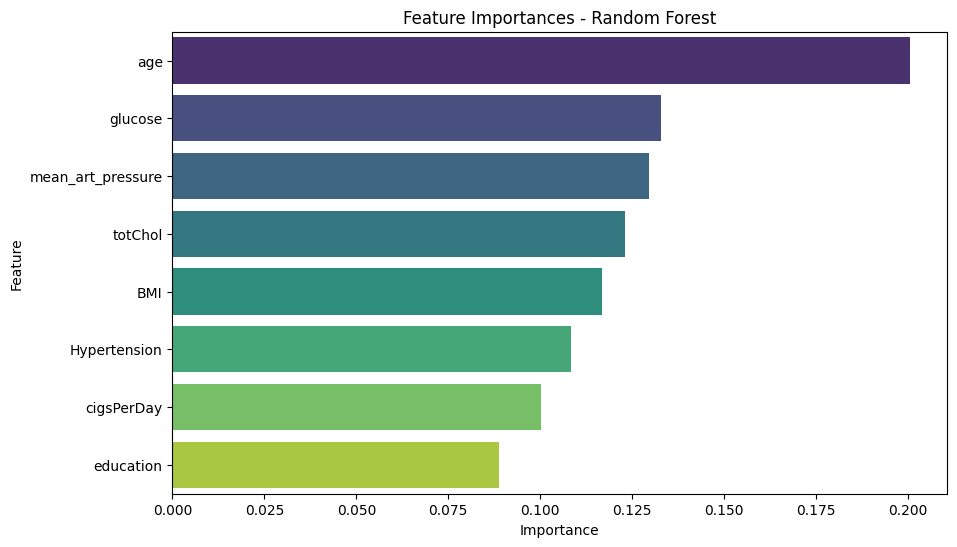

In [248]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Best parameters obtained from the grid search
best_params_rf = {
    'n_estimators': 150,
    'max_depth': 40,
    'min_samples_split': 3,
    'min_samples_leaf': 2
}

# Create a Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)

# Train the model on the entire training data
best_rf_model.fit(X_train_resampled_df, y_train_resampled_df)

# Get the feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display the feature importances along with the corresponding feature names
importance_df = pd.DataFrame({'Feature': X_train_resampled_df.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances - Random Forest')
plt.show()


<Figure size 800x600 with 0 Axes>

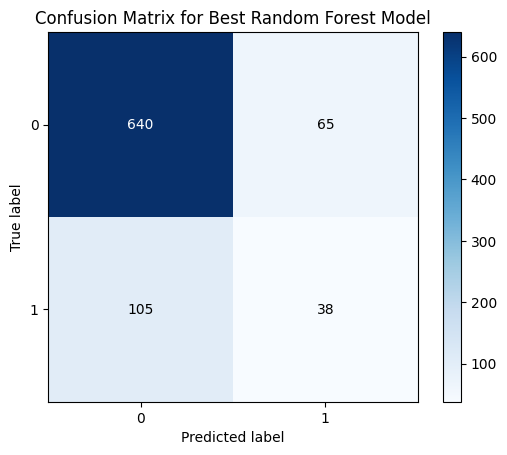

In [249]:
from scikitplot.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot the confusion matrix for the best Random Forest model
plt.figure(figsize=(8, 6))
plot_confusion_matrix(y_test, y_pred_best_rf, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()

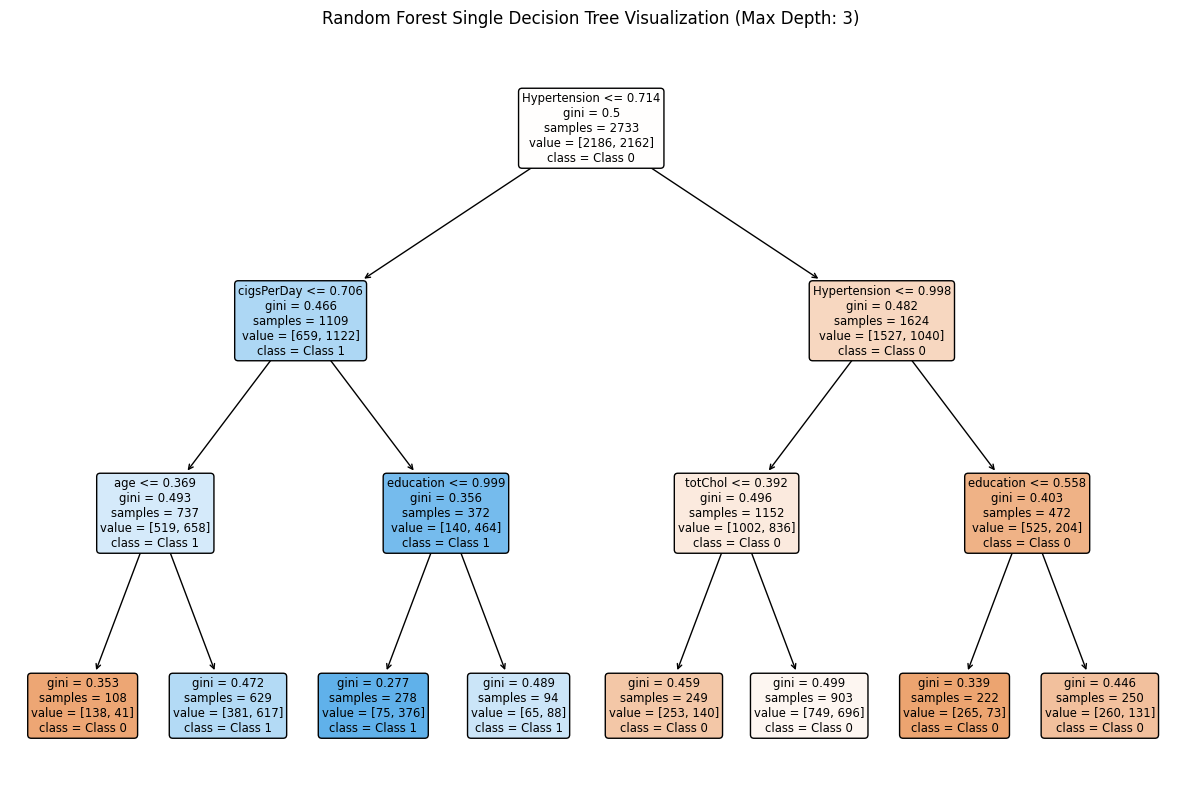

In [250]:
from sklearn.tree import plot_tree

# Create a Random Forest model with a single tree and maximum depth 3
rf_single_tree = RandomForestClassifier(n_estimators=1, max_depth=3, random_state=42)

# Fit the model to the training data
rf_single_tree.fit(X_train_resampled_df, y_train_resampled_df)

# Visualize the single decision tree with maximum depth 3
plt.figure(figsize=(15, 10))
plot_tree(rf_single_tree.estimators_[0], feature_names=X_train_resampled_df.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
plt.title('Random Forest Single Decision Tree Visualization (Max Depth: 3)')
plt.show()

##ENSEMBLE BOOSTING MODELS

### Model 4 - AdaBoost


Threshold: 0.2


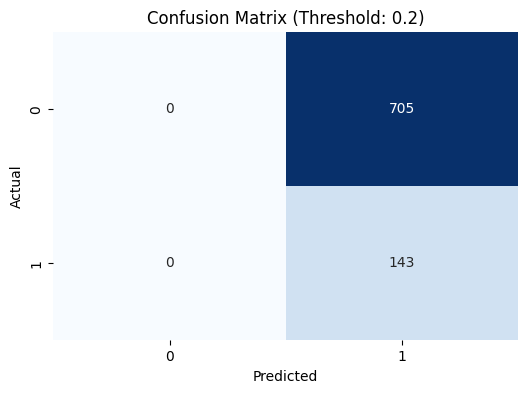

Accuracy: 0.16863207547169812
AUC-ROC Score: 0.7496007538560728
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       705
           1       0.17      1.00      0.29       143

    accuracy                           0.17       848
   macro avg       0.08      0.50      0.14       848
weighted avg       0.03      0.17      0.05       848

---------------------------------------------------------

Threshold: 0.3


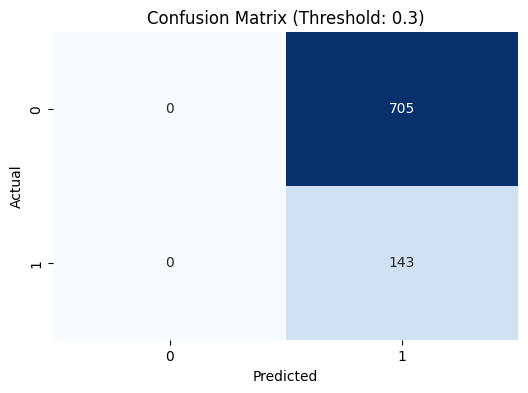

Accuracy: 0.16863207547169812
AUC-ROC Score: 0.7496007538560728
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       705
           1       0.17      1.00      0.29       143

    accuracy                           0.17       848
   macro avg       0.08      0.50      0.14       848
weighted avg       0.03      0.17      0.05       848

---------------------------------------------------------

Threshold: 0.4


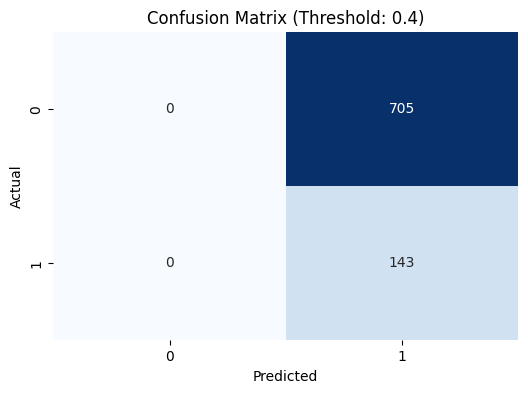

Accuracy: 0.16863207547169812
AUC-ROC Score: 0.7496007538560728
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       705
           1       0.17      1.00      0.29       143

    accuracy                           0.17       848
   macro avg       0.08      0.50      0.14       848
weighted avg       0.03      0.17      0.05       848

---------------------------------------------------------

Threshold: 0.5


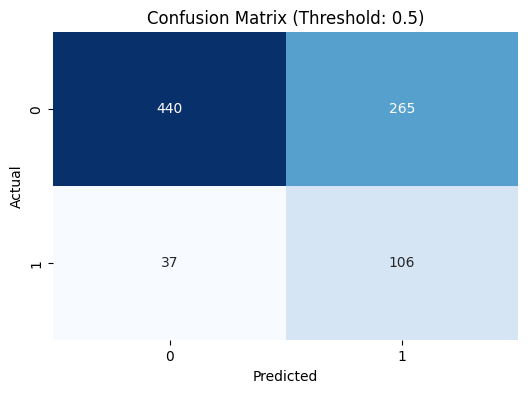

Accuracy: 0.6438679245283019
AUC-ROC Score: 0.7496007538560728
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.62      0.74       705
           1       0.29      0.74      0.41       143

    accuracy                           0.64       848
   macro avg       0.60      0.68      0.58       848
weighted avg       0.82      0.64      0.69       848

---------------------------------------------------------

Threshold: 0.6


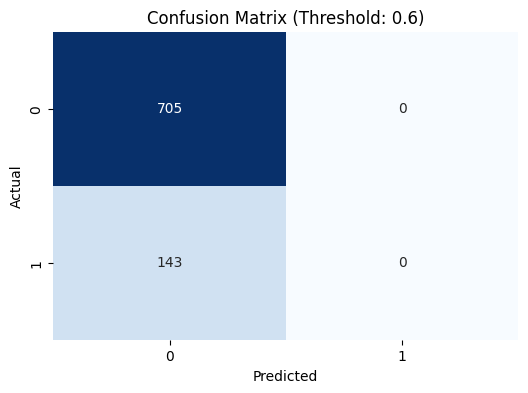

Accuracy: 0.8313679245283019
AUC-ROC Score: 0.7496007538560728
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       705
           1       0.00      0.00      0.00       143

    accuracy                           0.83       848
   macro avg       0.42      0.50      0.45       848
weighted avg       0.69      0.83      0.75       848

---------------------------------------------------------

Threshold: 0.7


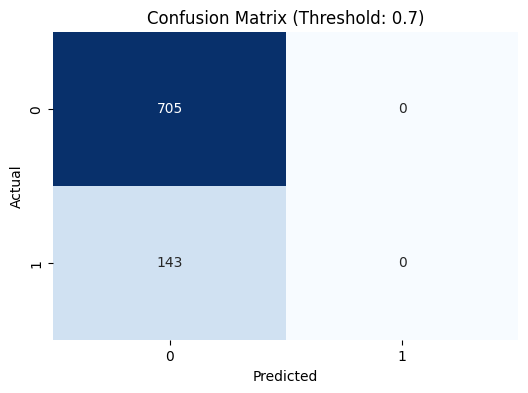

Accuracy: 0.8313679245283019
AUC-ROC Score: 0.7496007538560728
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       705
           1       0.00      0.00      0.00       143

    accuracy                           0.83       848
   macro avg       0.42      0.50      0.45       848
weighted avg       0.69      0.83      0.75       848

---------------------------------------------------------

Threshold: 0.8


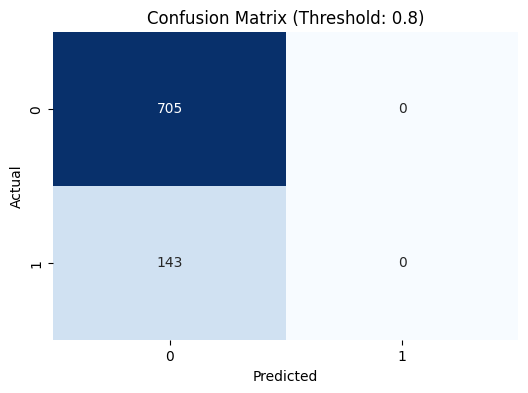

Accuracy: 0.8313679245283019
AUC-ROC Score: 0.7496007538560728
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       705
           1       0.00      0.00      0.00       143

    accuracy                           0.83       848
   macro avg       0.42      0.50      0.45       848
weighted avg       0.69      0.83      0.75       848

---------------------------------------------------------


In [418]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Logistic Regression model with the best parameters
best_logreg_model = LogisticRegression(C=0.1, penalty='l2', random_state=42)

# Create an AdaBoostClassifier using the Logistic Regression model as the base model
adaboost_model = AdaBoostClassifier(base_estimator=best_logreg_model, n_estimators=50, random_state=42)

# Train the AdaBoost model
adaboost_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_adaboost = adaboost_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_adaboost = (y_probs_adaboost >= threshold).astype(int)

    # Get the confusion matrix
    cm_adaboost = confusion_matrix(y_test, y_pred_threshold_adaboost)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_adaboost = accuracy_score(y_test, y_pred_threshold_adaboost)
    roc_auc_adaboost = roc_auc_score(y_test, y_probs_adaboost)

    print("Accuracy:", accuracy_adaboost)
    print("AUC-ROC Score:", roc_auc_adaboost)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_adaboost))
    print('---------------------------------------------------------')


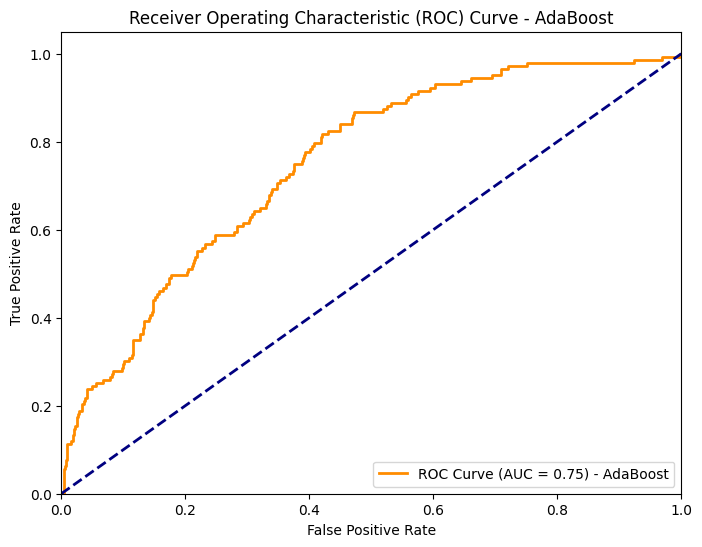

In [419]:
# Plot ROC Curve for the AdaBoost model
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_probs_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_adaboost:.2f}) - AdaBoost')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()

Best Parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 150}
Accuracy for Best AdaBoost Model: 0.6509433962264151
AUC-ROC Score for Best AdaBoost Model: 0.7528542379606209

Classification Report for Best AdaBoost Model:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75       705
           1       0.30      0.78      0.43       143

    accuracy                           0.65       848
   macro avg       0.61      0.70      0.59       848
weighted avg       0.83      0.65      0.69       848



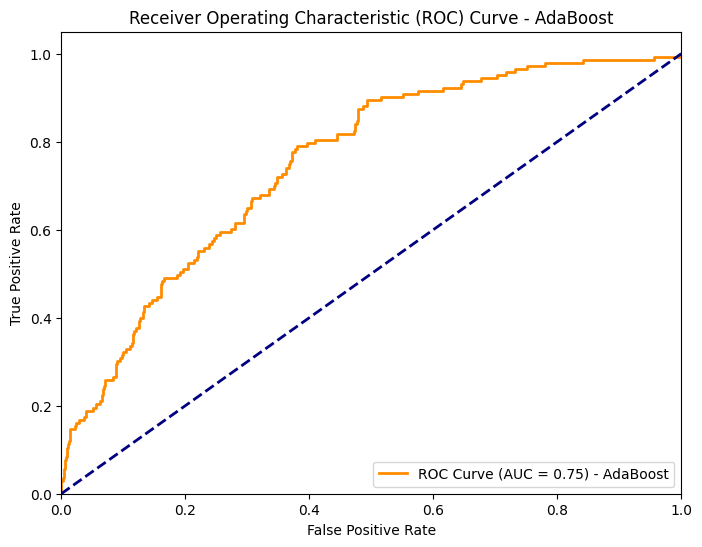

In [420]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 150],  # Adjust these values as needed
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create an AdaBoostClassifier with the base Logistic Regression model
adaboost_model = AdaBoostClassifier(base_estimator=best_logreg_model, random_state=42)

# Create GridSearchCV for AdaBoost
grid_search_adaboost = GridSearchCV(adaboost_model, param_grid_adaboost, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_adaboost.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for AdaBoost:", grid_search_adaboost.best_params_)

# Get the best AdaBoost model
best_adaboost_model = grid_search_adaboost.best_estimator_

# Evaluate the best AdaBoost model on the test set using the specified threshold (0.5)
y_probs_best_adaboost = best_adaboost_model.predict_proba(X_test)[:, 1]
y_pred_best_adaboost = (y_probs_best_adaboost >= 0.5).astype(int)

# Print accuracy for the best AdaBoost model
accuracy_best_adaboost = accuracy_score(y_test, y_pred_best_adaboost)
print("Accuracy for Best AdaBoost Model:", accuracy_best_adaboost)

# Print AUC-ROC Score for the best AdaBoost model
roc_auc_best_adaboost = roc_auc_score(y_test, y_probs_best_adaboost)
print("AUC-ROC Score for Best AdaBoost Model:", roc_auc_best_adaboost)

# Print Classification Report for the best AdaBoost model
print("\nClassification Report for Best AdaBoost Model:\n", classification_report(y_test, y_pred_best_adaboost))

# Plot ROC Curve for the best AdaBoost model
fpr_best_adaboost, tpr_best_adaboost, _ = roc_curve(y_test, y_probs_best_adaboost)
roc_auc_best_adaboost = auc(fpr_best_adaboost, tpr_best_adaboost)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_adaboost, tpr_best_adaboost, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best_adaboost:.2f}) - AdaBoost')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()

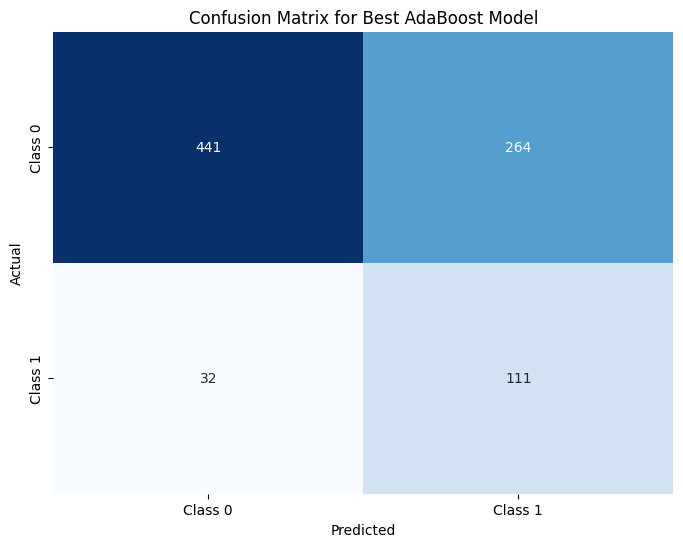

In [421]:
from scikitplot.metrics import plot_confusion_matrix

# Get the confusion matrix for the best AdaBoost model
cm_adaboost = confusion_matrix(y_test, y_pred_best_adaboost)

# Plot the confusion matrix as a heatmap with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Best AdaBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.show()


### Model 5 - Gradient Boosting


Threshold: 0.2


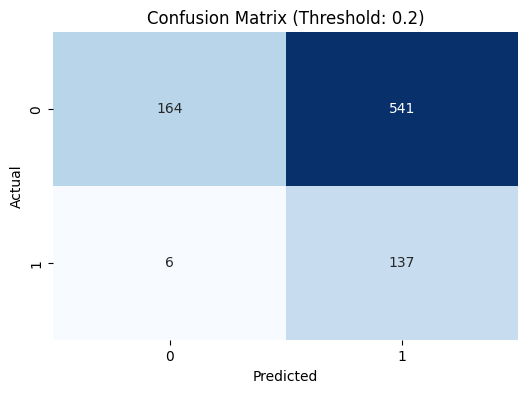

Accuracy: 0.35495283018867924
AUC-ROC Score: 0.7268313247036652
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.23      0.37       705
           1       0.20      0.96      0.33       143

    accuracy                           0.35       848
   macro avg       0.58      0.60      0.35       848
weighted avg       0.84      0.35      0.37       848

---------------------------------------------------------

Threshold: 0.3


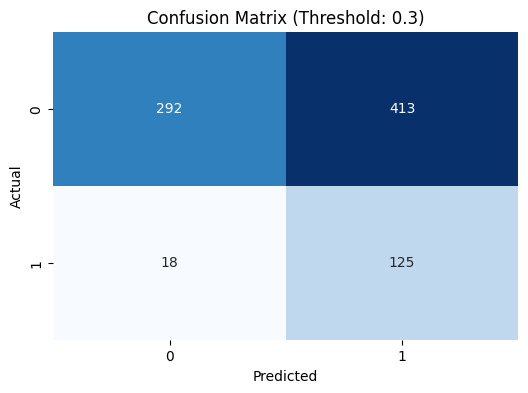

Accuracy: 0.49174528301886794
AUC-ROC Score: 0.7268313247036652
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.41      0.58       705
           1       0.23      0.87      0.37       143

    accuracy                           0.49       848
   macro avg       0.59      0.64      0.47       848
weighted avg       0.82      0.49      0.54       848

---------------------------------------------------------

Threshold: 0.4


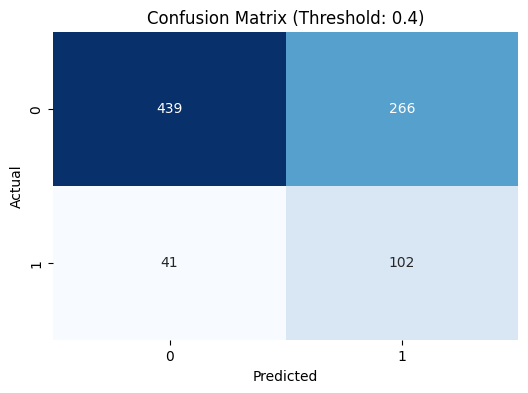

Accuracy: 0.6379716981132075
AUC-ROC Score: 0.7268313247036652
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.62      0.74       705
           1       0.28      0.71      0.40       143

    accuracy                           0.64       848
   macro avg       0.60      0.67      0.57       848
weighted avg       0.81      0.64      0.68       848

---------------------------------------------------------

Threshold: 0.5


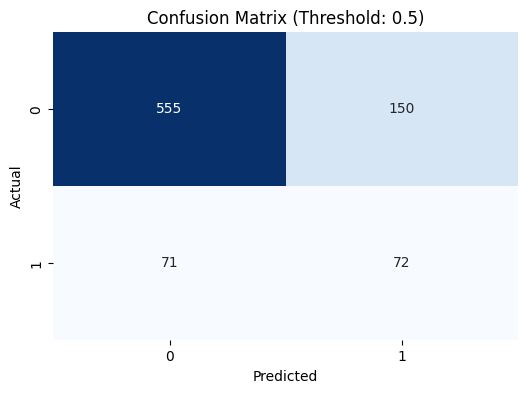

Accuracy: 0.7393867924528302
AUC-ROC Score: 0.7268313247036652
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.83       705
           1       0.32      0.50      0.39       143

    accuracy                           0.74       848
   macro avg       0.61      0.65      0.61       848
weighted avg       0.79      0.74      0.76       848

---------------------------------------------------------

Threshold: 0.6


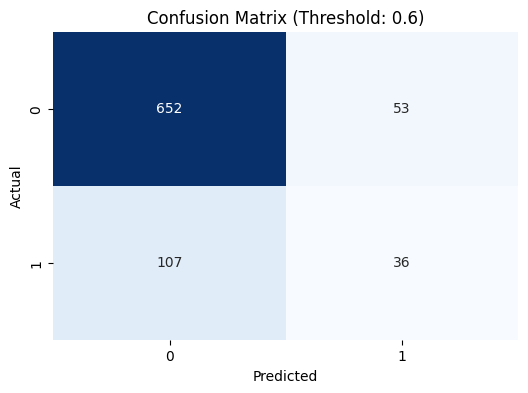

Accuracy: 0.8113207547169812
AUC-ROC Score: 0.7268313247036652
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       705
           1       0.40      0.25      0.31       143

    accuracy                           0.81       848
   macro avg       0.63      0.59      0.60       848
weighted avg       0.78      0.81      0.79       848

---------------------------------------------------------

Threshold: 0.7


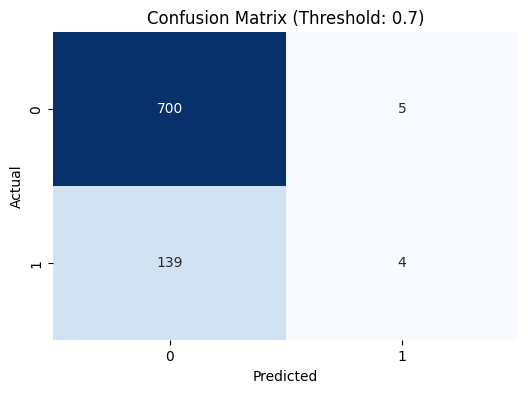

Accuracy: 0.8301886792452831
AUC-ROC Score: 0.7268313247036652
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.91       705
           1       0.44      0.03      0.05       143

    accuracy                           0.83       848
   macro avg       0.64      0.51      0.48       848
weighted avg       0.77      0.83      0.76       848

---------------------------------------------------------

Threshold: 0.8


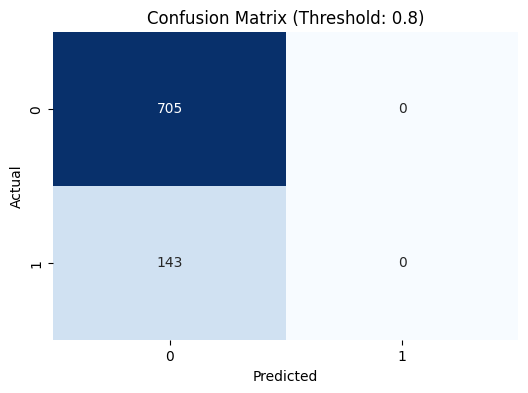

Accuracy: 0.8313679245283019
AUC-ROC Score: 0.7268313247036652
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       705
           1       0.00      0.00      0.00       143

    accuracy                           0.83       848
   macro avg       0.42      0.50      0.45       848
weighted avg       0.69      0.83      0.75       848

---------------------------------------------------------


In [422]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


# Create a GradientBoostingClassifier using the Logistic Regression model as the base model
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_gb = gb_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_gb = (y_probs_gb >= threshold).astype(int)

    # Get the confusion matrix
    cm_gb = confusion_matrix(y_test, y_pred_threshold_gb)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_gb = accuracy_score(y_test, y_pred_threshold_gb)
    roc_auc_gb = roc_auc_score(y_test, y_probs_gb)

    print("Accuracy:", accuracy_gb)
    print("AUC-ROC Score:", roc_auc_gb)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_gb))
    print('---------------------------------------------------------')

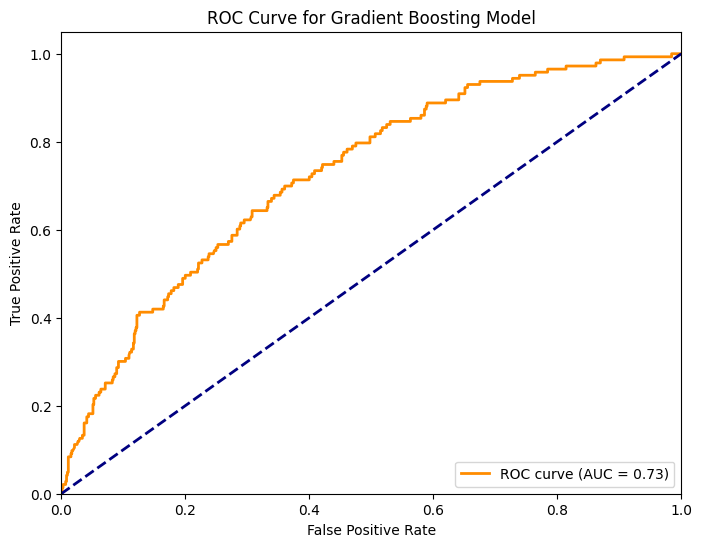

In [423]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_probs_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Model')
plt.legend(loc='lower right')
plt.show()


Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Accuracy for Best Gradient Boosting Model: 0.8077830188679245
AUC-ROC Score for Best Gradient Boosting Model: 0.6745523979566532

Classification Report for Best Gradient Boosting Model:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       705
           1       0.37      0.20      0.26       143

    accuracy                           0.81       848
   macro avg       0.61      0.56      0.57       848
weighted avg       0.77      0.81      0.78       848



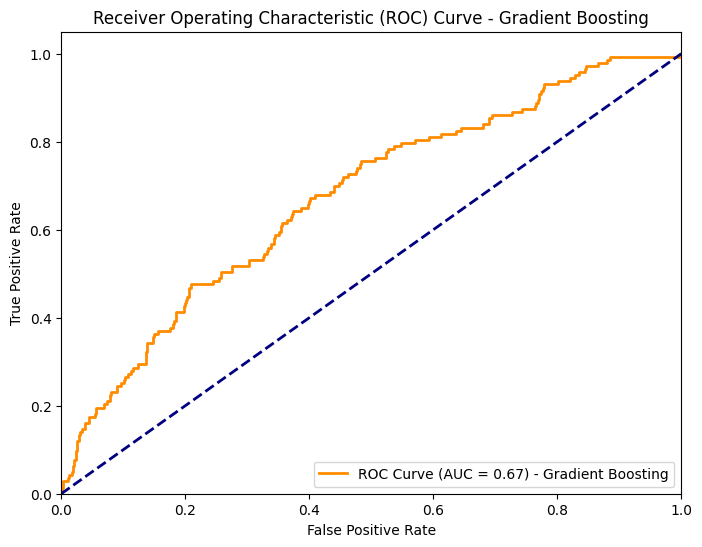

In [424]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid to search
param_grid_gb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_gb.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)

# Get the best Gradient Boosting model
best_gb_model = grid_search_gb.best_estimator_

# Evaluate the best Gradient Boosting model on the test set
y_probs_best_gb = best_gb_model.predict_proba(X_test)[:, 1]
y_pred_best_gb = (y_probs_best_gb >= 0.5).astype(int)

# Print accuracy for the best Gradient Boosting model
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
print("Accuracy for Best Gradient Boosting Model:", accuracy_best_gb)

# Print AUC-ROC Score for the best Gradient Boosting model
roc_auc_best_gb = roc_auc_score(y_test, y_probs_best_gb)
print("AUC-ROC Score for Best Gradient Boosting Model:", roc_auc_best_gb)

# Print Classification Report for the best Gradient Boosting model
print("\nClassification Report for Best Gradient Boosting Model:\n", classification_report(y_test, y_pred_best_gb))

# Plot ROC Curve for the best Gradient Boosting model
fpr_best_gb, tpr_best_gb, _ = roc_curve(y_test, y_probs_best_gb)
roc_auc_best_gb = auc(fpr_best_gb, tpr_best_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_gb, tpr_best_gb, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best_gb:.2f}) - Gradient Boosting')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


Feature Importances for Gradient Boosting:
             Feature  Importance
3                age    0.350570
4         cigsPerDay    0.123034
5          education    0.104927
2            glucose    0.102157
6       Hypertension    0.086190
1                BMI    0.080392
0            totChol    0.078496
7  mean_art_pressure    0.074235


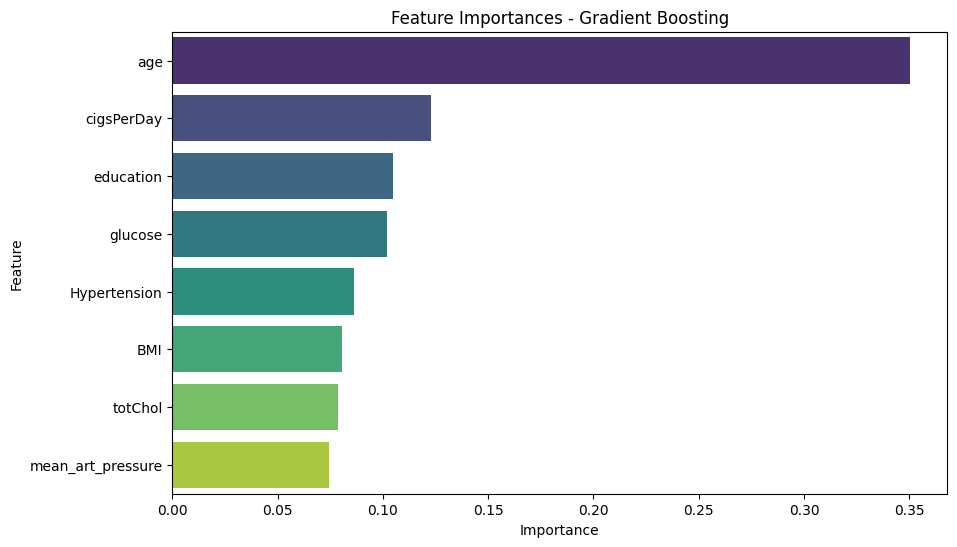

In [425]:
# Assuming best_gb_model is the best Gradient Boosting model obtained

# Get feature importances
feature_importances_gb = best_gb_model.feature_importances_

# Create a DataFrame to display the feature importances along with the corresponding feature names
importance_df_gb = pd.DataFrame({'Feature': X_train_resampled_df.columns, 'Importance': feature_importances_gb})

# Sort the DataFrame by importance values
importance_df_gb = importance_df_gb.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances for Gradient Boosting:")
print(importance_df_gb)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb, palette='viridis')
plt.title('Feature Importances - Gradient Boosting')
plt.show()


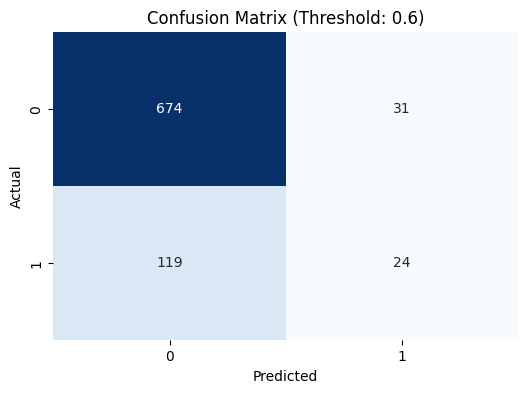

In [426]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs_gb = best_gb_model.predict_proba(X_test)[:, 1]

# Choose a threshold (you can adjust this based on your needs)
threshold = 0.6

# Convert probabilities to binary predictions based on the chosen threshold
y_pred_threshold_gb = (y_probs_gb >= threshold).astype(int)

# Get the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_threshold_gb)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix (Threshold: {threshold})")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Model 6 - XG Boosting


Threshold: 0.2


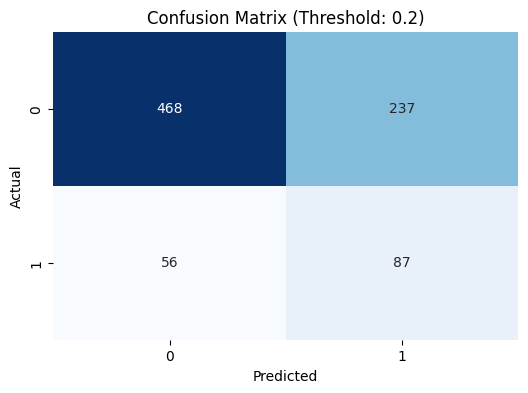

Accuracy: 0.6544811320754716
AUC-ROC Score: 0.6991023161235927
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76       705
           1       0.27      0.61      0.37       143

    accuracy                           0.65       848
   macro avg       0.58      0.64      0.57       848
weighted avg       0.79      0.65      0.70       848

---------------------------------------------------------

Threshold: 0.3


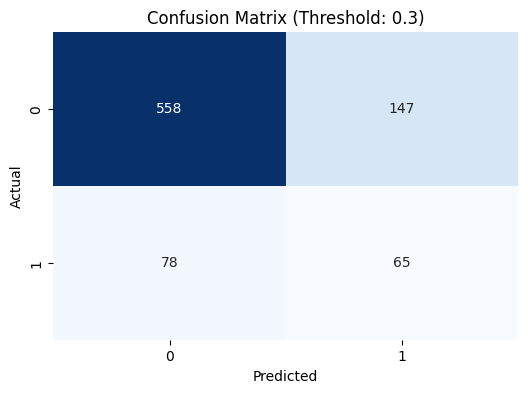

Accuracy: 0.7346698113207547
AUC-ROC Score: 0.6991023161235927
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       705
           1       0.31      0.45      0.37       143

    accuracy                           0.73       848
   macro avg       0.59      0.62      0.60       848
weighted avg       0.78      0.73      0.75       848

---------------------------------------------------------

Threshold: 0.4


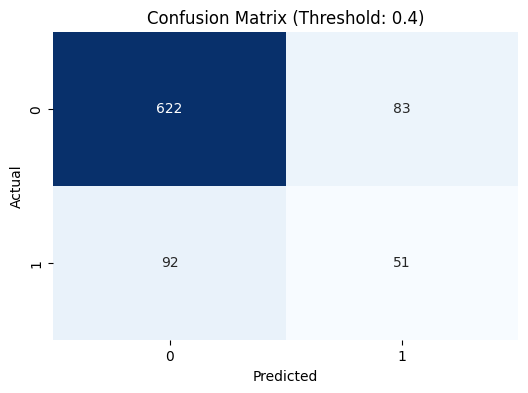

Accuracy: 0.7936320754716981
AUC-ROC Score: 0.6991023161235927
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       705
           1       0.38      0.36      0.37       143

    accuracy                           0.79       848
   macro avg       0.63      0.62      0.62       848
weighted avg       0.79      0.79      0.79       848

---------------------------------------------------------

Threshold: 0.5


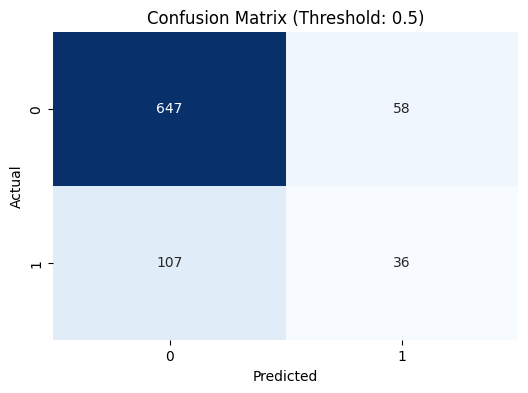

Accuracy: 0.8054245283018868
AUC-ROC Score: 0.6991023161235927
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       705
           1       0.38      0.25      0.30       143

    accuracy                           0.81       848
   macro avg       0.62      0.58      0.60       848
weighted avg       0.78      0.81      0.79       848

---------------------------------------------------------

Threshold: 0.6


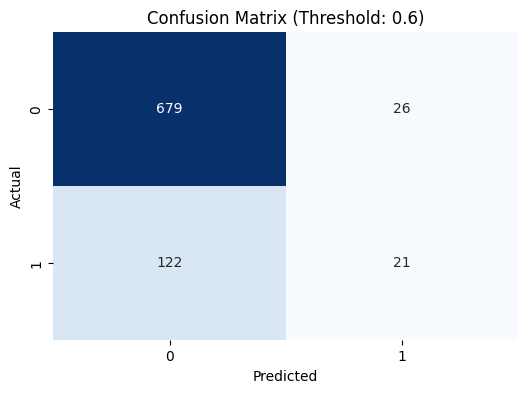

Accuracy: 0.8254716981132075
AUC-ROC Score: 0.6991023161235927
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       705
           1       0.45      0.15      0.22       143

    accuracy                           0.83       848
   macro avg       0.65      0.55      0.56       848
weighted avg       0.78      0.83      0.79       848

---------------------------------------------------------

Threshold: 0.7


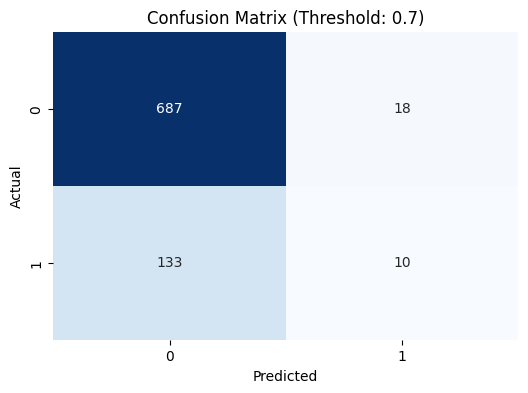

Accuracy: 0.8219339622641509
AUC-ROC Score: 0.6991023161235927
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       705
           1       0.36      0.07      0.12       143

    accuracy                           0.82       848
   macro avg       0.60      0.52      0.51       848
weighted avg       0.76      0.82      0.77       848

---------------------------------------------------------

Threshold: 0.8


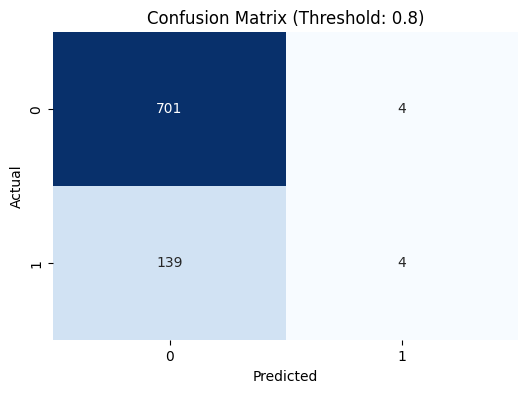

Accuracy: 0.8313679245283019
AUC-ROC Score: 0.6991023161235927
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.91       705
           1       0.50      0.03      0.05       143

    accuracy                           0.83       848
   macro avg       0.67      0.51      0.48       848
weighted avg       0.78      0.83      0.76       848

---------------------------------------------------------


In [427]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=50, random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_xgb = (y_probs_xgb >= threshold).astype(int)

    # Get the confusion matrix
    cm_xgb = confusion_matrix(y_test, y_pred_threshold_xgb)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_xgb = accuracy_score(y_test, y_pred_threshold_xgb)
    roc_auc_xgb = roc_auc_score(y_test, y_probs_xgb)

    print("Accuracy:", accuracy_xgb)
    print("AUC-ROC Score:", roc_auc_xgb)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_xgb))
    print('---------------------------------------------------------')

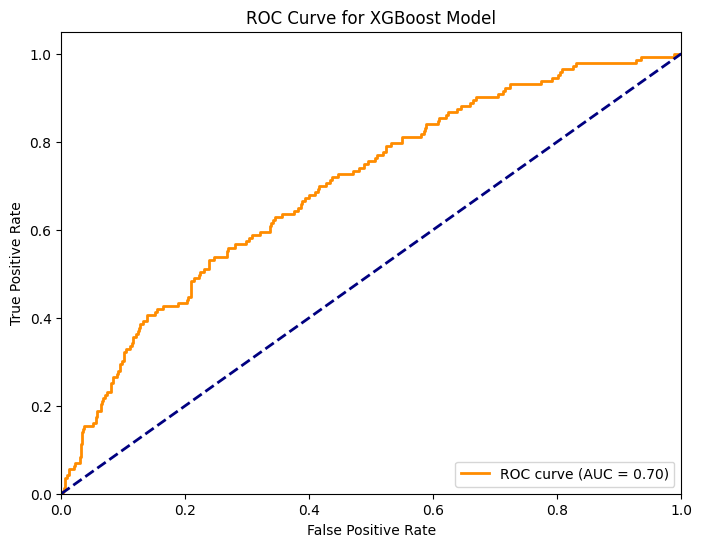

In [428]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot the ROC curve for the XGBoost model
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.show()

Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
Accuracy for Best XGBoost Model: 0.8042452830188679
AUC-ROC Score for Best XGBoost Model: 0.6752566582353816

Classification Report for Best XGBoost Model:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       705
           1       0.35      0.20      0.25       143

    accuracy                           0.80       848
   macro avg       0.60      0.56      0.57       848
weighted avg       0.77      0.80      0.78       848



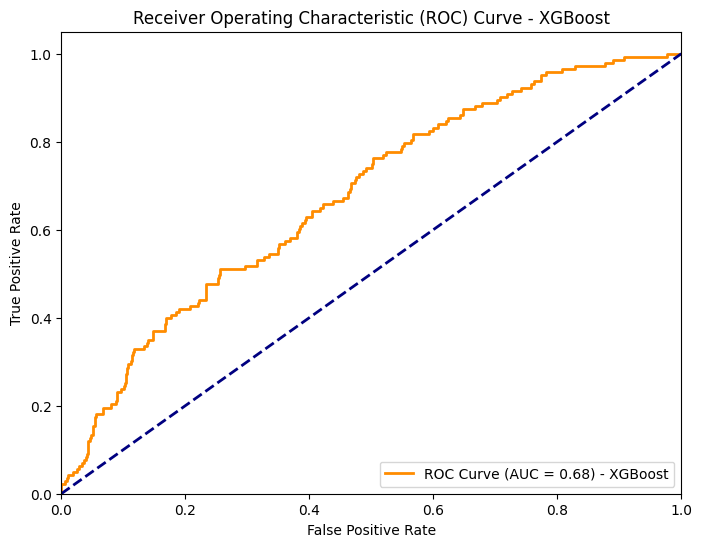

In [429]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid to search
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Create GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_xgb.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# Get the best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the best XGBoost model on the test set
y_probs_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_best_xgb = (y_probs_best_xgb >= 0.5).astype(int)

# Print accuracy for the best XGBoost model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Accuracy for Best XGBoost Model:", accuracy_best_xgb)

# Print AUC-ROC Score for the best XGBoost model
roc_auc_best_xgb = roc_auc_score(y_test, y_probs_best_xgb)
print("AUC-ROC Score for Best XGBoost Model:", roc_auc_best_xgb)

# Print Classification Report for the best XGBoost model
print("\nClassification Report for Best XGBoost Model:\n", classification_report(y_test, y_pred_best_xgb))

# Plot ROC Curve for the best XGBoost model
fpr_best_xgb, tpr_best_xgb, _ = roc_curve(y_test, y_probs_best_xgb)
roc_auc_best_xgb = auc(fpr_best_xgb, tpr_best_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_xgb, tpr_best_xgb, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best_xgb:.2f}) - XGBoost')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

Feature Importances for XGBoost:
             Feature  Importance
6       Hypertension    0.221719
5          education    0.209589
4         cigsPerDay    0.168342
3                age    0.151964
2            glucose    0.076677
0            totChol    0.060972
1                BMI    0.057687
7  mean_art_pressure    0.053049


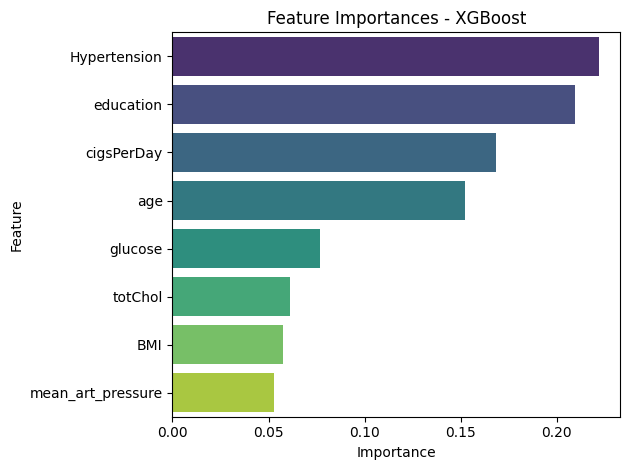

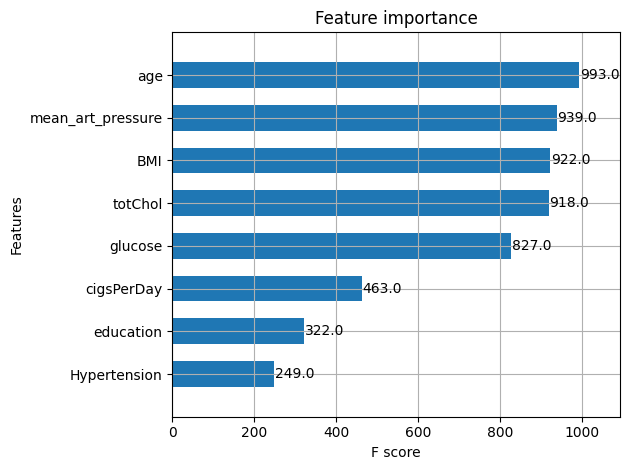

In [431]:
from xgboost import plot_importance

# Assuming best_xgb_model is the best XGBoost model obtained

# Get feature importances
feature_importances_xgb = best_xgb_model.feature_importances_

# Create a DataFrame to display the feature importances along with the corresponding feature names
importance_df_xgb = pd.DataFrame({'Feature': X_train_resampled_df.columns, 'Importance': feature_importances_xgb})

# Sort the DataFrame by importance values
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances for XGBoost:")
print(importance_df_xgb)

# Plot the feature importances
#plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb, palette='viridis')
plt.title('Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

# Alternatively, you can use XGBoost's built-in plot_importance function
plot_importance(best_xgb_model, importance_type='weight', max_num_features=10, height=0.6)
plt.tight_layout()
plt.show()


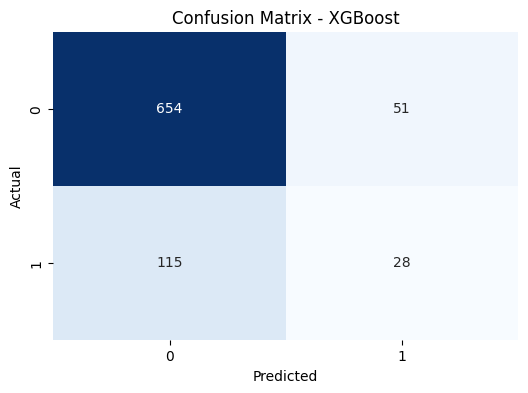

In [432]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_best_xgb is the predicted labels for the test set

# Get the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## NON LINEAR MODELS

### Model 7 - KNN Classifier


Threshold: 0.2


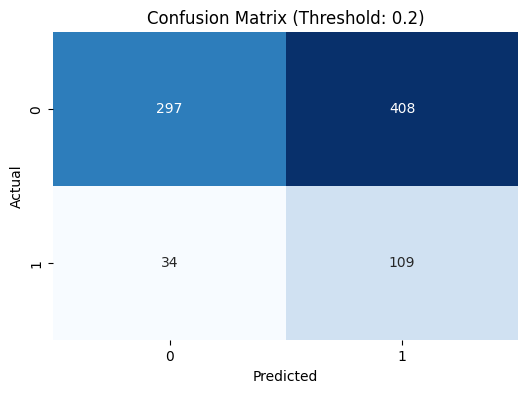

Accuracy: 0.47877358490566035
AUC-ROC Score: 0.6162426226256013
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57       705
           1       0.21      0.76      0.33       143

    accuracy                           0.48       848
   macro avg       0.55      0.59      0.45       848
weighted avg       0.78      0.48      0.53       848

---------------------------------------------------------

Threshold: 0.3


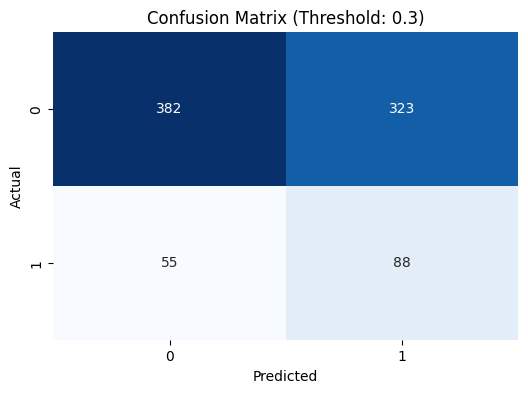

Accuracy: 0.5542452830188679
AUC-ROC Score: 0.6162426226256013
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.54      0.67       705
           1       0.21      0.62      0.32       143

    accuracy                           0.55       848
   macro avg       0.54      0.58      0.49       848
weighted avg       0.76      0.55      0.61       848

---------------------------------------------------------

Threshold: 0.4


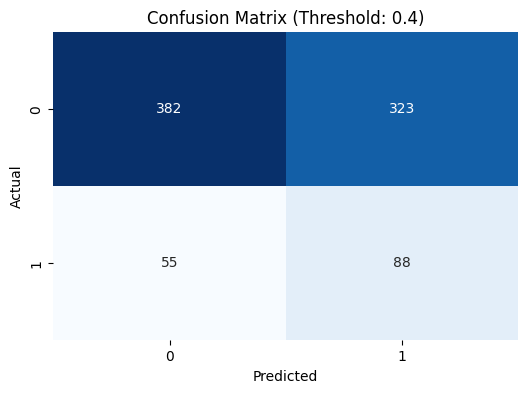

Accuracy: 0.5542452830188679
AUC-ROC Score: 0.6162426226256013
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.54      0.67       705
           1       0.21      0.62      0.32       143

    accuracy                           0.55       848
   macro avg       0.54      0.58      0.49       848
weighted avg       0.76      0.55      0.61       848

---------------------------------------------------------

Threshold: 0.5


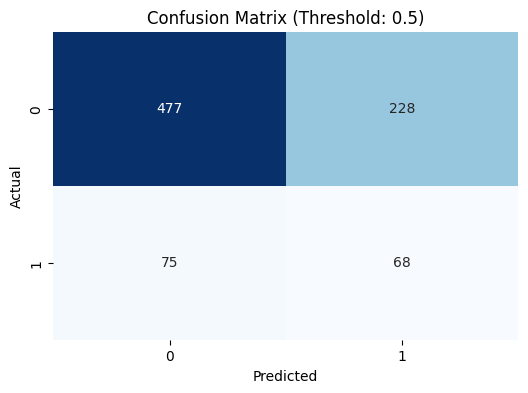

Accuracy: 0.6426886792452831
AUC-ROC Score: 0.6162426226256013
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76       705
           1       0.23      0.48      0.31       143

    accuracy                           0.64       848
   macro avg       0.55      0.58      0.53       848
weighted avg       0.76      0.64      0.68       848

---------------------------------------------------------

Threshold: 0.6


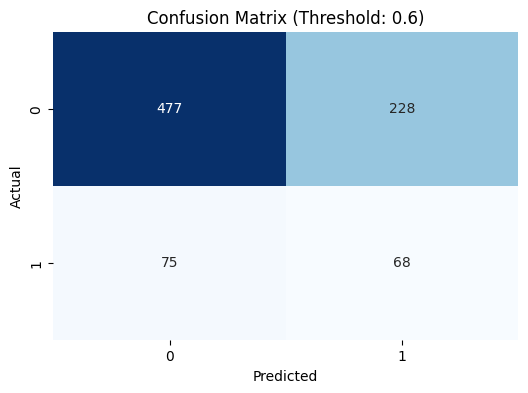

Accuracy: 0.6426886792452831
AUC-ROC Score: 0.6162426226256013
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76       705
           1       0.23      0.48      0.31       143

    accuracy                           0.64       848
   macro avg       0.55      0.58      0.53       848
weighted avg       0.76      0.64      0.68       848

---------------------------------------------------------

Threshold: 0.7


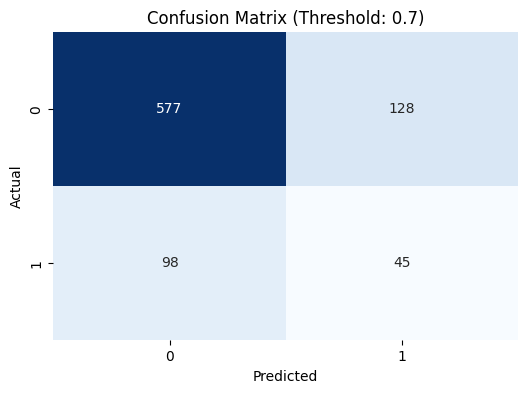

Accuracy: 0.7334905660377359
AUC-ROC Score: 0.6162426226256013
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       705
           1       0.26      0.31      0.28       143

    accuracy                           0.73       848
   macro avg       0.56      0.57      0.56       848
weighted avg       0.75      0.73      0.74       848

---------------------------------------------------------

Threshold: 0.8


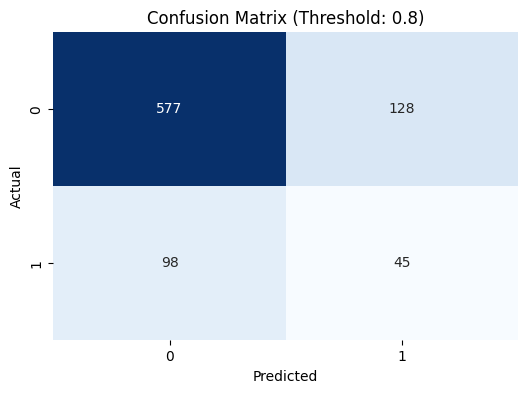

Accuracy: 0.7334905660377359
AUC-ROC Score: 0.6162426226256013
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       705
           1       0.26      0.31      0.28       143

    accuracy                           0.73       848
   macro avg       0.56      0.57      0.56       848
weighted avg       0.75      0.73      0.74       848

---------------------------------------------------------


In [433]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed

# Train the KNN model
knn_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_knn = (y_probs_knn >= threshold).astype(int)

    # Get the confusion matrix
    cm_knn = confusion_matrix(y_test, y_pred_threshold_knn)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_knn = accuracy_score(y_test, y_pred_threshold_knn)
    roc_auc_knn = roc_auc_score(y_test, y_probs_knn)

    print("Accuracy:", accuracy_knn)
    print("AUC-ROC Score:", roc_auc_knn)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_knn))
    print('---------------------------------------------------------')

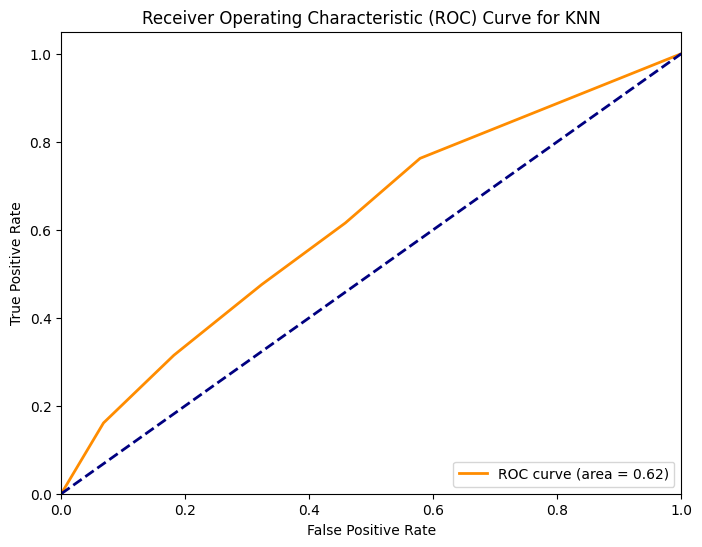

In [434]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_probs_knn)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy for Best KNN Model: 0.6415094339622641
AUC-ROC Score for Best KNN Model: 0.6146654763676039

Classification Report for Best KNN Model:
               precision    recall  f1-score   support

           0       0.87      0.67      0.76       705
           1       0.23      0.48      0.31       143

    accuracy                           0.64       848
   macro avg       0.55      0.58      0.53       848
weighted avg       0.76      0.64      0.68       848



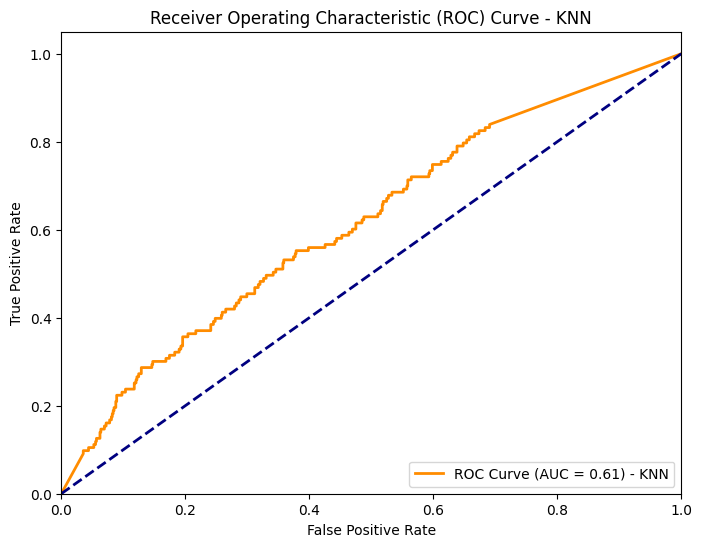

In [435]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid to search for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust these values as needed
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN model
knn_model = KNeighborsClassifier()

# Create GridSearchCV for KNN
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_knn.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Get the best KNN model
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best KNN model on the test set
y_probs_best_knn = best_knn_model.predict_proba(X_test)[:, 1]
y_pred_best_knn = (y_probs_best_knn >= 0.5).astype(int)

# Print accuracy for the best KNN model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print("Accuracy for Best KNN Model:", accuracy_best_knn)

# Print AUC-ROC Score for the best KNN model
roc_auc_best_knn = roc_auc_score(y_test, y_probs_best_knn)
print("AUC-ROC Score for Best KNN Model:", roc_auc_best_knn)

# Print Classification Report for the best KNN model
print("\nClassification Report for Best KNN Model:\n", classification_report(y_test, y_pred_best_knn))

# Plot ROC Curve for the best KNN model
fpr_best_knn, tpr_best_knn, _ = roc_curve(y_test, y_probs_best_knn)
roc_auc_best_knn = auc(fpr_best_knn, tpr_best_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_knn, tpr_best_knn, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best_knn:.2f}) - KNN')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()

Feature Importances for KNN:
             Feature  Change_in_Accuracy
1                BMI           -0.036557
5          education            0.025943
2            glucose           -0.022406
3                age            0.022406
0            totChol            0.011792
4         cigsPerDay            0.008255
6       Hypertension           -0.005896
7  mean_art_pressure            0.003538


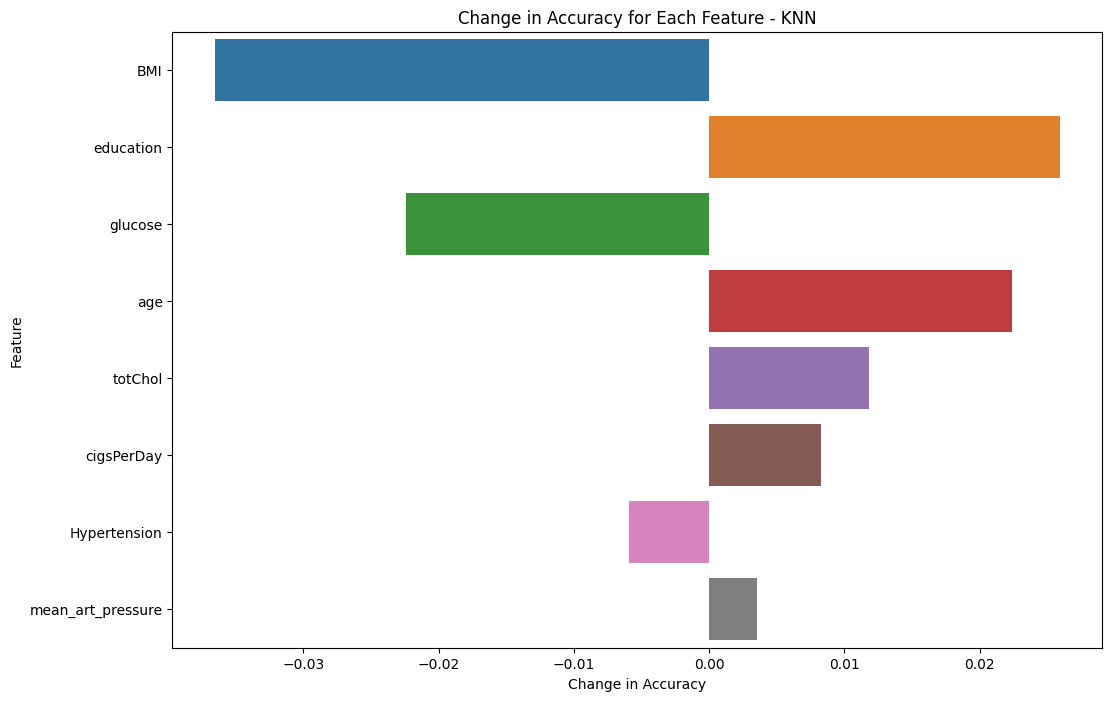

In [436]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming best_knn_model is the best KNN model obtained from hyperparameter tuning

# Initialize an empty DataFrame to store feature importance
feature_importance_knn_df = pd.DataFrame(columns=['Feature', 'Change_in_Accuracy'])

# Iterate through each feature
for feature in X_train_resampled_df.columns:
    # Make a copy of the original data
    X_test_copy = X_test.copy()

    # Permute the values of the current feature
    X_test_copy[feature] = X_test_copy[feature].sample(frac=1, random_state=42).values

    # Make predictions on the permuted data
    y_pred_permuted = best_knn_model.predict(X_test_copy)

    # Calculate the change in accuracy
    accuracy_permuted = accuracy_score(y_test, y_pred_permuted)
    accuracy_original = accuracy_score(y_test, y_pred_best_knn)
    change_in_accuracy = accuracy_original - accuracy_permuted

    # Store the change in accuracy in the DataFrame
    feature_importance_knn_df = feature_importance_knn_df.append({
        'Feature': feature,
        'Change_in_Accuracy': change_in_accuracy
    }, ignore_index=True)

# Sort the DataFrame by the absolute change in accuracy
feature_importance_knn_df['Absolute_Change_in_Accuracy'] = feature_importance_knn_df['Change_in_Accuracy'].abs()
feature_importance_knn_df = feature_importance_knn_df.sort_values(by='Absolute_Change_in_Accuracy', ascending=False)

# Display the feature importances
print("Feature Importances for KNN:")
print(feature_importance_knn_df[['Feature', 'Change_in_Accuracy']])

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the code for feature importance calculation is already executed

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Change_in_Accuracy', y='Feature', data=feature_importance_knn_df)
plt.title('Change in Accuracy for Each Feature - KNN')
plt.xlabel('Change in Accuracy')
plt.ylabel('Feature')
plt.show()


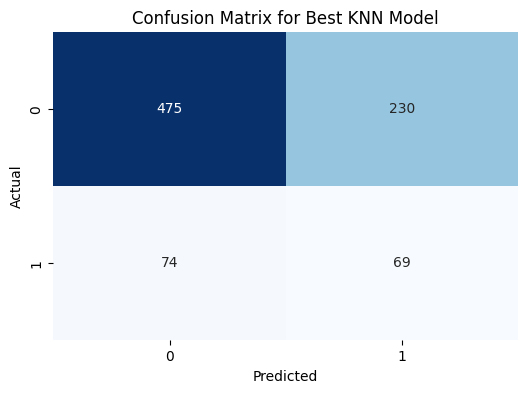

In [437]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix for the best KNN model
cm_knn = confusion_matrix(y_test, y_pred_best_knn)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Best KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Model 8 - Naive Bayes Classifier


Threshold: 0.2


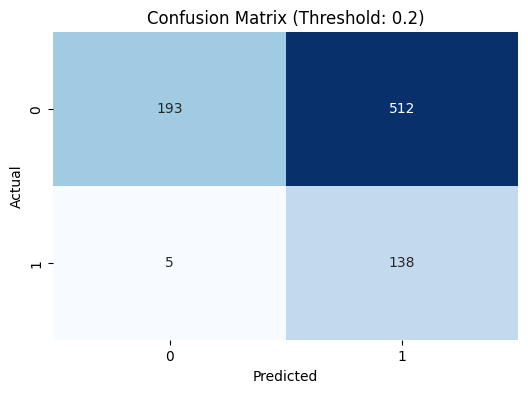

Accuracy: 0.3903301886792453
AUC-ROC Score: 0.7304766155829986
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.27      0.43       705
           1       0.21      0.97      0.35       143

    accuracy                           0.39       848
   macro avg       0.59      0.62      0.39       848
weighted avg       0.85      0.39      0.41       848

---------------------------------------------------------

Threshold: 0.3


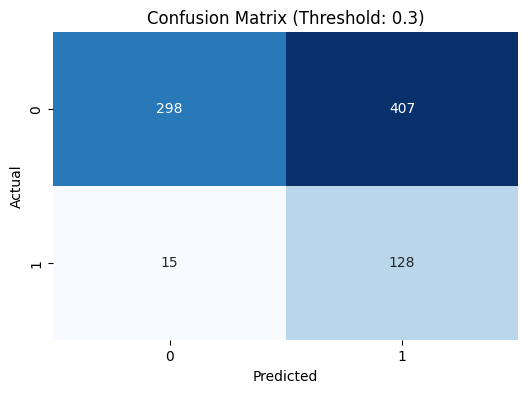

Accuracy: 0.5023584905660378
AUC-ROC Score: 0.7304766155829986
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.59       705
           1       0.24      0.90      0.38       143

    accuracy                           0.50       848
   macro avg       0.60      0.66      0.48       848
weighted avg       0.83      0.50      0.55       848

---------------------------------------------------------

Threshold: 0.4


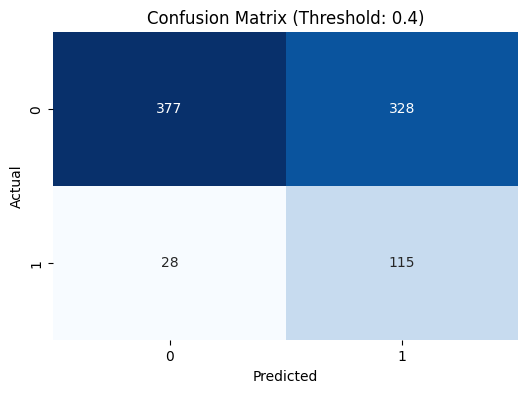

Accuracy: 0.5801886792452831
AUC-ROC Score: 0.7304766155829986
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.53      0.68       705
           1       0.26      0.80      0.39       143

    accuracy                           0.58       848
   macro avg       0.60      0.67      0.54       848
weighted avg       0.82      0.58      0.63       848

---------------------------------------------------------

Threshold: 0.5


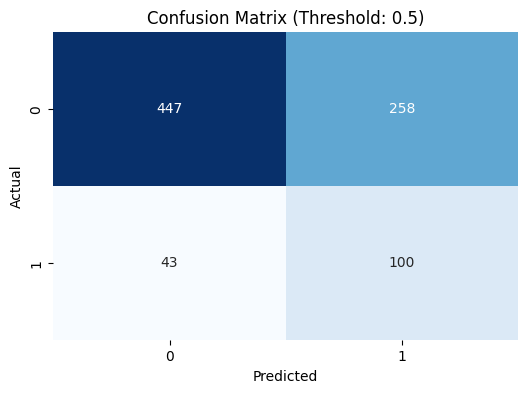

Accuracy: 0.6450471698113207
AUC-ROC Score: 0.7304766155829986
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.63      0.75       705
           1       0.28      0.70      0.40       143

    accuracy                           0.65       848
   macro avg       0.60      0.67      0.57       848
weighted avg       0.81      0.65      0.69       848

---------------------------------------------------------

Threshold: 0.6


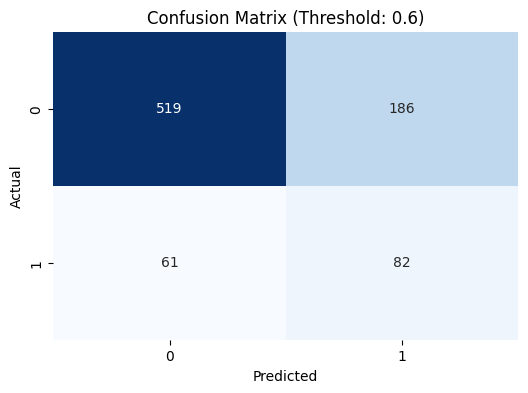

Accuracy: 0.7087264150943396
AUC-ROC Score: 0.7304766155829986
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81       705
           1       0.31      0.57      0.40       143

    accuracy                           0.71       848
   macro avg       0.60      0.65      0.60       848
weighted avg       0.80      0.71      0.74       848

---------------------------------------------------------

Threshold: 0.7


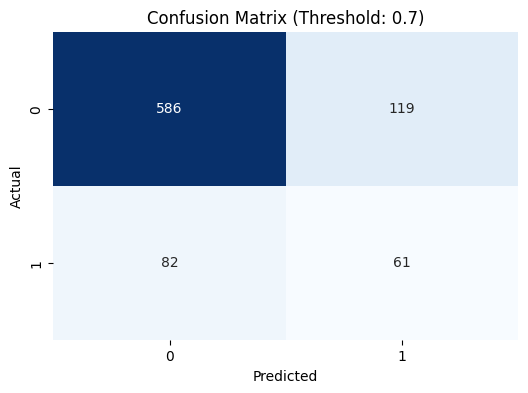

Accuracy: 0.7629716981132075
AUC-ROC Score: 0.7304766155829986
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       705
           1       0.34      0.43      0.38       143

    accuracy                           0.76       848
   macro avg       0.61      0.63      0.62       848
weighted avg       0.79      0.76      0.77       848

---------------------------------------------------------

Threshold: 0.8


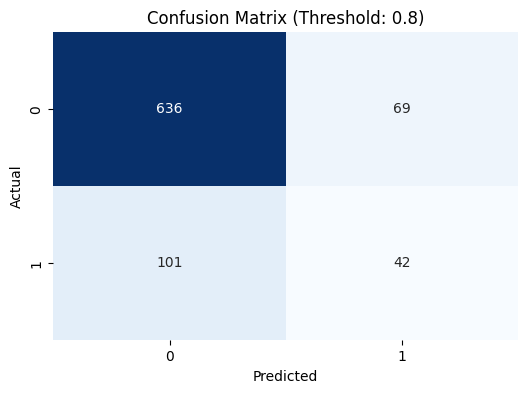

Accuracy: 0.7995283018867925
AUC-ROC Score: 0.7304766155829986
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       705
           1       0.38      0.29      0.33       143

    accuracy                           0.80       848
   macro avg       0.62      0.60      0.61       848
weighted avg       0.78      0.80      0.79       848

---------------------------------------------------------


In [438]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_nb = nb_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_nb = (y_probs_nb >= threshold).astype(int)

    # Get the confusion matrix
    cm_nb = confusion_matrix(y_test, y_pred_threshold_nb)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_nb = accuracy_score(y_test, y_pred_threshold_nb)
    roc_auc_nb = roc_auc_score(y_test, y_probs_nb)

    print("Accuracy:", accuracy_nb)
    print("AUC-ROC Score:", roc_auc_nb)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_nb))
    print('---------------------------------------------------------')


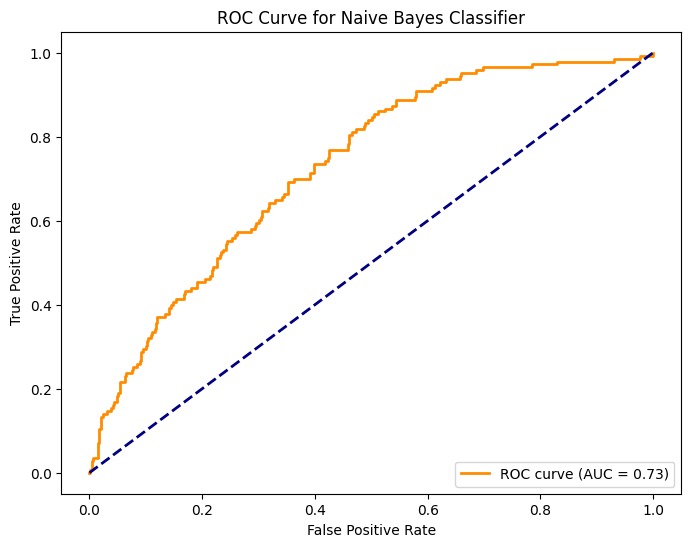

In [439]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()


Best Parameters for Naive Bayes: {}

Classification Report for Best Naive Bayes Model:
               precision    recall  f1-score   support

           0       0.91      0.63      0.75       705
           1       0.28      0.70      0.40       143

    accuracy                           0.65       848
   macro avg       0.60      0.67      0.57       848
weighted avg       0.81      0.65      0.69       848

Accuracy: 0.6450471698113207


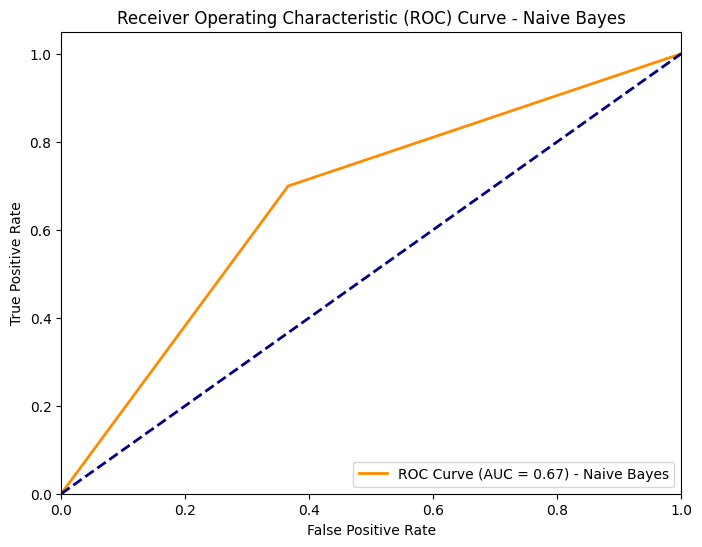

In [440]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
nb_model = GaussianNB()

# Define the parameter grid to search
param_grid_nb = {}  # No hyperparameters for Gaussian Naive Bayes

# Create GridSearchCV for Naive Bayes
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_nb.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)

# Get the best Naive Bayes model
best_nb_model = grid_search_nb.best_estimator_

# Evaluate the best Naive Bayes model on the test set
y_pred_best_nb = best_nb_model.predict(X_test)
print("\nClassification Report for Best Naive Bayes Model:\n", classification_report(y_test, y_pred_best_nb))

accuracy_nb = accuracy_score(y_test, y_pred_best_nb)
print("Accuracy:", accuracy_nb)

# Plot ROC Curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_best_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_nb:.2f}) - Naive Bayes')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

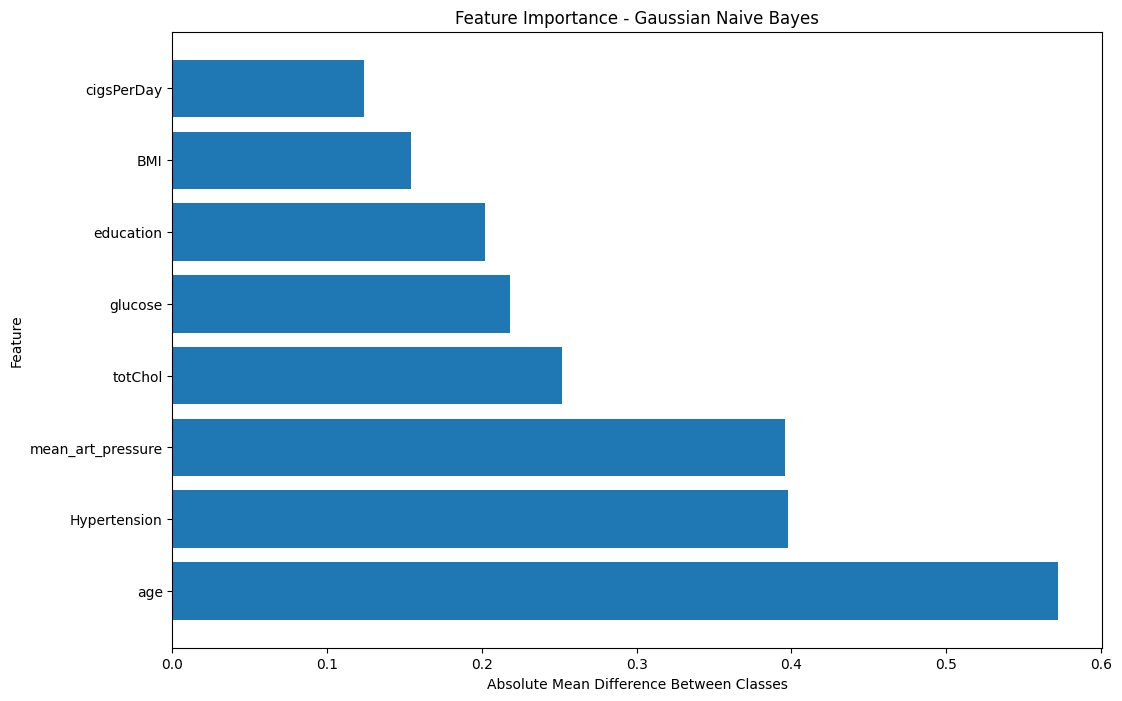

In [441]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the Gaussian Naive Bayes model
nb_model.fit(X_train_resampled_df, y_train_resampled_df)

# Extract mean values for each feature and each class
class_labels = nb_model.classes_
feature_means = pd.DataFrame(nb_model.theta_, columns=X_train_resampled_df.columns, index=class_labels)

# Calculate the absolute mean difference between classes for each feature
feature_means_diff = feature_means.diff().abs().mean(axis=0)

# Sort features by the absolute mean difference
feature_means_diff = feature_means_diff.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_means_diff.index, feature_means_diff)
plt.title('Feature Importance - Gaussian Naive Bayes')
plt.xlabel('Absolute Mean Difference Between Classes')
plt.ylabel('Feature')
plt.show()


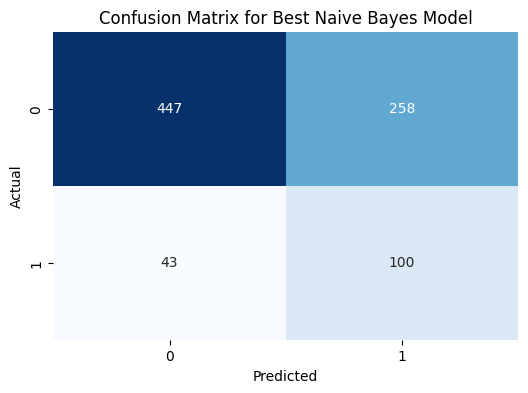

In [442]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix for the best SVM model
cm_nb = confusion_matrix(y_test, y_pred_best_nb)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Best Naive Bayes Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Model 9 - SVM CLASSIFIER


Threshold: 0.2


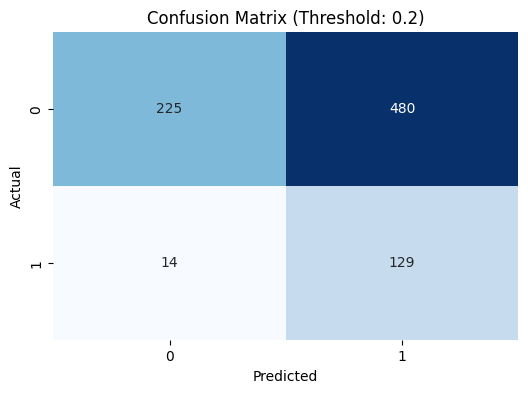

Accuracy: 0.41745283018867924
AUC-ROC Score: 0.6875266577394237
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.32      0.48       705
           1       0.21      0.90      0.34       143

    accuracy                           0.42       848
   macro avg       0.58      0.61      0.41       848
weighted avg       0.82      0.42      0.45       848

---------------------------------------------------------

Threshold: 0.3


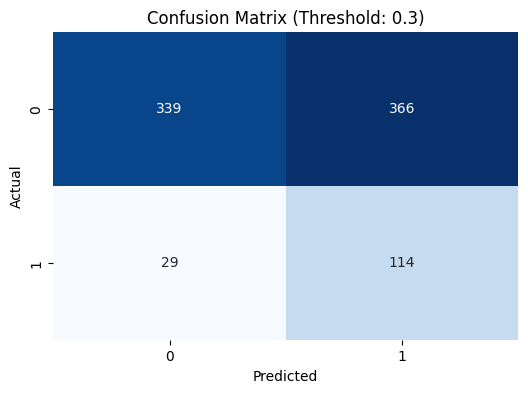

Accuracy: 0.5341981132075472
AUC-ROC Score: 0.6875266577394237
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.48      0.63       705
           1       0.24      0.80      0.37       143

    accuracy                           0.53       848
   macro avg       0.58      0.64      0.50       848
weighted avg       0.81      0.53      0.59       848

---------------------------------------------------------

Threshold: 0.4


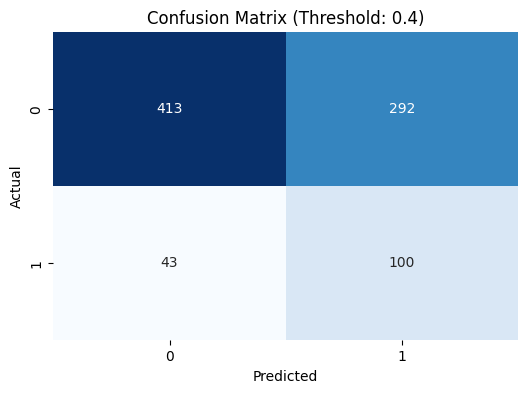

Accuracy: 0.6049528301886793
AUC-ROC Score: 0.6875266577394237
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.59      0.71       705
           1       0.26      0.70      0.37       143

    accuracy                           0.60       848
   macro avg       0.58      0.64      0.54       848
weighted avg       0.80      0.60      0.65       848

---------------------------------------------------------

Threshold: 0.5


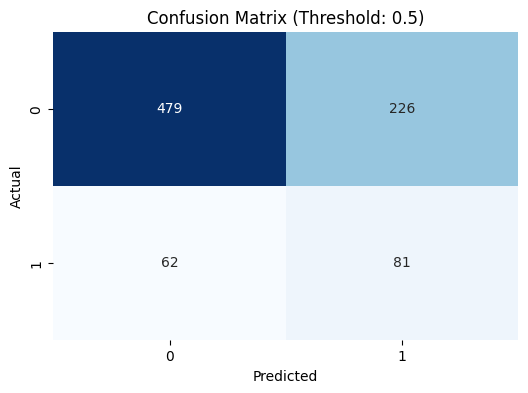

Accuracy: 0.660377358490566
AUC-ROC Score: 0.6875266577394237
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       705
           1       0.26      0.57      0.36       143

    accuracy                           0.66       848
   macro avg       0.57      0.62      0.56       848
weighted avg       0.78      0.66      0.70       848

---------------------------------------------------------

Threshold: 0.6


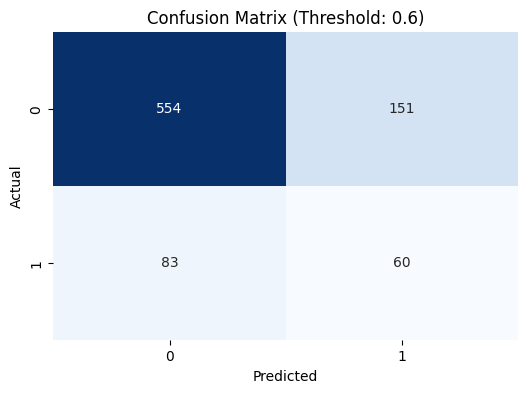

Accuracy: 0.7240566037735849
AUC-ROC Score: 0.6875266577394237
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       705
           1       0.28      0.42      0.34       143

    accuracy                           0.72       848
   macro avg       0.58      0.60      0.58       848
weighted avg       0.77      0.72      0.74       848

---------------------------------------------------------

Threshold: 0.7


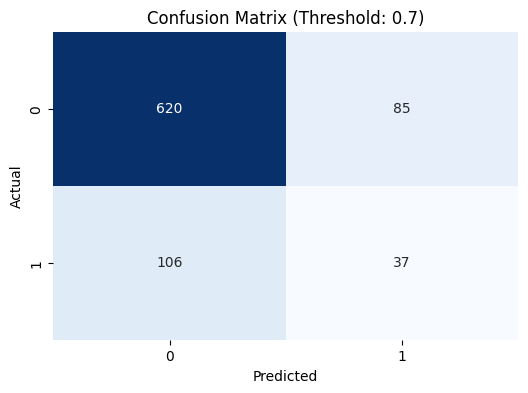

Accuracy: 0.7747641509433962
AUC-ROC Score: 0.6875266577394237
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       705
           1       0.30      0.26      0.28       143

    accuracy                           0.77       848
   macro avg       0.58      0.57      0.57       848
weighted avg       0.76      0.77      0.77       848

---------------------------------------------------------

Threshold: 0.8


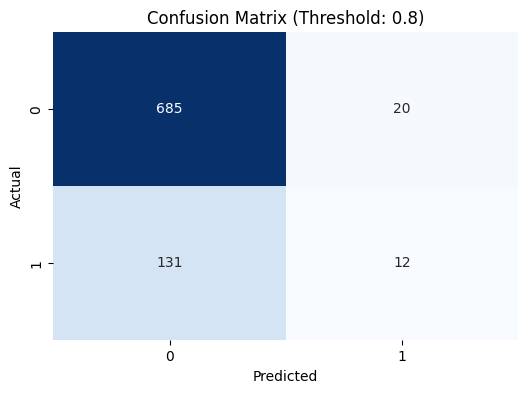

Accuracy: 0.8219339622641509
AUC-ROC Score: 0.6875266577394237
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       705
           1       0.38      0.08      0.14       143

    accuracy                           0.82       848
   macro avg       0.61      0.53      0.52       848
weighted avg       0.76      0.82      0.77       848

---------------------------------------------------------


In [443]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(probability=True, random_state=42)

# Train the SVM model
svm_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_svm = svm_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds_svm = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold_svm in thresholds_svm:
    y_pred_threshold_svm = (y_probs_svm >= threshold_svm).astype(int)

    # Get the confusion matrix
    cm_svm = confusion_matrix(y_test, y_pred_threshold_svm)

    print(f"\nThreshold: {threshold_svm}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold_svm})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_svm = accuracy_score(y_test, y_pred_threshold_svm)
    roc_auc_svm = roc_auc_score(y_test, y_probs_svm)

    print("Accuracy:", accuracy_svm)
    print("AUC-ROC Score:", roc_auc_svm)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_svm))
    print('---------------------------------------------------------')

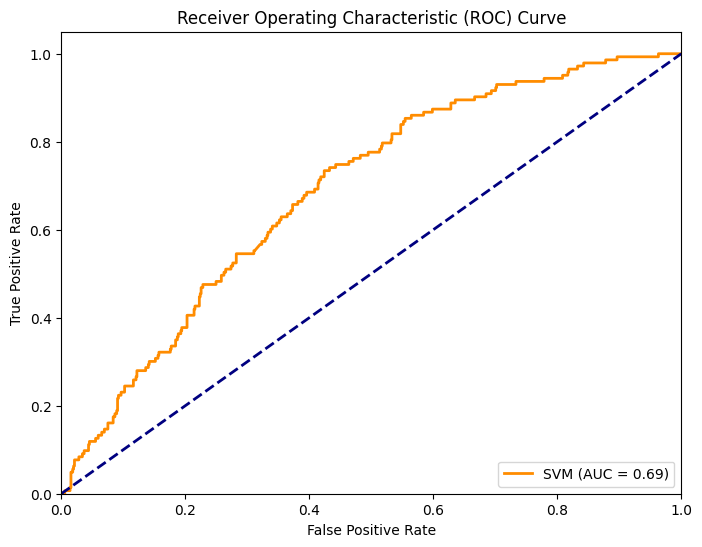

In [444]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create an SVM model
svm_model = SVC(probability=True, random_state=42)

# Create GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_svm.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# Get the best SVM model
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the best SVM model on the test set
y_pred_best_svm = best_svm_model.predict(X_test)
print("\nClassification Report for Best SVM Model:\n", classification_report(y_test, y_pred_best_svm))

accuracy_svm = accuracy_score(y_test, y_pred_best_svm)
print("Accuracy:", accuracy_svm)

# Plot ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_svm:.2f}) - SVM')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()

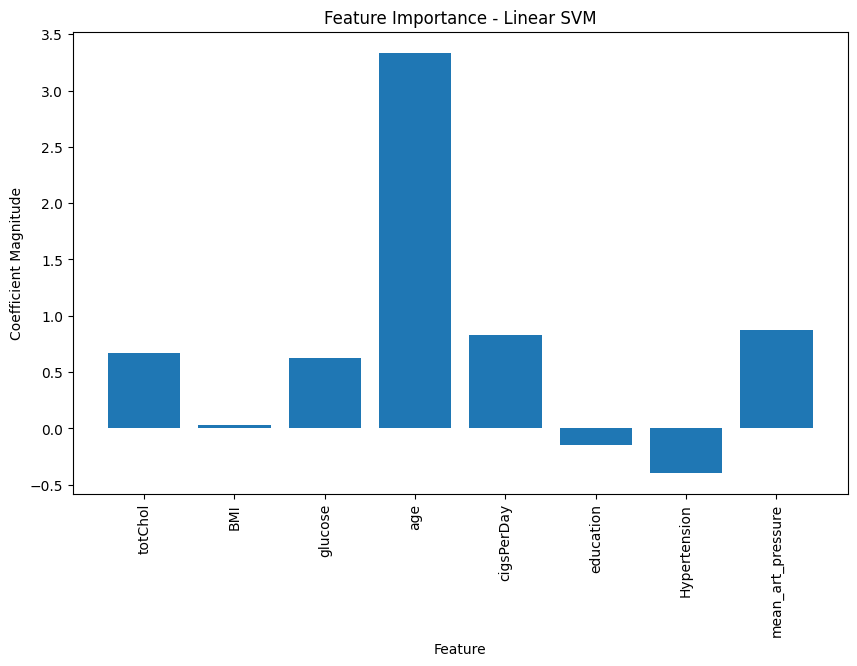

In [278]:
# Assuming you have a linear SVM model
linear_svm_model = SVC(C=1, kernel='linear', probability=True, random_state=42)

# Fit the model to the training data
linear_svm_model.fit(X_train_resampled_df, y_train_resampled_df)

# Get the feature coefficients
feature_importance = linear_svm_model.coef_[0]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), X_train_resampled_df.columns, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance - Linear SVM')
plt.show()


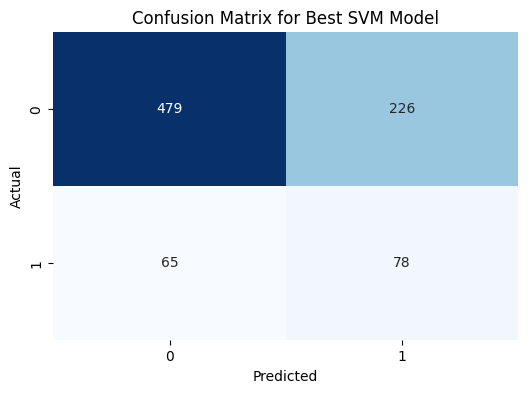

In [279]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix for the best SVM model
cm_svm = confusion_matrix(y_test, y_pred_best_svm)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Best SVM Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### evaluation

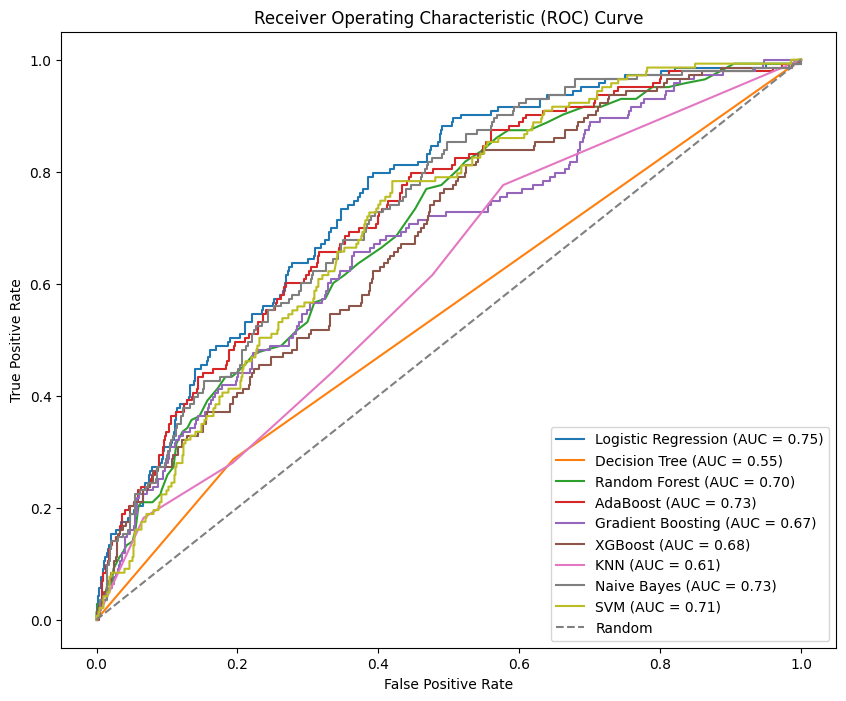

In [280]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Define the models and their predictions
models = {
    'Logistic Regression': y_probs,
    'Decision Tree': y_probs_dt,
    'Random Forest': y_probs_rf,
    'AdaBoost': y_probs_adaboost,
    'Gradient Boosting': y_probs_gb,
    'XGBoost': y_probs_xgb,
    'KNN': y_probs_knn,
    'Naive Bayes': y_probs_nb,
    'SVM': y_probs_svm
}

# Plot AUC-ROC for each model
plt.figure(figsize=(10, 8))
for model_name, y_pred_probs in models.items():
    auc_score = roc_auc_score(y_test, y_pred_probs)
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


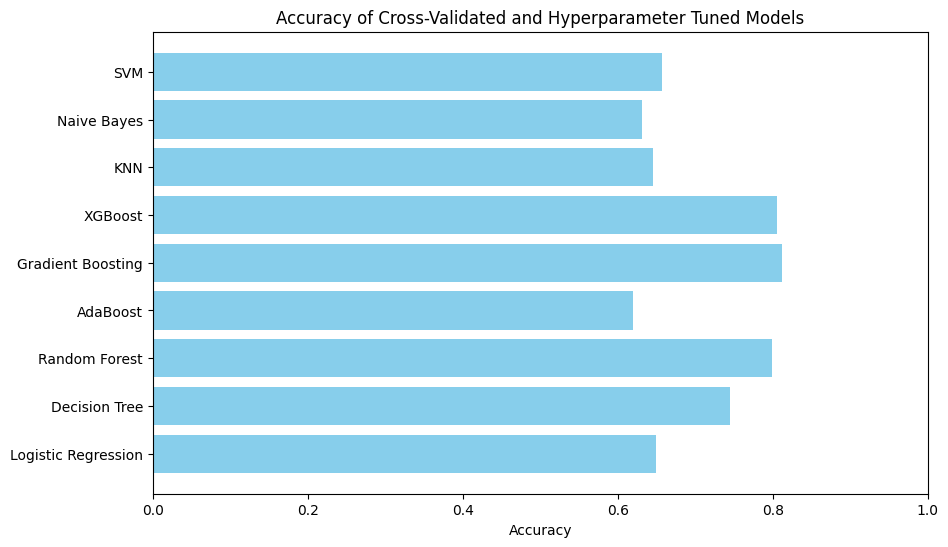

In [281]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their accuracies
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'KNN', 'Naive Bayes', 'SVM']
accuracies = [accuracy_best, accuracy_best_dt, accuracy_best_rf, accuracy_best_adaboost, accuracy_best_gb, accuracy_best_xgb, accuracy_best_knn, accuracy_nb, accuracy_svm]

# Plot accuracy for each model
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Cross-Validated and Hyperparameter Tuned Models')
plt.xlim(0, 1)  # Set x-axis limit to represent accuracy percentage
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In the provided code, a Logistic Regression model is trained and tuned using GridSearchCV with StratifiedKFold cross-validation. Here's a breakdown:

1. **Model Selection:** Logistic Regression is chosen as the classification model (`LogisticRegression(random_state=42)`).

2. **Parameter Tuning:** The model is trained using different hyperparameter combinations specified in `param_grid`, and the best hyperparameters are selected based on the ROC-AUC score during cross-validation.

3. **Cross-Validation:** Stratified K-Fold cross-validation (`StratifiedKFold`) is used to assess the model's performance in a more robust manner, especially when dealing with imbalanced classes.

4. **Evaluation Metrics:** The model's performance is evaluated on the test set using metrics like precision, recall, and accuracy. Additionally, the ROC curve is plotted to visualize the trade-off between true positive rate (sensitivity) and false positive rate.

Regarding feature importance using model explainability tools, the provided code does not include explicit feature importance analysis. To interpret feature importance in a Logistic Regression model, you can examine the coefficients assigned to each feature. Positive coefficients indicate a positive impact on the target class, while negative coefficients indicate a negative impact.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***